#Prologue

Ethereum is a decentralized blockchain platform that enables the creation of smart contracts and decentralized applications (DApps). It has its own native cryptocurrency called Ether (ETH) that serves as the primary means of payment and settlement on the Ethereum network.

ERC20 is a technical standard for creating and issuing tokens on the Ethereum blockchain. ERC20 tokens are fungible, meaning that they are interchangeable and have the same value as one another. Many initial coin offerings (ICOs) and token sales have been launched using the ERC20 standard.

Both Ethereum and ERC20 tokens can be involved in various types of fraud, including:
* Fake ICOs: Scammers may create fraudulent ICOs, offering investors the opportunity to purchase new ERC20 tokens at a discounted price or in exchange for Ether, but then take the investors' money and disappear.
* Pump and dump schemes: Fraudsters may artificially inflate the price of an ERC20 token by promoting it heavily on social media or other channels, then sell their holdings at a profit before the price collapses.
* Token theft: Hackers may steal ERC20 tokens from users' wallets or from exchanges that hold the tokens.
* Smart contract vulnerabilities: Smart contracts on the Ethereum network can be vulnerable to bugs or flaws that allow hackers to exploit them and steal Ether or ERC20 tokens.

The purpose of this study is to perform Ether (ETH) fraud detection and analyze transactional data. By examining the patterns and characteristics of the data, we aim to determine whether or not fraudulent activity has occurred. Through this analysis, we also hope to gain insights into the nature of the transactions and identify any trends or anomalies that may be present. By combining statistical and machine learning techniques, we aim to develop an effective and accurate method for detecting fraudulent transactions and improving overall security in the financial system.







#Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

from sklearn import preprocessing
from sklearn.impute import SimpleImputer

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

#Load Dataset

Dataset source: https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load datasets
df = pd.read_csv('/content/drive/MyDrive/transaction_dataset.csv')

#Dataset Information

This study utilized 1 dataset licensed by Open Database, which contains detailed Ether (ETH) transactions information.

In [ ]:
df.head()

Unnamed: 0  Index                                     Address  FLAG  \
0           0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1           1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2           2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3           3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4           4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   

   Avg min between sent tnx  Avg min between received tnx  \
0                    844.26                       1093.71   
1                  12709.07                       2958.44   
2                 246194.54                       2434.02   
3                  10219.60                      15785.09   
4                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  ...   ERC20 min val sent   ERC20 max val sent  \
0                            0  ...             0.000000         1.683100e+07   
1                            0  ...             2.260809         2.260809e+00   
2                            0  ...             0.000000         0.000000e+00   
3                            0  ...           100.000000         9.029231e+03   
4                            1  ...             0.000000         4.500000e+04   

    ERC20 avg val sent   ERC20 min val sent contract  \
0        271779.920000                           0.0   
1             2.260809                           0.0   
2             0.000000                           0.0   
3          3804.076893                           0.0   
4         13726.659220                           0.0   

    ERC20 max val sent contract   ERC20 avg val sent contract  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

    ERC20 uniq sent token name   ERC20 uniq rec token name  \
0                         39.0                        57.0   
1                          1.0                         7.0   
2                          0.0                         8.0   
3                          1.0                        11.0   
4                          6.0                        27.0   

    ERC20 most sent token type   ERC20_most_rec_token_type  
0                    Cofoundit                   Numeraire  
1               Livepeer Token              Livepeer Token  
2                         None                       XENON  
3                       Raiden                       XENON  
4                StatusNetwork                         EOS  

[5 rows x 51 columns]

**Target and Features Information.**
                                           
* `Index`: The index number of a row                                          
* `Address`: The address of the ethereum account                             
* `FLAG`: Whether the transaction is fraud or not fraud           
* `Avg min between sent tnx`: Minimum average time in minutes between transactions sent by the same wallet address
* `Avg min between received tnx`: Maximum average time in minutes between transactions sent by the same wallet address
* `Time Diff between first and last (Mins)`: The time difference in minutes between the first and last transaction made by a wallet address
* `Sent tnx`: The total number of normal transactions sent by a wallet address
* `Received Tnx`: The total number of normal transactions received by a wallet address
* `Number of Created Contracts`: The total number of contract creation transactions created by a wallet address
* `Unique Received From Addresses`: The total number of different wallet addresses that have made transactions and sent Ether to a wallet address
* `Unique Sent To Addresses`: The total number of different wallet addresses that have received Ether from a particular wallet address
* `min value received`: Minimum value of Ether ever received by a particular wallet address
* `max value received`: Maximum value of Ether ever received by a particular wallet address
* `avg val received`: The average value of Ether ever received by a particular wallet address
* `min val sent`: Minimum value of Ether ever sent by a particular wallet address
* `max val sent`: Maximum value of Ether ever sent by a particular wallet address
* `avg val sent`: The average value of Ether ever sent by a particular wallet address
* `min value sent to contract`: The minimum value of Ether ever sent to a contract in Ethereum by a particular wallet address
* `max val sent to contract`: The maximum value of Ether ever sent to a contract in Ethereum by a particular wallet address
* `avg value sent to contract`: The average value of Ether ever sent to a contract in Ethereum by a particular wallet address
* `total transactions (including tnx to create contract)`: The total number of transactions that occurred, including transactions to create smart contracts
* `total Ether sent`: The total amount of Ether that has been sent from an address or account on the Ethereum network
* `total ether received`: The total amount of Ether that has been received from an address or account on the Ethereum network
* `total ether sent contracts`: The total amount of Ether that has been sent to smart contract addresses on the Ethereum network
* `total ether balance`: The total amount of Ether remaining in an address or account after a transaction has been made on the Ethereum network
* `Total ERC20 tnxs`: The total number of transactions made using ERC20 tokens
* `ERC20 total Ether received`: The total number of ERC20 token received transactions made using Ether as transaction fee payment
* `ERC20 total ether sent`: The total number of ERC20 token sent transactions (ERC20 token sent) made using Ether as transaction fee payment
* `ERC20 total Ether sent contract`: The total amount of Ether sent in an ERC20 token transfer transaction to another smart contract on the Ethereum network
* `ERC20 uniq sent addr`: Number of transactions for sending unique ERC20 tokens (unique ERC20 token transactions) to unique account addresses
* `ERC20 uniq rec addr`: Number of transactions receiving unique ERC20 tokens (unique ERC20 token transactions) from unique account addresses
* `ERC20 uniq sent addr.1`: Number of transactions for sending unique ERC20 tokens (unique ERC20 token transactions) to unique account addresses
* `ERC20 uniq rec contract addr`: Number of unique ERC20 token transactions received from unique smart contract addresses
* `ERC20 avg time between sent tnx`: The average time between sending transactions of ERC20 tokens sent within a certain time period, measured in minutes
* `ERC20 avg time between rec tnx`: The average time between received ERC20 token receipt transactions within a certain time period, calculated in units of minutes
* `ERC20 avg time between rec 2 tnx`: The average time between received ERC20 token receipt transactions within a certain time period, calculated in units of minutes
* `ERC20 avg time between contract tnx`: The average time between ERC20 token contract transactions that occur within a certain timeframe, measured in minutes
* `ERC20 min val rec`: The minimum value in Ether received from an ERC20 token transaction for an account or address
* `ERC20 max val rec`: The maximum value in Ether received from an ERC20 token transaction for an account or address
* `ERC20 avg val rec`: The average value in Ether received from an ERC20 token transaction for an account or address
* `ERC20 min val sent`: The minimum value in Ether sent via an ERC20 token transaction for an account or address
* `ERC20 max val sent`: The maximum value in Ether sent via an ERC20 token transaction for an account or address
* `ERC20 avg val sent`: The average value in Ether sent via an ERC20 token transaction for an account or address
* `ERC20 min val sent contract`: The minimum value in Ether sent by an ERC20 token transaction from one ERC20 contract to another ERC20 contract on the Ethereum network
* `ERC20 max val sent contract`: The maximum value in Ether sent by an ERC20 token transaction from one ERC20 contract to another ERC20 contract on the Ethereum network
* `ERC20 avg val sent contract`: The average value in Ether sent by an ERC20 token transaction from one ERC20 contract to another ERC20 contract on the Ethereum network
* `ERC20 uniq sent token name`: The number of unique ERC20 tokens sent in a transaction to an address or account on the Ethereum network
* `ERC20 uniq rec token name`: The number of unique ERC20 tokens received in a transaction to an address or account on the Ethereum network
* `ERC20 most sent token type`: The most common type of ERC20 token sent in transactions from an address or account on the Ethereum network
* `ERC20_most_rec_token_type`: The most common type of ERC20 token received in transactions from an address or account on the Ethereum network

In [ ]:
# See information (type of the dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [ ]:
# See the object columns exist
for col in df.columns:
    if df[col].dtypes == 'object':
        print(col)

Address
 ERC20 most sent token type
 ERC20_most_rec_token_type


In [ ]:
# See the amount of the unique each rows (including NaN)
for col in df:
  print(f'{col}: {len(df[col].unique())}')

Unnamed: 0: 9841
Index: 4729
Address: 9816
FLAG: 2
Avg min between sent tnx: 5013
Avg min between received tnx: 6223
Time Diff between first and last (Mins): 7810
Sent tnx: 641
Received Tnx: 727
Number of Created Contracts: 20
Unique Received From Addresses: 256
Unique Sent To Addresses: 258
min value received: 4589
max value received : 6302
avg val received: 6767
min val sent: 4719
max val sent: 6647
avg val sent: 5854
min value sent to contract: 3
max val sent to contract: 4
avg value sent to contract: 4
total transactions (including tnx to create contract: 897
total Ether sent: 5868
total ether received: 6728
total ether sent contracts: 4
total ether balance: 5717
 Total ERC20 tnxs: 301
 ERC20 total Ether received: 3461
 ERC20 total ether sent: 1416
 ERC20 total Ether sent contract: 30
 ERC20 uniq sent addr: 108
 ERC20 uniq rec addr: 148
 ERC20 uniq sent addr.1: 5
 ERC20 uniq rec contract addr: 124
 ERC20 avg time between sent tnx: 2
 ERC20 avg time between rec tnx: 2
 ERC20 avg tim

In [ ]:
# See the spelling of each column name
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [ ]:
for column in df.columns:
    print('='*20, column, '='*20)
    print(df[column].value_counts())
    print()

==================== Unnamed: 0 ====================
0       1
6564    1
6557    1
6558    1
6559    1
       ..
3281    1
3282    1
3283    1
3284    1
9840    1
Name: Unnamed: 0, Length: 9841, dtype: int64

==================== Index ====================
1       3
1458    3
1452    3
1453    3
1454    3
       ..
3527    1
3526    1
3525    1
3524    1
4729    1
Name: Index, Length: 4729, dtype: int64

==================== Address ====================
0x4cd526aa2db72eb1fd557b37c6b0394acd35b212    2
0x4cd3bb2110eda1805dc63abc1959a5ee2d386e9f    2
0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1    2
0x4c24af967901ec87a6644eb1ef42b680f58e67f5    2
0x4c268c7b1d51b369153d6f1f28c61b15f0e17746    2
                                             ..
0x57b417366e5681ad493a03492d9b61ecd0d3d247    1
0x57bb2d6426fed243c633d0b16d4297d12bc20638    1
0x57c0cf70020f0af5073c24cb272e93e7529c6a40    1
0x57ccf2b7ffe5e4497a7e04ac174646f5f16e24ce    1
0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c    1
Name: Address,

#Data Preprocessing

##Data Cleaning

###Fixing column names

In [ ]:
# Fix column names that still have spaces at the beginning of the name of the each columms and change with the correct writing
df.columns = [i.strip() for i in list(df.columns)]
df.rename(columns={'total transactions (including tnx to create contract': 'total transactions (including tnx to create contract)'}, inplace=True)

###The same columns definition

After exploring what was in the dataset, we found the same column with different values in several rows.

In [ ]:
# Check if the two columns have the same values
print((df['ERC20 uniq sent addr'] == df['ERC20 uniq sent addr.1']).value_counts())

True     7439
False    2402
dtype: int64


In [ ]:
# Show rows where the values in the two columns are different
df[df['ERC20 uniq sent addr'] != df['ERC20 uniq sent addr.1']]

Unnamed: 0  Index                                     Address  FLAG  \
0              0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1              1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
3              3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4              4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   
14            14     15  0x001cf9871aeaf2acf72f144b16818b7e417b6dda     0   
...          ...    ...                                         ...   ...   
9831        9831   2170  0xfe9b7db8d9d57e9ad9341bcf51b110ba5d27b48b     1   
9833        9833   2172  0xff0e20e3a7575d823302bbb27e233c23f2c3070b     1   
9834        9834   2173  0xff2f6c6fbd71a078f1c1781855467d30897b5a33     1   
9835        9835   2174  0xff35866acb80ce4b169d1460cd48108955c1c445     1   
9839        9839   2178  0xffde23396d57e10abf58bd929bb1e856c7718218     1   

      Avg min between sent tnx  Avg min between received tnx  \
0                       844.26                       1093.71   
1                     12709.07                       2958.44   
3                     10219.60                      15785.09   
4                        36.61                      10707.77   
14                    14106.66                       3742.82   
...                        ...                           ...   
9831                    193.09                         81.82   
9833                      0.00                          0.00   
9834                      0.00                         49.51   
9835                      0.00                          0.00   
9839                      0.00                          0.00   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63       721            89   
1                                  1218216.73        94             8   
3                                   397555.90        25             9   
4                                   382472.42      4598            20   
14                                  540061.90        32            24   
...                                       ...       ...           ...   
9831                                  1485.80         6             4   
9833                                     0.00         0             0   
9834                                 12643.85         1            15   
9835                                  8427.92         0             1   
9839                                     0.00         0             1   

      Number of Created Contracts  ...  ERC20 min val sent  \
0                               0  ...            0.000000   
1                               0  ...            2.260809   
3                               0  ...          100.000000   
4                               1  ...            0.000000   
14                              0  ...            0.000001   
...                           ...  ...                 ...   
9831                            0  ...                 NaN   
9833                            0  ...                 NaN   
9834                            0  ...                 NaN   
9835                            1  ...                 NaN   
9839                            0  ...                 NaN   

      ERC20 max val sent  ERC20 avg val sent  ERC20 min val sent contract  \
0           1.683100e+07       271779.920000                          0.0   
1           2.260809e+00            2.260809                          0.0   
3           9.029231e+03         3804.076893                          0.0   
4           4.500000e+04        13726.659220                          0.0   
14          1.183245e+05        26617.300000                          0.0   
...                  ...                 ...                          ...   
9831                 NaN                 NaN                          NaN   
9833                 NaN                 NaN                          NaN 

Considerating to keep both columns, they have much different values each rows.

In [ ]:
# Check duplicates data
df.duplicated().sum()

0

Nice! There's no duplicate data!

###Dropping redundant features

In [ ]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

Address ERC20 most sent token type  \
0     0x00009277775ac7d0d59eaad8fee3d10ac6c805e8                  Cofoundit   
1     0x0002b44ddb1476db43c868bd494422ee4c136fed             Livepeer Token   
2     0x0002bda54cb772d040f779e88eb453cac0daa244                       None   
3     0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e                     Raiden   
4     0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89              StatusNetwork   
...                                          ...                        ...   
9836  0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2                              
9837  0xff718805bb9199ebf024ab6acd333e603ad77c85                              
9838  0xff8e6af02d41a576a0c82f7835535193e1a6bccc                              
9839  0xffde23396d57e10abf58bd929bb1e856c7718218                        NaN   
9840  0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c                              

             ERC20_most_rec_token_type  
0                            Numeraire  
1                       Livepeer Token  
2                                XENON  
3                                XENON  
4                                  EOS  
...                                ...  
9836                        GSENetwork  
9837             Blockwell say NOTSAFU  
9838  Free BOB Tokens - BobsRepair.com  
9839                               NaN  
9840                        INS Promo1  

[9841 rows x 3 columns]

In [ ]:
# See the information of object columns
df[categories].describe()

Address ERC20 most sent token type  \
count                                         9841                       9000   
unique                                        9816                        305   
top     0x4cd526aa2db72eb1fd557b37c6b0394acd35b212                          0   
freq                                             2                       4399   

       ERC20_most_rec_token_type  
count                       8990  
unique                       467  
top                            0  
freq                        4399

With the categorical data we have looked at, we are not looking into detailed information. Most tokens occur only once, so they seem irrelevant in fraud detection. Also, we can see that we have a value called 'NaN' and 0 as one of the top values of the column, so we should take it into account when modeling.

Hence, we will take it out.
1. ERC20 most sent token type
2. ERC20_most_rec_token_type

Other columns are redundant and have much unique per row and only the index number of a row. So, we will also remove the variables below.
1. Unnamed: 0
2. Index
3. Address

In [ ]:
df.drop(columns=['ERC20 most sent token type', 'ERC20_most_rec_token_type', 'Unnamed: 0', 'Index', 'Address'], inplace=True)

In [ ]:
# Check duplicates data again
df.duplicated().sum()

553

We will delete duplicates rows after missing value handling.

In [ ]:
# Check rows duplicated
df[df.duplicated()]

FLAG  Avg min between sent tnx  Avg min between received tnx  \
2933     0                   5980.35                      18633.46   
2934     0                   7042.64                       2694.86   
2935     0                   3098.05                       4755.44   
2936     0                      0.00                          0.00   
2937     0                      0.00                          0.00   
...    ...                       ...                           ...   
9814     1                      0.00                          0.00   
9818     1                      0.00                          0.00   
9823     1                      0.00                          0.00   
9833     1                      0.00                          0.00   
9837     1                      0.00                          0.00   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
2933                                498256.47        21            20   
2934                                 80594.87         8             9   
2935                                382590.08        36            57   
2936                                     0.00         0             1   
2937                                     0.00         0             1   
...                                       ...       ...           ...   
9814                                     0.00         0             0   
9818                                     0.00         0             0   
9823                                     0.00         0             0   
9833                                     0.00         0             0   
9837                                     0.00         0             0   

      Number of Created Contracts  Unique Received From Addresses  \
2933                            0                               2   
2934                            0                               8   
2935                            0                               2   
2936                            0                               1   
2937                            0                               1   
...                           ...                             ...   
9814                            0                               0   
9818                            0                               0   
9823                            1                               0   
9833                            0                               0   
9837                            0                               0   

      Unique Sent To Addresses  min value received  ...  ERC20 max val rec  \
2933                        18            1.990000  ...           0.000000   
2934                         7            0.001000  ...         140.102687   
2935                         2            0.098677  ...         205.045342   
2936                         0            0.250303  ...          64.921895   
2937                         0            0.804725  ...         171.588208   
...                        ...                 ...  ...                ...   
9814                         0            0.000000  ...           1.337000   
9818                         0            0.000000  ...          13.370000   
9823                         0            0.000000  ...                NaN   
9833                         0            0.000000  ...                NaN   
9837                         0            0.000000  ...          13.370000   

      ERC20 avg val rec  ERC20 min val sent  ERC20 max val sent  \
2933           0.000000            0.000000            0.000000   
2934          70.200930          140.102687          140.102687   
2935          75.180566            0.000000            0.000000   
2936          14.443795            0.000000            0.000000   
2937          38.011146            0.000000            0.000000   
...                 ...                 ...                 ...   
9814           1.337000            0.000000          

Here, we know that the duplicate exists after deleting unique columns.

###Missing value checking

In [ ]:
# Counts the number of missing values in each column
missing_values = df.isna().sum()

# Calculate the percentage of missing values in each column
percent_missing = (missing_values / len(df)) * 100

# Combine both Series into a DataFrame
missing_df = pd.concat([missing_values, percent_missing], axis=1, keys=['Total Missing Values', 'Percentage'])

missing_columns = missing_df.loc[missing_df['Total Missing Values'] > 0]

# Show DataFrame
missing_columns

Total Missing Values  Percentage
Total ERC20 tnxs                                      829    8.423941
ERC20 total Ether received                            829    8.423941
ERC20 total ether sent                                829    8.423941
ERC20 total Ether sent contract                       829    8.423941
ERC20 uniq sent addr                                  829    8.423941
ERC20 uniq rec addr                                   829    8.423941
ERC20 uniq sent addr.1                                829    8.423941
ERC20 uniq rec contract addr                          829    8.423941
ERC20 avg time between sent tnx                       829    8.423941
ERC20 avg time between rec tnx                        829    8.423941
ERC20 avg time between rec 2 tnx                      829    8.423941
ERC20 avg time between contract tnx                   829    8.423941
ERC20 min val rec                                     829    8.423941
ERC20 max val rec                                     829    8.423941
ERC20 avg val rec                                     829    8.423941
ERC20 min val sent                                    829    8.423941
ERC20 max val sent                                    829    8.423941
ERC20 avg val sent                                    829    8.423941
ERC20 min val sent contract                           829    8.423941
ERC20 max val sent contract                           829    8.423941
ERC20 avg val sent contract                           829    8.423941
ERC20 uniq sent token name                            829    8.423941
ERC20 uniq rec token name                             829    8.423941

#####Missing values handling

We will drop the independent feature set with a variance of 0 (values of these variables are all 0s), as zero variance indicates constant or near-constant behavior in the variables. This limitation prevents any additional explanatory power for analysis.

The columns are:
1. ERC20 avg time between sent tnx
2. ERC20 avg time between rec tnx
3. ERC20 avg time between rec 2 tnx
4. ERC20 avg time between contract tnx
5. ERC20 min val sent contract
6. ERC20 max val sent contract
7. ERC20 avg val sent contract


In [ ]:
# Check values of the columns we will drop
cols=['ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx',
                 'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx',
                 'ERC20 min val sent contract','ERC20 max val sent contract', 'ERC20 avg val sent contract']
for column in cols:
    print('='*20, column, '='*20)
    print(df[column].value_counts())
    print()

==================== ERC20 avg time between sent tnx ====================
0.0    9012
Name: ERC20 avg time between sent tnx, dtype: int64

==================== ERC20 avg time between rec tnx ====================
0.0    9012
Name: ERC20 avg time between rec tnx, dtype: int64

==================== ERC20 avg time between rec 2 tnx ====================
0.0    9012
Name: ERC20 avg time between rec 2 tnx, dtype: int64

==================== ERC20 avg time between contract tnx ====================
0.0    9012
Name: ERC20 avg time between contract tnx, dtype: int64

==================== ERC20 min val sent contract ====================
0.0    9012
Name: ERC20 min val sent contract, dtype: int64

==================== ERC20 max val sent contract ====================
0.0    9012
Name: ERC20 max val sent contract, dtype: int64

==================== ERC20 avg val sent contract ====================
0.0    9012
Name: ERC20 avg val sent contract, dtype: int64



In [ ]:
# Drop features
df.drop(columns=['ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx',
                 'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx',
                 'ERC20 min val sent contract','ERC20 max val sent contract', 'ERC20 avg val sent contract'], inplace=True)

In [ ]:
# Check again the missing values

# Counts the number of missing values in each column
missing_values = df.isna().sum()

# Calculate the percentage of missing values in each column
percent_missing = (missing_values / len(df)) * 100

# Combine both Series into a DataFrame
missing_df = pd.concat([missing_values, percent_missing], axis=1, keys=['Total Missing Values', 'Percentage'])

missing_columns = missing_df.loc[missing_df['Total Missing Values'] > 0]

# Show DataFrame
missing_columns

Total Missing Values  Percentage
Total ERC20 tnxs                                  829    8.423941
ERC20 total Ether received                        829    8.423941
ERC20 total ether sent                            829    8.423941
ERC20 total Ether sent contract                   829    8.423941
ERC20 uniq sent addr                              829    8.423941
ERC20 uniq rec addr                               829    8.423941
ERC20 uniq sent addr.1                            829    8.423941
ERC20 uniq rec contract addr                      829    8.423941
ERC20 min val rec                                 829    8.423941
ERC20 max val rec                                 829    8.423941
ERC20 avg val rec                                 829    8.423941
ERC20 min val sent                                829    8.423941
ERC20 max val sent                                829    8.423941
ERC20 avg val sent                                829    8.423941
ERC20 uniq sent token name                        829    8.423941
ERC20 uniq rec token name                         829    8.423941

In [ ]:
# Check the descriptive statistics of the columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()
df[missing_cols].describe()

Total ERC20 tnxs  ERC20 total Ether received  ERC20 total ether sent  \
count       9012.000000                9.012000e+03            9.012000e+03   
mean          36.255659                1.296207e+08            1.386849e+07   
std          447.528908                1.053858e+10            1.180390e+09   
min            0.000000                0.000000e+00            0.000000e+00   
25%            0.000000                0.000000e+00            0.000000e+00   
50%            1.000000                1.000000e-12            0.000000e+00   
75%            3.000000                1.003370e+02            0.000000e+00   
max        10001.000000                1.000020e+12            1.120000e+11   

       ERC20 total Ether sent contract  ERC20 uniq sent addr  \
count                      9012.000000           9012.000000   
mean                        110.939207              5.638038   
std                        6128.634953            105.252500   
min                           0.000000              0.000000   
25%                           0.000000              0.000000   
50%                           0.000000              0.000000   
75%                           0.000000              0.000000   
max                      416000.000000           6582.000000   

       ERC20 uniq rec addr  ERC20 uniq sent addr.1  \
count          9012.000000             9012.000000   
mean              7.598535                0.003440   
std              81.818470                0.065698   
min               0.000000                0.000000   
25%               0.000000                0.000000   
50%               1.000000                0.000000   
75%               2.000000                0.000000   
max            4293.000000                3.000000   

       ERC20 uniq rec contract addr  ERC20 min val rec  ERC20 max val rec  \
count                   9012.000000        9012.000000       9.012000e+03   
mean                       4.901909         485.614688       1.252524e+08   
std                       17.246576       16883.278712       1.053741e+10   
min                        0.000000           0.000000       0.000000e+00   
25%                        0.000000           0.000000       0.000000e+00   
50%                        1.000000           0.000000       0.000000e+00   
75%                        2.000000           0.001523       9.900000e+01   
max                      782.000000      990000.000000       1.000000e+12   

       ERC20 avg val rec  ERC20 min val sent  ERC20 max val sent  \
count       9.012000e+03        9.012000e+03        9.012000e+03   
mean        4.346203e+06        1.174126e+04        1.303594e+07   
std         2.141192e+08        1.053567e+06        1.179905e+09   
min         0.000000e+00        0.000000e+00        0.000000e+00   
25%         0.000000e+00        0.000000e+00        0.000000e+00   
50%         0.000000e+00        0.000000e+00        0.000000e+00   
75%         2.946467e+01        0.000000e+00        0.000000e+00   
max         1.724181e+10        1.000000e+08        1.120000e+11   

       ERC20 avg val sent  ERC20 uniq sent token name  \
count        9.012000e+03                 9012.000000   
mean         6.318389e+06                    1.384931   
std          5.914764e+08                    6.735121   
min          0.000000e+00                    0.000000   
25%          0.000000e+00                    0.000000   
50%          0.000000e+00                    0.000000   
75%          0.000000e+00                    0.000000   
max          5.614756e+10                  213.000000   

       ERC20 uniq rec token name  
count                9012.000000  
mean                    4.826676  
std                    16.678607  
min                     0.000000  
25%                     0.000000  
50%                     1.000000  
75%                     2.000000  
max                   737.000000

As we can see, the columns containing missing values above tend to have a skewed distribution. One possible solution for handling it is using imputation with the median.

In [ ]:
# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

In [ ]:
# Check again the missing value
df.isna().sum().any()

False

Nice! There's no missing value anymore!

###Duplicates data

In [ ]:
df.duplicated().sum()

553

In [ ]:
# Random check duplivcate rows from 'Avg min between sent tnx' column
df[df['Avg min between sent tnx']==3098.05]

FLAG  Avg min between sent tnx  Avg min between received tnx  \
2910     0                   3098.05                       4755.44   
2935     0                   3098.05                       4755.44   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
2910                                382590.08        36            57   
2935                                382590.08        36            57   

      Number of Created Contracts  Unique Received From Addresses  \
2910                            0                               2   
2935                            0                               2   

      Unique Sent To Addresses  min value received  ...  \
2910                         2            0.098677  ...   
2935                         2            0.098677  ...   

      ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  \
2910                     0.0                           3.0                0.0   
2935                     0.0                           3.0                0.0   

      ERC20 max val rec  ERC20 avg val rec  ERC20 min val sent  \
2910         205.045342          75.180566                 0.0   
2935         205.045342          75.180566                 0.0   

      ERC20 max val sent  ERC20 avg val sent  ERC20 uniq sent token name  \
2910                 0.0                 0.0                         0.0   
2935                 0.0                 0.0                         0.0   

      ERC20 uniq rec token name  
2910                        3.0  
2935                        3.0  

[2 rows x 39 columns]

Of course, we should delete duplicates as they can interfere with data analysis and result in inaccurate information.

In [ ]:
# Drop duplicates
df = df.drop_duplicates()

In [ ]:
# Check again the duplicate
df.duplicated().sum().any()

False

Nice! There's no duplicate data anymore!

In [ ]:
# How many columns and rows now?
row = df.shape[0]
col = df.shape[1]
print('The number of rows within the dataset are {} and the number of columns is {}'.format(row,col))

The number of rows within the dataset are 9288 and the number of columns is 39


In [ ]:
# Copy the original dataset after cleaning for later analysis of modelling
import copy

df_clean_ori = copy.deepcopy(df)

In [ ]:
df_clean_ori.head()

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0     0                    844.26                       1093.71   
1     0                  12709.07                       2958.44   
2     0                 246194.54                       2434.02   
3     0                  10219.60                      15785.09   
4     0                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  Unique Received From Addresses  \
0                            0                              40   
1                            0                               5   
2                            0                              10   
3                            0                               7   
4                            1                               7   

   Unique Sent To Addresses  min value received  ...  ERC20 uniq sent addr.1  \
0                       118            0.000000  ...                     0.0   
1                        14            0.000000  ...                     0.0   
2                         2            0.113119  ...                     0.0   
3                        13            0.000000  ...                     0.0   
4                        19            0.000000  ...                     0.0   

   ERC20 uniq rec contract addr  ERC20 min val rec  ERC20 max val rec  \
0                          58.0                0.0       1.500000e+07   
1                           7.0                0.0       3.650000e+02   
2                           8.0                0.0       4.428198e+02   
3                          11.0                0.0       1.141223e+04   
4                          27.0                0.0       9.000000e+04   

   ERC20 avg val rec  ERC20 min val sent  ERC20 max val sent  \
0      265586.147600            0.000000        1.683100e+07   
1          57.632615            2.260809        2.260809e+00   
2          65.189009            0.000000        0.000000e+00   
3        1555.550174          100.000000        9.029231e+03   
4        4934.232147            0.000000        4.500000e+04   

   ERC20 avg val sent  ERC20 uniq sent token name  ERC20 uniq rec token name  
0       271779.920000                        39.0                       57.0  
1            2.260809                         1.0                        7.0  
2            0.000000                         0.0                        8.0  
3         3804.076893                         1.0                       11.0  
4        13726.659220                         6.0                       27.0  

[5 rows x 39 columns]

##Statistical Summary

In [ ]:
# See all the features distribution
df.describe().style.background_gradient(cmap='Greens')

The larger the value, the more intense the green color displayed in the cell.

##KDE Plot

To see the visualization of the data distribution

CPU times: user 21.6 s, sys: 3.41 s, total: 25 s
Wall time: 22.3 s


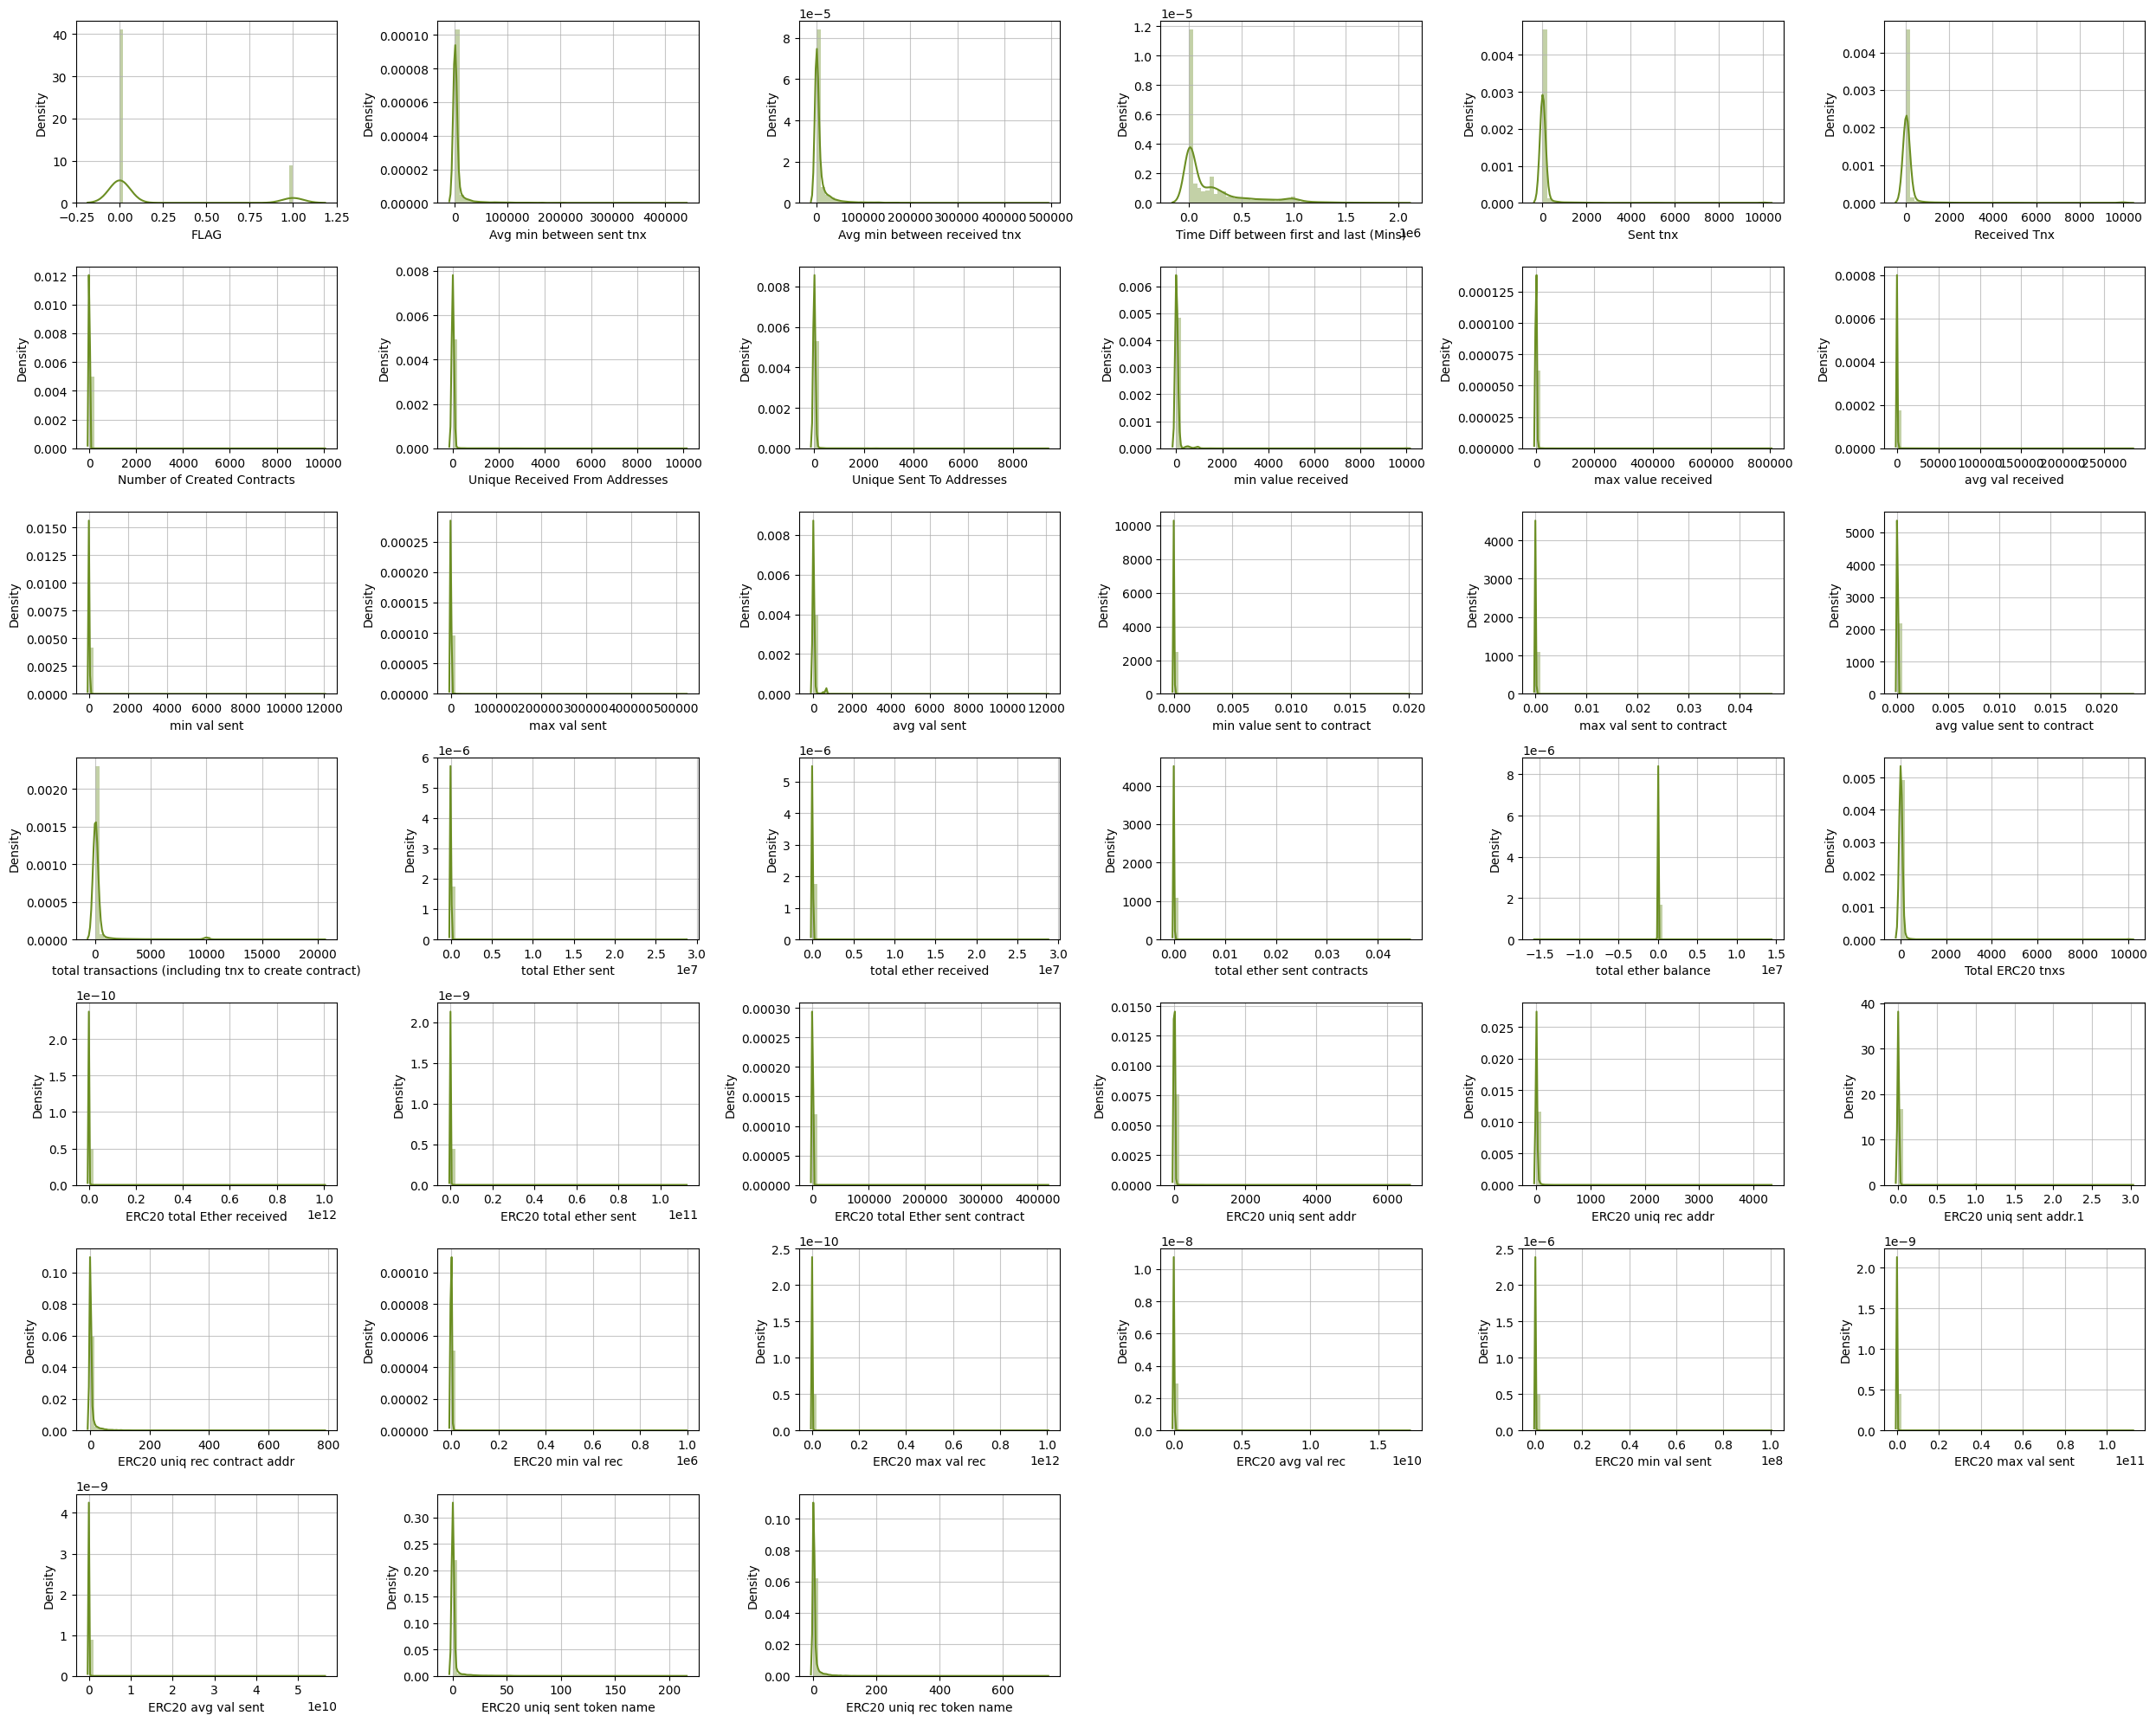

In [ ]:
# Adjust the figure size for better readability

%%time
feats = (list(df.loc[:, 'FLAG':'ERC20 uniq rec token name']))

fig = plt.figure(figsize=(25, 20))
rows, cols = 7, 6

for i in range(0, len(feats)):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.grid(alpha = 0.7, axis ='both')
    sns.distplot(x=df[feats[i]], color='olivedrab')
    plt.xlabel(feats[i])
    plt.tight_layout()

##Outlier

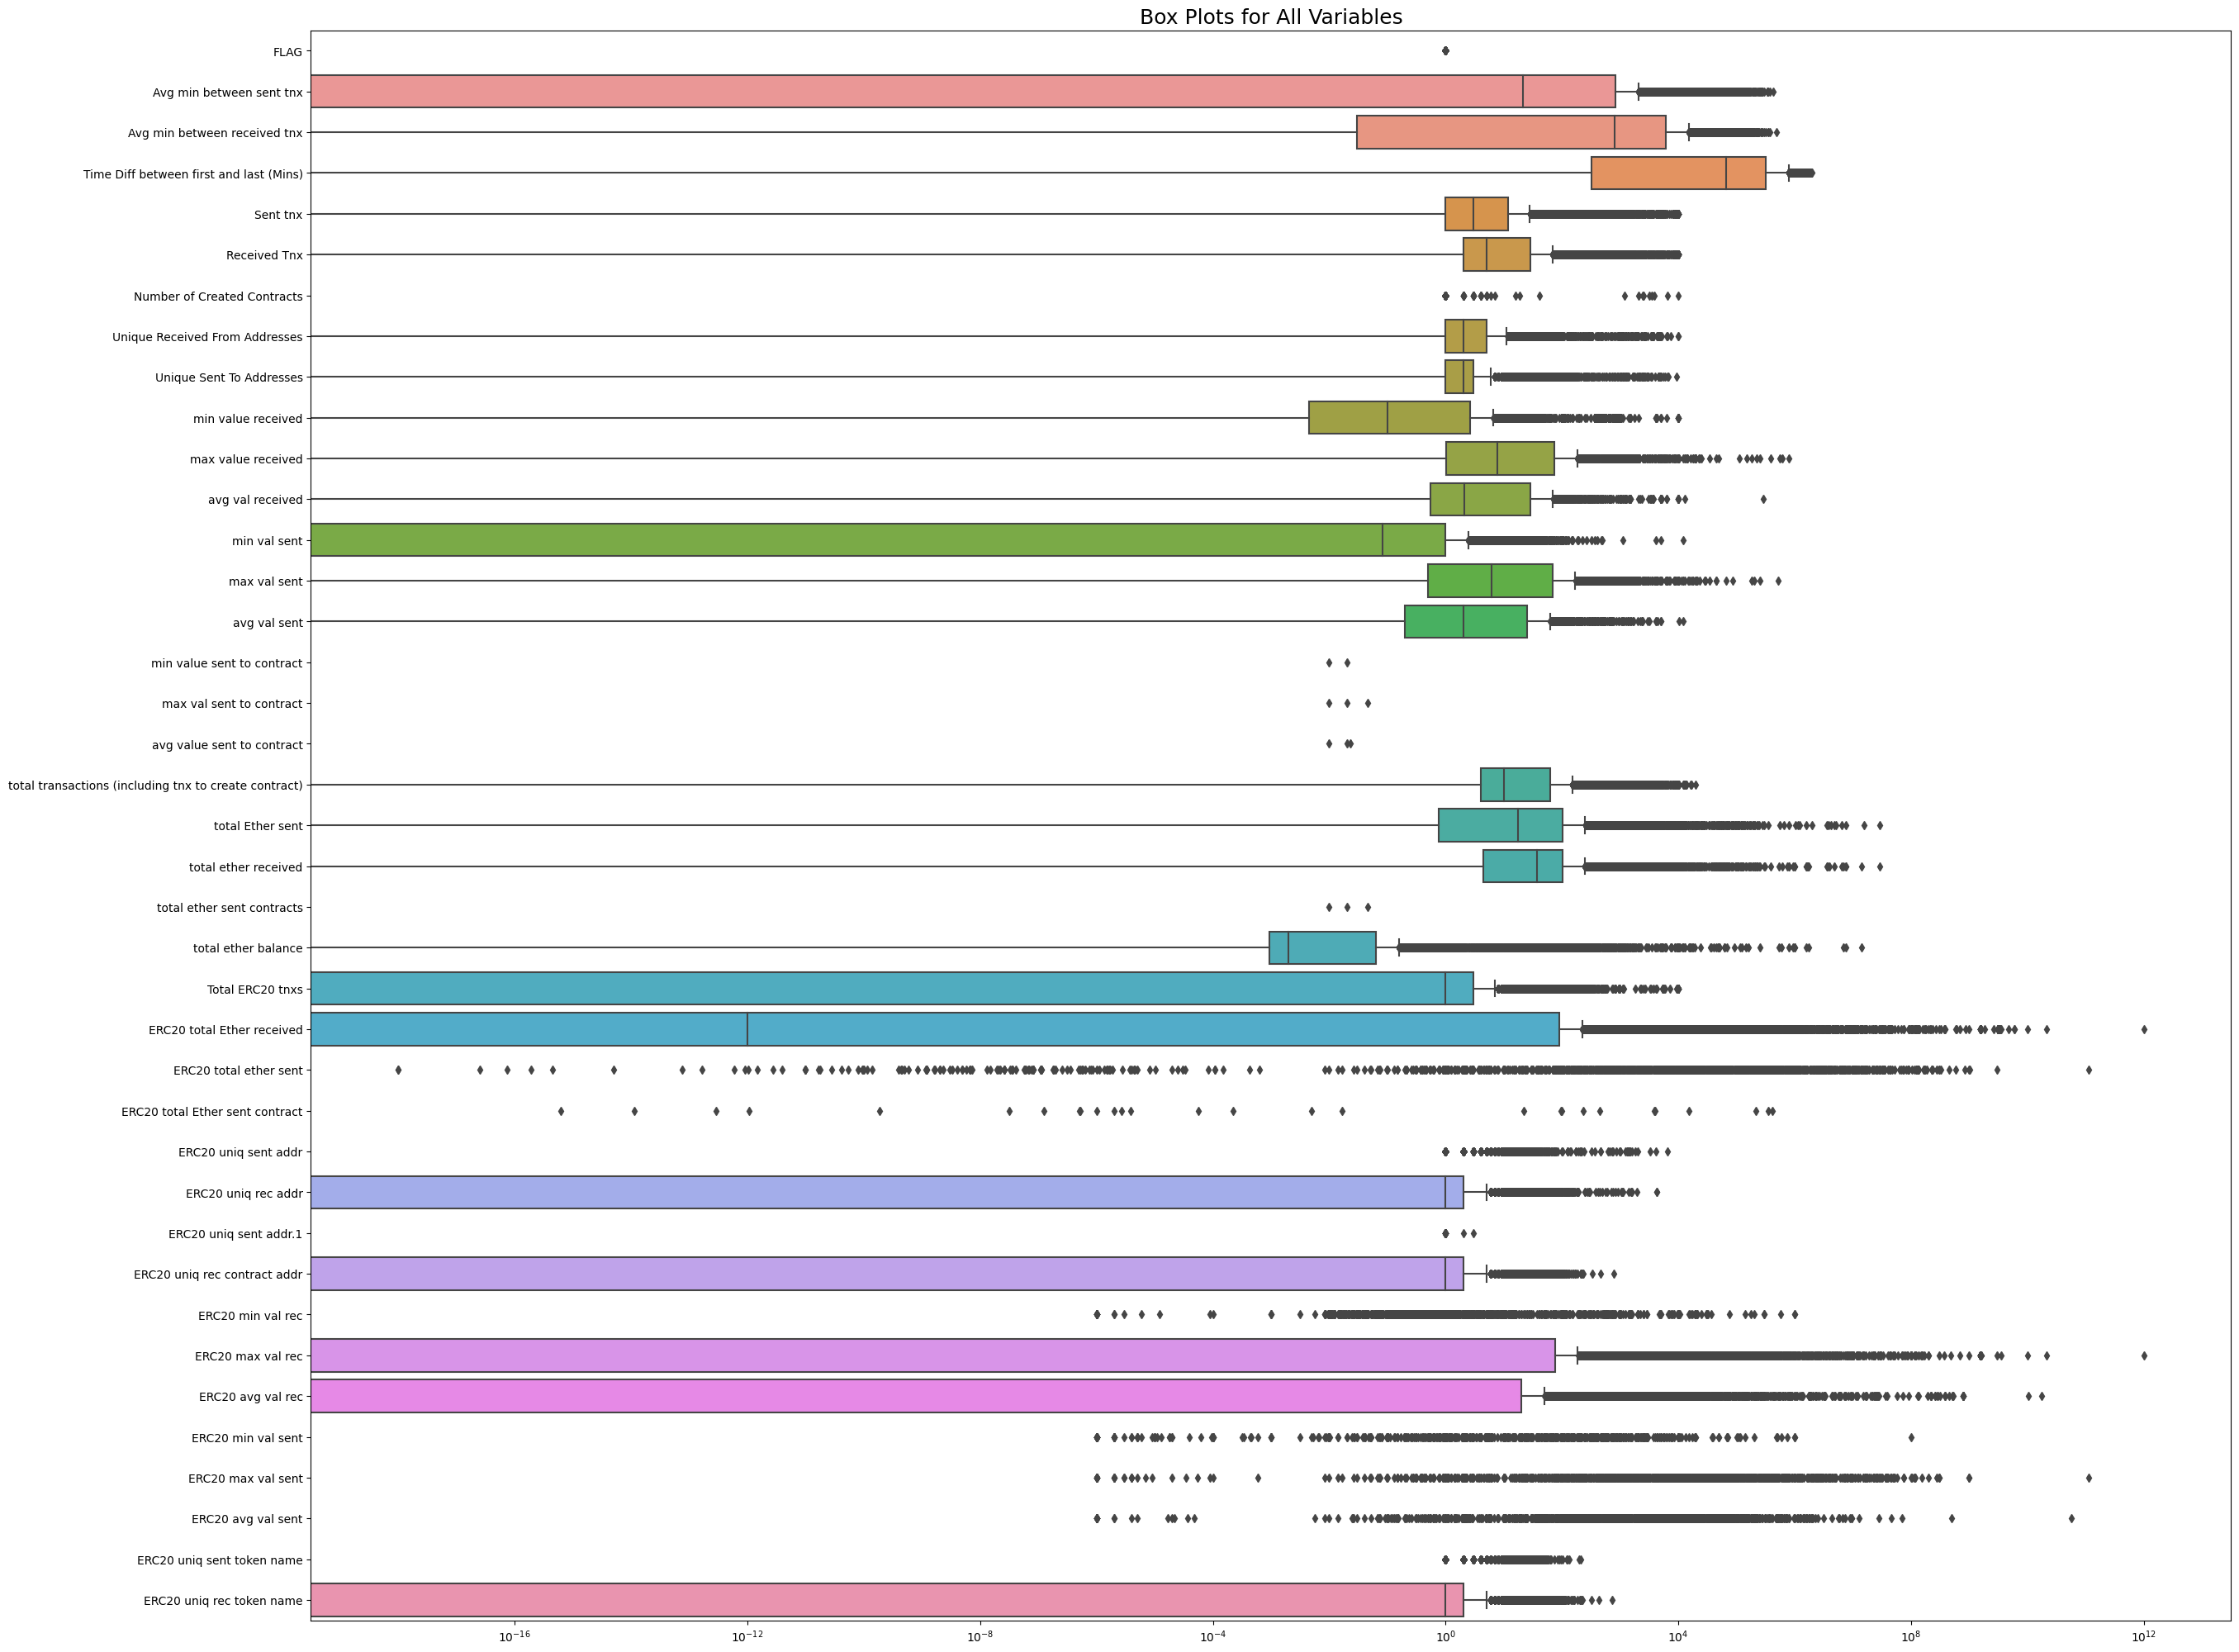

In [ ]:
# Plotting Boxplots of the features

plt.figure(figsize = (30,25))
ax =sns.boxplot(data = df, orient='h')
ax.set_title('Box Plots for All Variables', fontsize = 18)
ax.set(xscale='log')
plt.show()

The features all lie in different ranges. The data needs to be normalized before modeling because later modeling will use logistic regression and KNN because both methods are sensitive to the variable scale and data distribution. If the skew data is not normalized, it is possible that there will be a bias in the model, then the model performance will decrease. We will use Box Cox for data normalization because the the features contain much 0s.

Later modeling will also use tree-based, so we need to allow features that have not been normalized and then copy them for logistic regression and KNN modeling.

##Data Normalization

In [ ]:
# Copy dataframe. It will be useful for later analysis
df_normalization = copy.deepcopy(df_clean_ori)

In [ ]:
# Box Cox
from scipy.stats import boxcox

for column in df_normalization.columns:
    if column != 'total ether balance' and column != 'FLAG':
        df_normalization[column] = np.where(df_normalization[column] <= 0, 0.0001, df_normalization[column])  # to handle zero
        df_normalization[column], fitted_lambda = boxcox(df_normalization[column])

In [ ]:
# Winsorization
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print('Outliers:',out)
Winsorization_outliers(df_normalization['total ether balance'])

Outliers: [-854.6463028999998, -1422.982347, -2891.354427, -629.3501786, -3743.443847, -1633.635915, -752576.9329, -3500.466893, 115572.2429, -853.4735278999998, 2084.272476, 4847.505426, 798646.2797, -703.0326143999998, -751.4255472, 17354.95106, -15605352.04, 1871.462317, 12204.12006, -157323.68, -471878.5607, 1667.370629, -544.2589907, 48074.08233000001, 3092.452215, -3660.064314, 1614.975, 6182.058684000001, -25853.35742, 540520.9891, 24046.47337, 1753.1454620000004, 10786.17705, -3395545.789, -111818.7023, -570.6188552, 1594944.257, 5977.543531, -2071.299285, 1587.8892, 35029.547999999995, -1051.682337, 17897.04971, -1965.68779, -1024.974975, 7578.275097, -30705.94223, 1437.5282, -641.2776848999998, 2823.302301, -1979429.81, 12795.71923, -5484.555448, -4353.437711, -1079.871486, 5303.391356, -1578.607211, 2219.375387, -832.2276694, -49314.73694, -7118.327247, -2913.001071, 16233.03779, -72358.28283, 1441.209369, 1675.645092, -867.2674385, 6009.989207, -636.5351088, -10172.99228, 3

Because the `total ether balance` column has a relatively high negative value, the Winsorization method is used. This method involves replacing extreme values with certain upper or lower-bound values. In this way, values that are very far from the mean no longer affect the overall statistics.

CPU times: user 20.3 s, sys: 3.61 s, total: 23.9 s
Wall time: 20.3 s


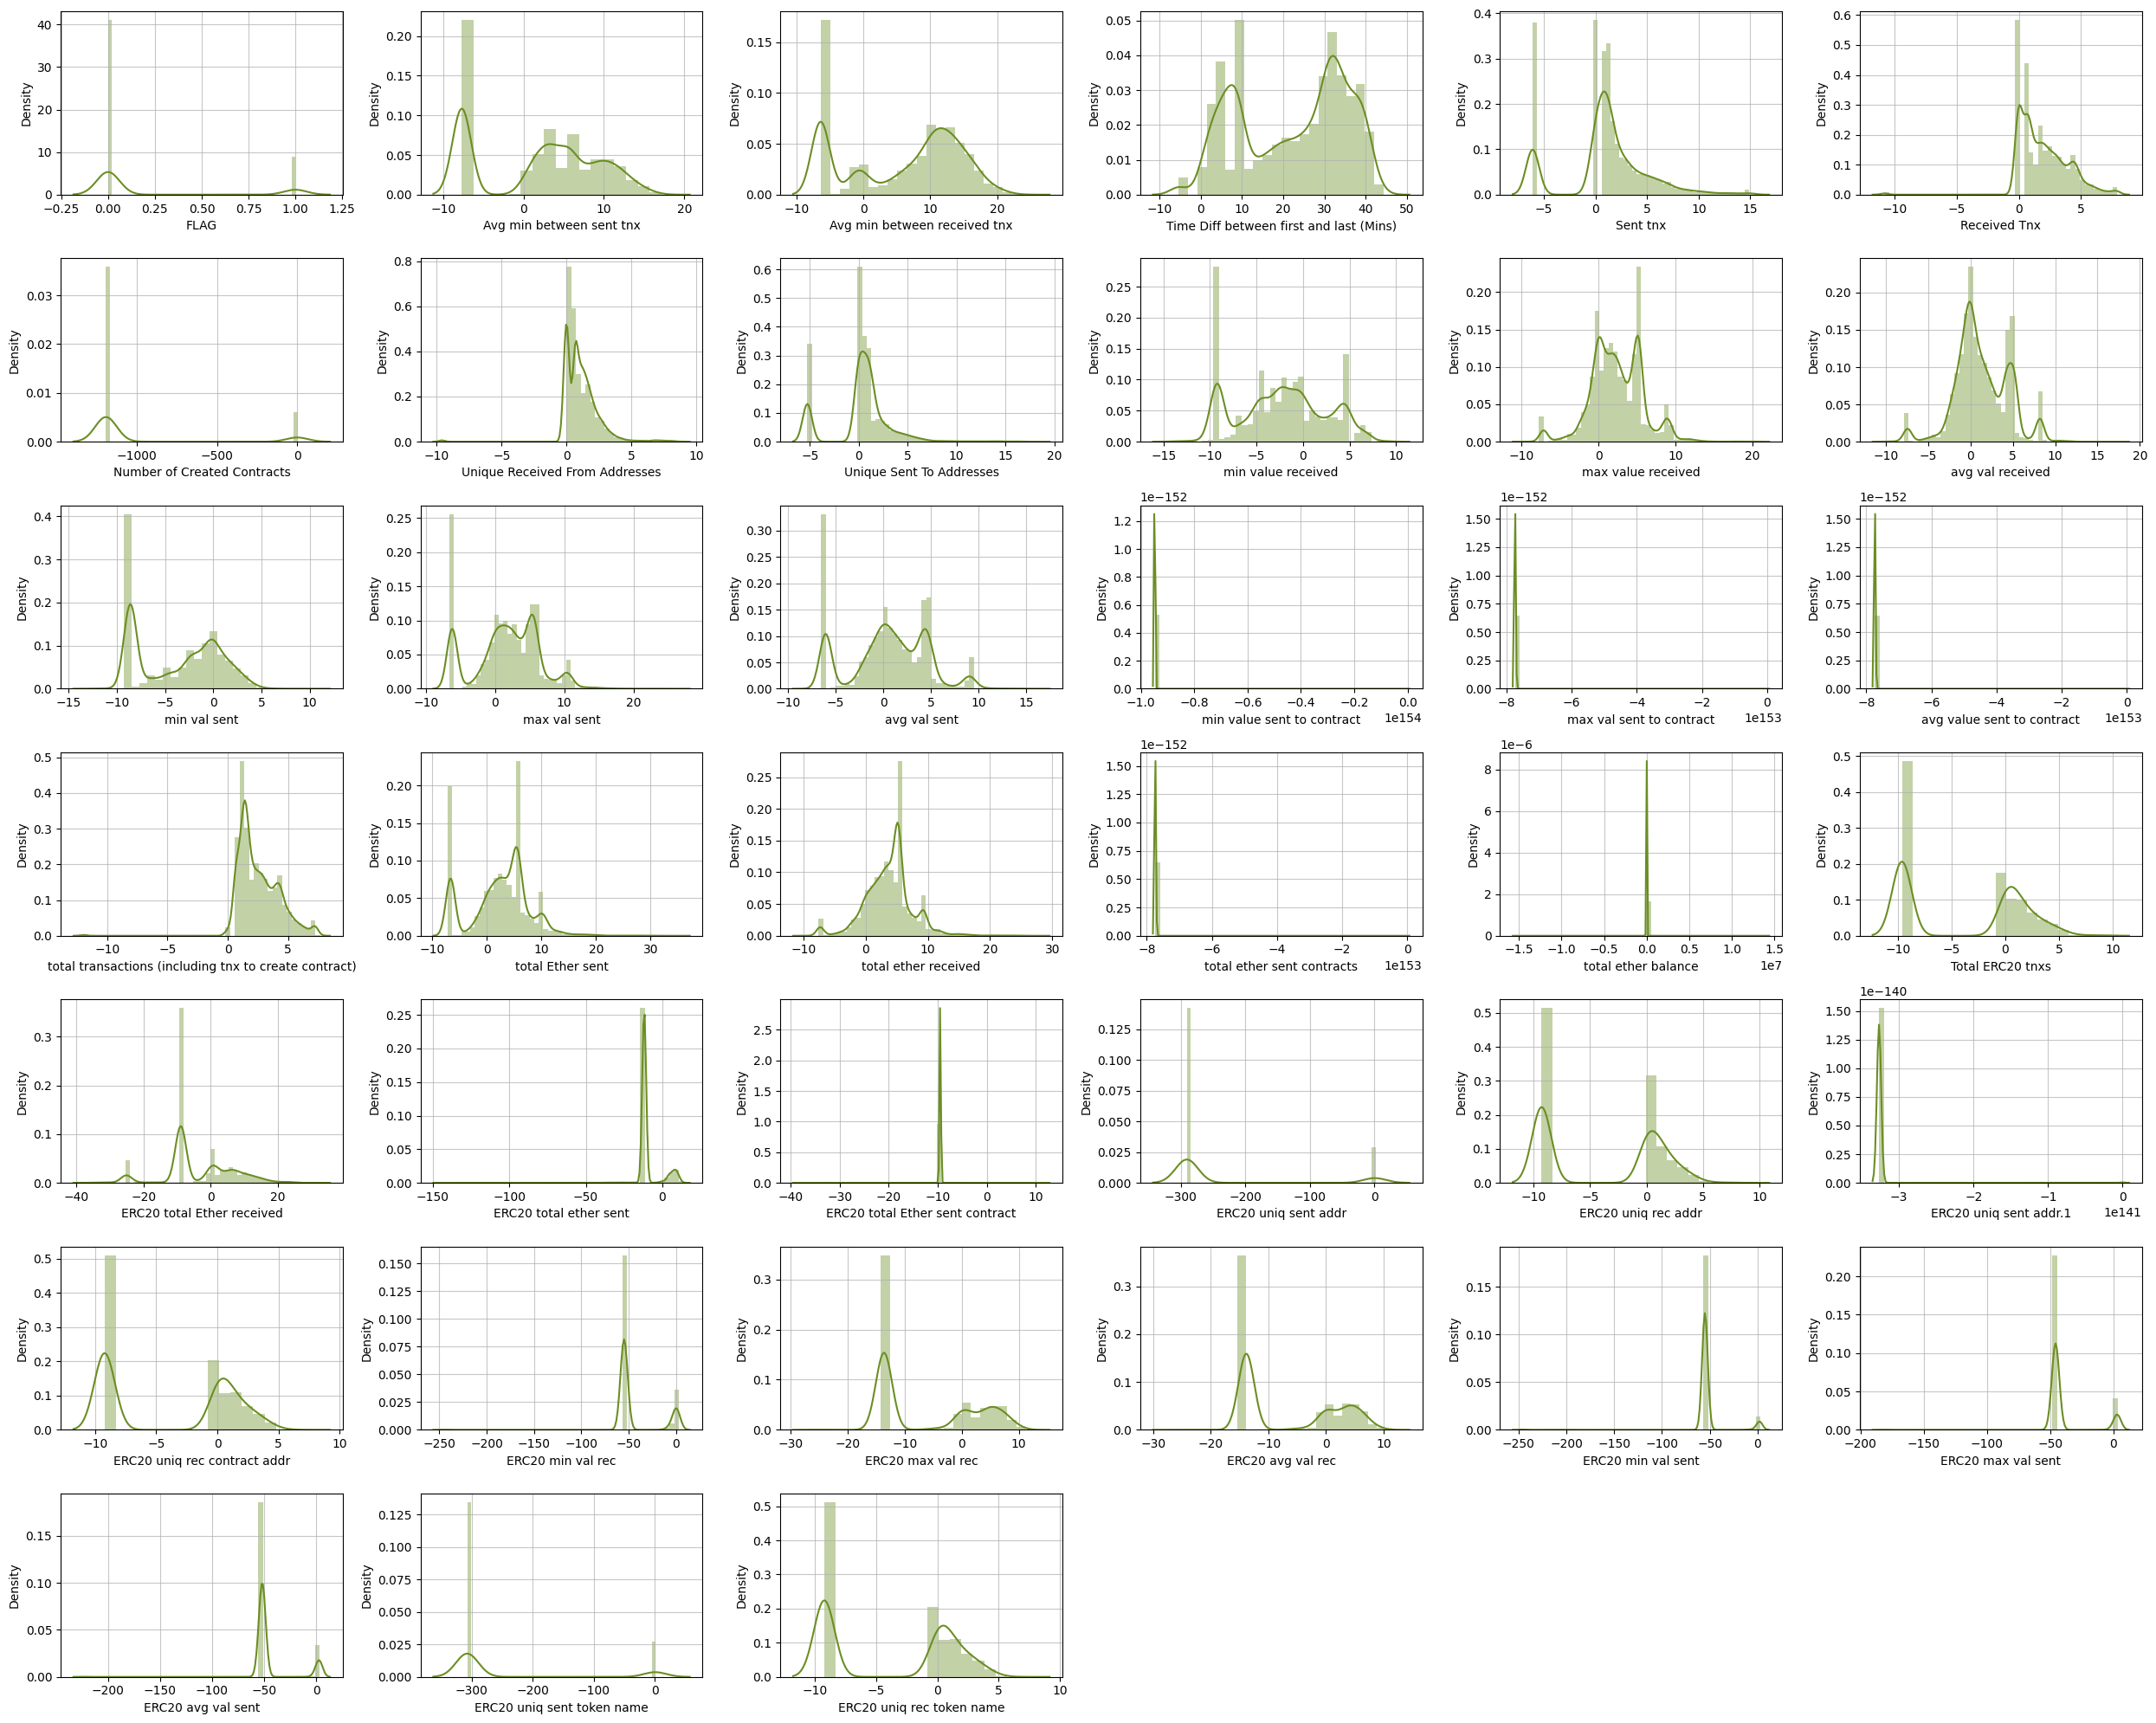

In [ ]:
# Adjust the figure size for better readability

%%time
feats = (list(df_normalization.loc[:, 'FLAG':'ERC20 uniq rec token name']))

fig = plt.figure(figsize=(25, 20))
rows, cols = 7, 6

for i in range(0, len(feats)):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.grid(alpha = 0.7, axis ='both')
    sns.distplot(x=df_normalization[feats[i]], color='olivedrab')
    plt.xlabel(feats[i])
    plt.tight_layout()

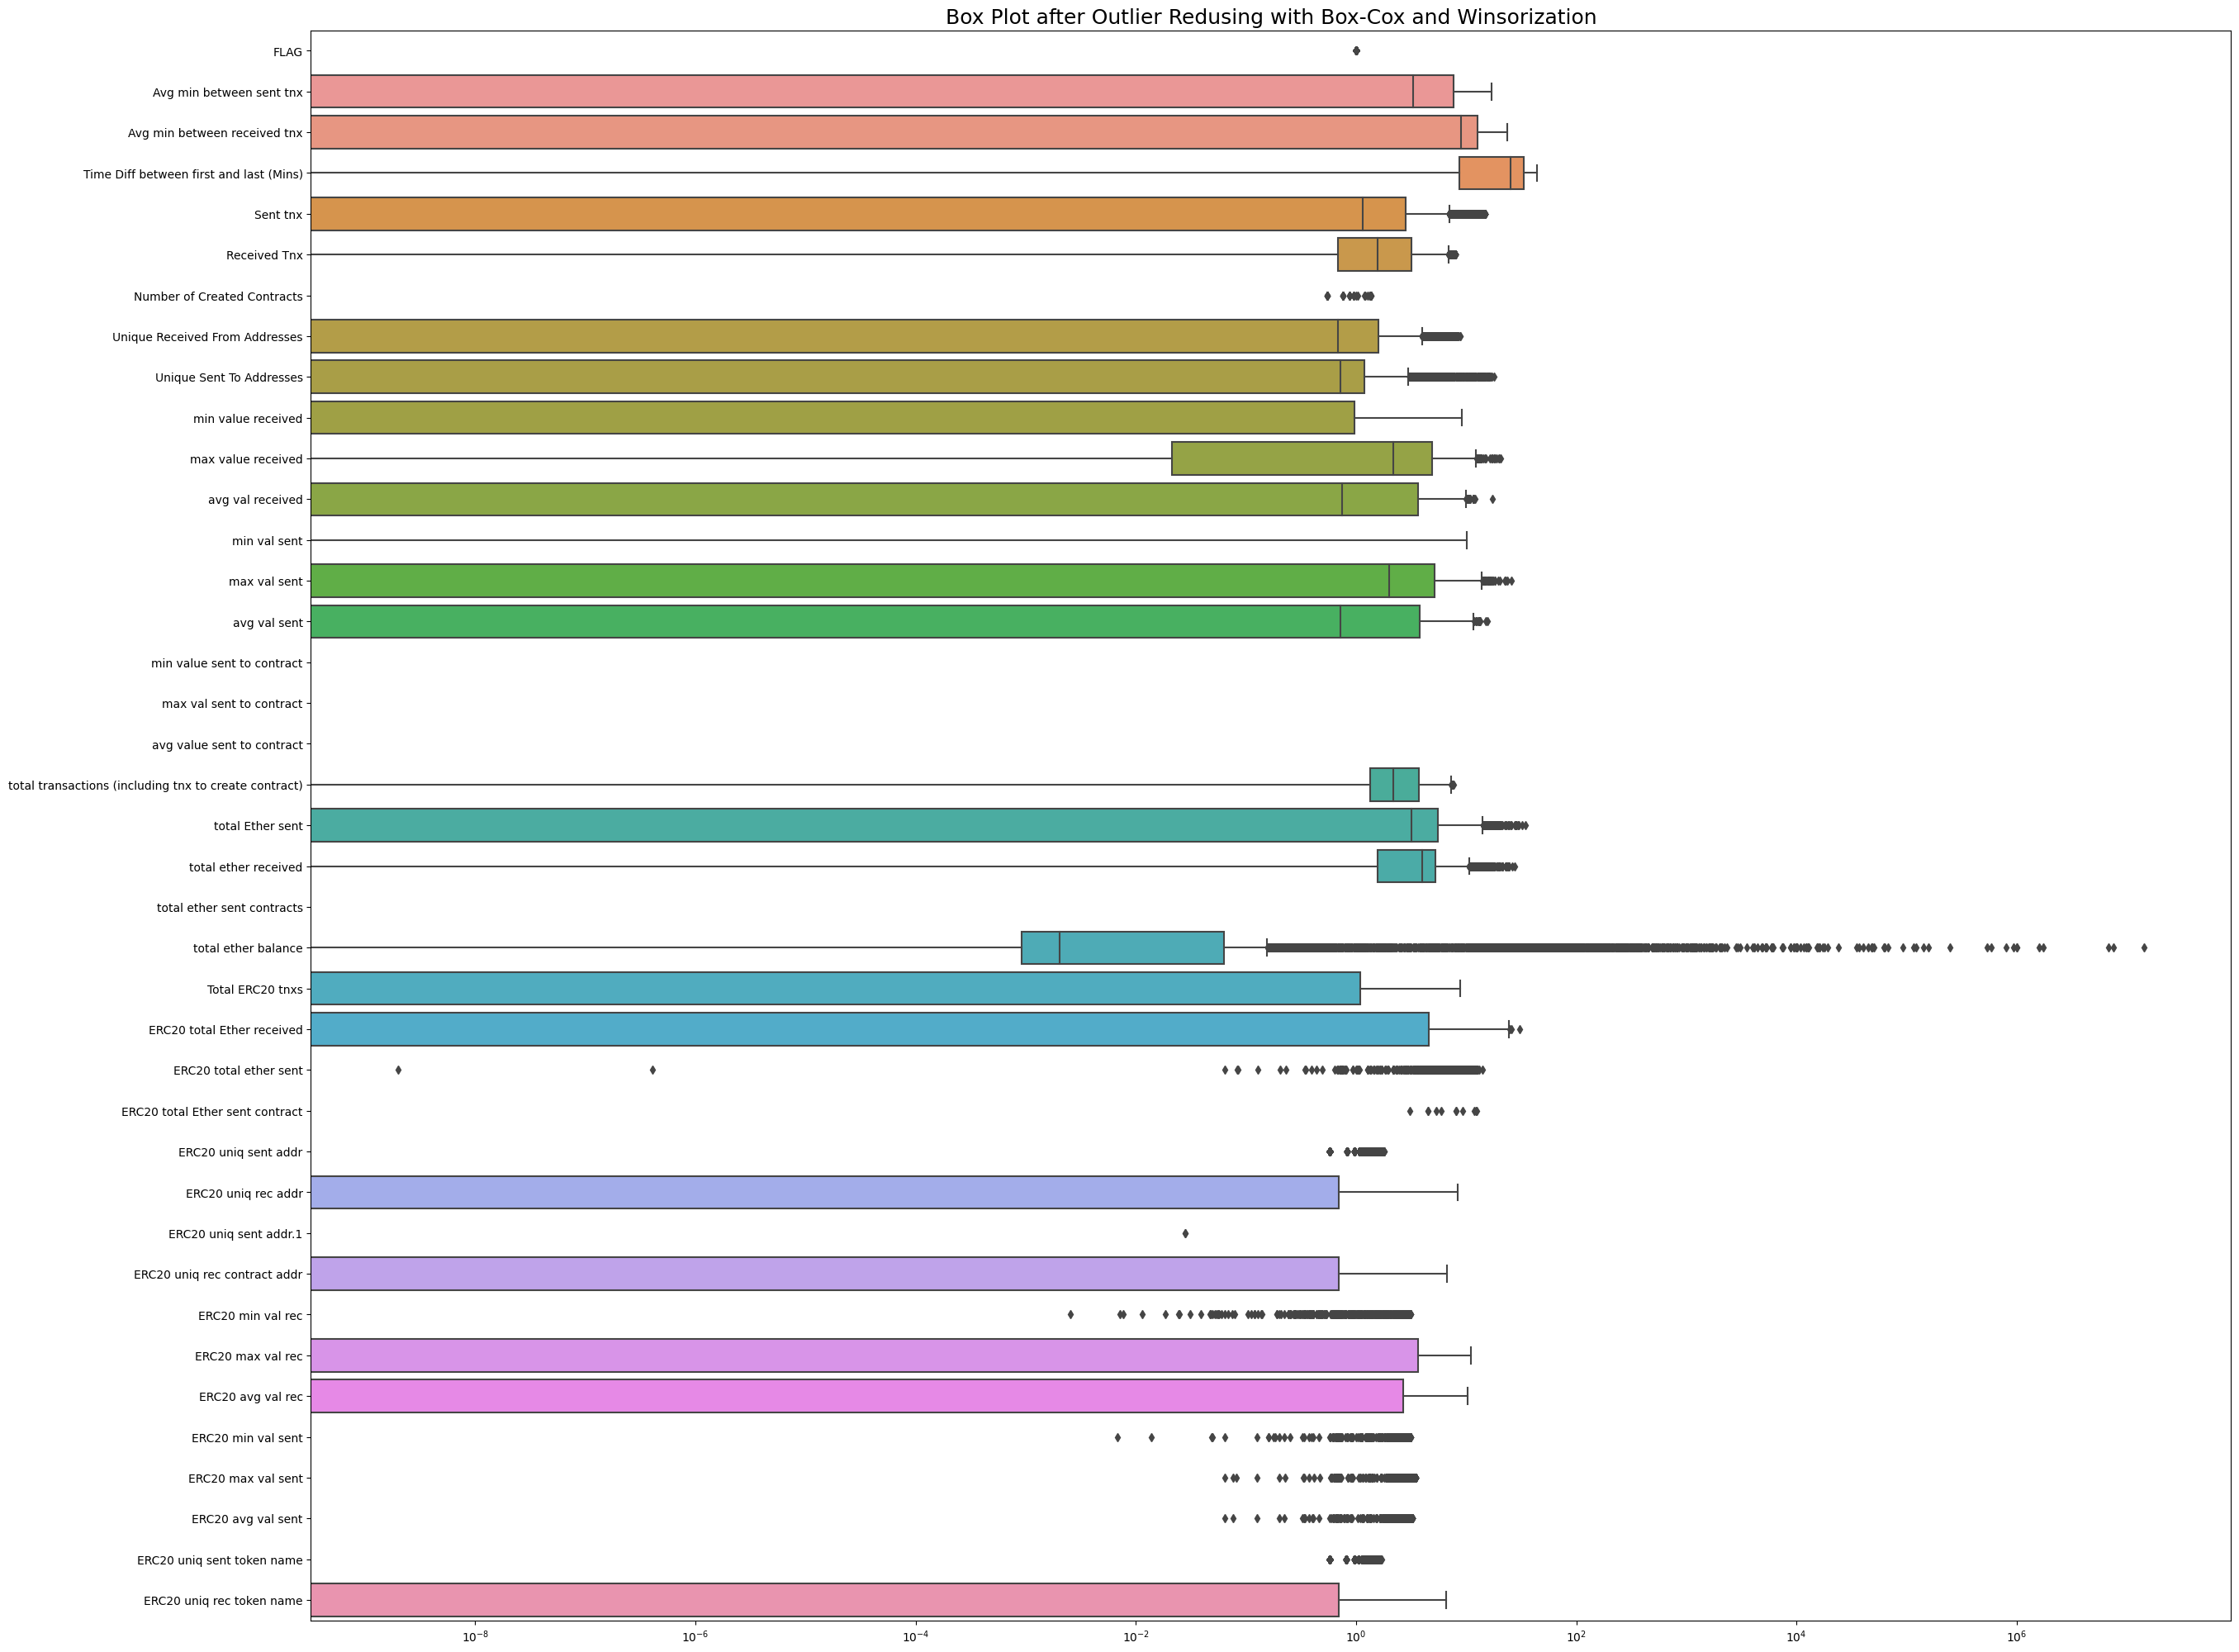

In [ ]:
# Box plot for each column
plt.figure(figsize = (30,25))
ax =sns.boxplot(data = df_normalization, orient='h')
ax.set_title('Box Plot after Outlier Redusing with Box-Cox and Winsorization', fontsize = 18)
ax.set(xscale='log')
plt.show()

In [ ]:
# Check dataframe
df_normalization

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0        0                  7.764836                      9.503483   
1        0                 11.549569                     11.363912   
2        0                 16.198893                     10.986839   
3        0                 11.229438                     14.865091   
4        0                  3.880549                     14.009496   
...    ...                       ...                           ...   
9835     1                 -7.666727                     -6.427084   
9836     1                 11.540960                      8.540603   
9838     1                  9.229267                     10.784612   
9839     1                 -7.666727                     -6.427084   
9840     1                 13.171019                      6.216379   

      Time Diff between first and last (Mins)   Sent tnx  Received Tnx  \
0                                   37.728063   9.223505      4.164190   
1                                   41.155910   5.715118      2.007926   
2                                   35.892414   0.717087      2.215116   
3                                   34.399967   3.780756      2.117483   
4                                   34.184181  13.078550      2.848811   
...                                       ...        ...           ...   
9835                                17.550058  -6.079969      0.000000   
9836                                24.961279   1.484270      2.456728   
9838                                32.123304   5.196586      3.531559   
9839                                -5.299739  -6.079969      0.000000   
9840                                37.430801   3.338369      1.078431   

      Number of Created Contracts  Unique Received From Addresses  \
0                    -1192.221386                        3.628464   
1                    -1192.221386                        1.597866   
2                    -1192.221386                        2.278948   
3                    -1192.221386                        1.929011   
4                        0.000000                        1.929011   
...                           ...                             ...   
9835                     0.000000                        0.000000   
9836                 -1192.221386                        2.372269   
9838                 -1192.221386                        3.381593   
9839                 -1192.221386                        0.000000   
9840                 -1192.221386                        0.000000   

      Unique Sent To Addresses  min value received  ...  \
0                     6.705576           -9.239575  ...   
1                     3.172371           -9.239575  ...   
2                     0.726730           -2.180949  ...   
3                     3.066948           -9.239575  ...   
4                     3.618137           -9.239575  ...   
...                        ...                 ...  ...   
9835                 -5.262260           -9.239575  ...   
9836                  1.525000           -5.511589  ...   
9838                  4.943394           -6.848728  ...   
9839                 -5.262260           -0.693312  ...   
9840                  1.798349           -0.229138  ...   

      ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  \
0             -3.267596e+141                      4.058023         -54.821291   
1             -3.267596e+141                      1.945354         -54.821291   
2             -3.267596e+141                      2.078807         -54.821291   
3             -3.267596e+141                      2.397051         -54.821291   
4             -3.267596e+141                      3.294242         -54.821291   
...                      ...                           ...                ...   
9835          -3.267596e+141                      0.000000         -54.821291   
9836          -3.267596e+141                      0.693077         -54.821291   
9838     

In [ ]:
# Let's check the information of the data normalization
df_normalization.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9288 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   FLAG                                                   9288 non-null   int64  
 1   Avg min between sent tnx                               9288 non-null   float64
 2   Avg min between received tnx                           9288 non-null   float64
 3   Time Diff between first and last (Mins)                9288 non-null   float64
 4   Sent tnx                                               9288 non-null   float64
 5   Received Tnx                                           9288 non-null   float64
 6   Number of Created Contracts                            9288 non-null   float64
 7   Unique Received From Addresses                         9288 non-null   float64
 8   Unique Sent To Addresses                        

##Multicollinearity

###Dataframe without normalization

<Axes: >

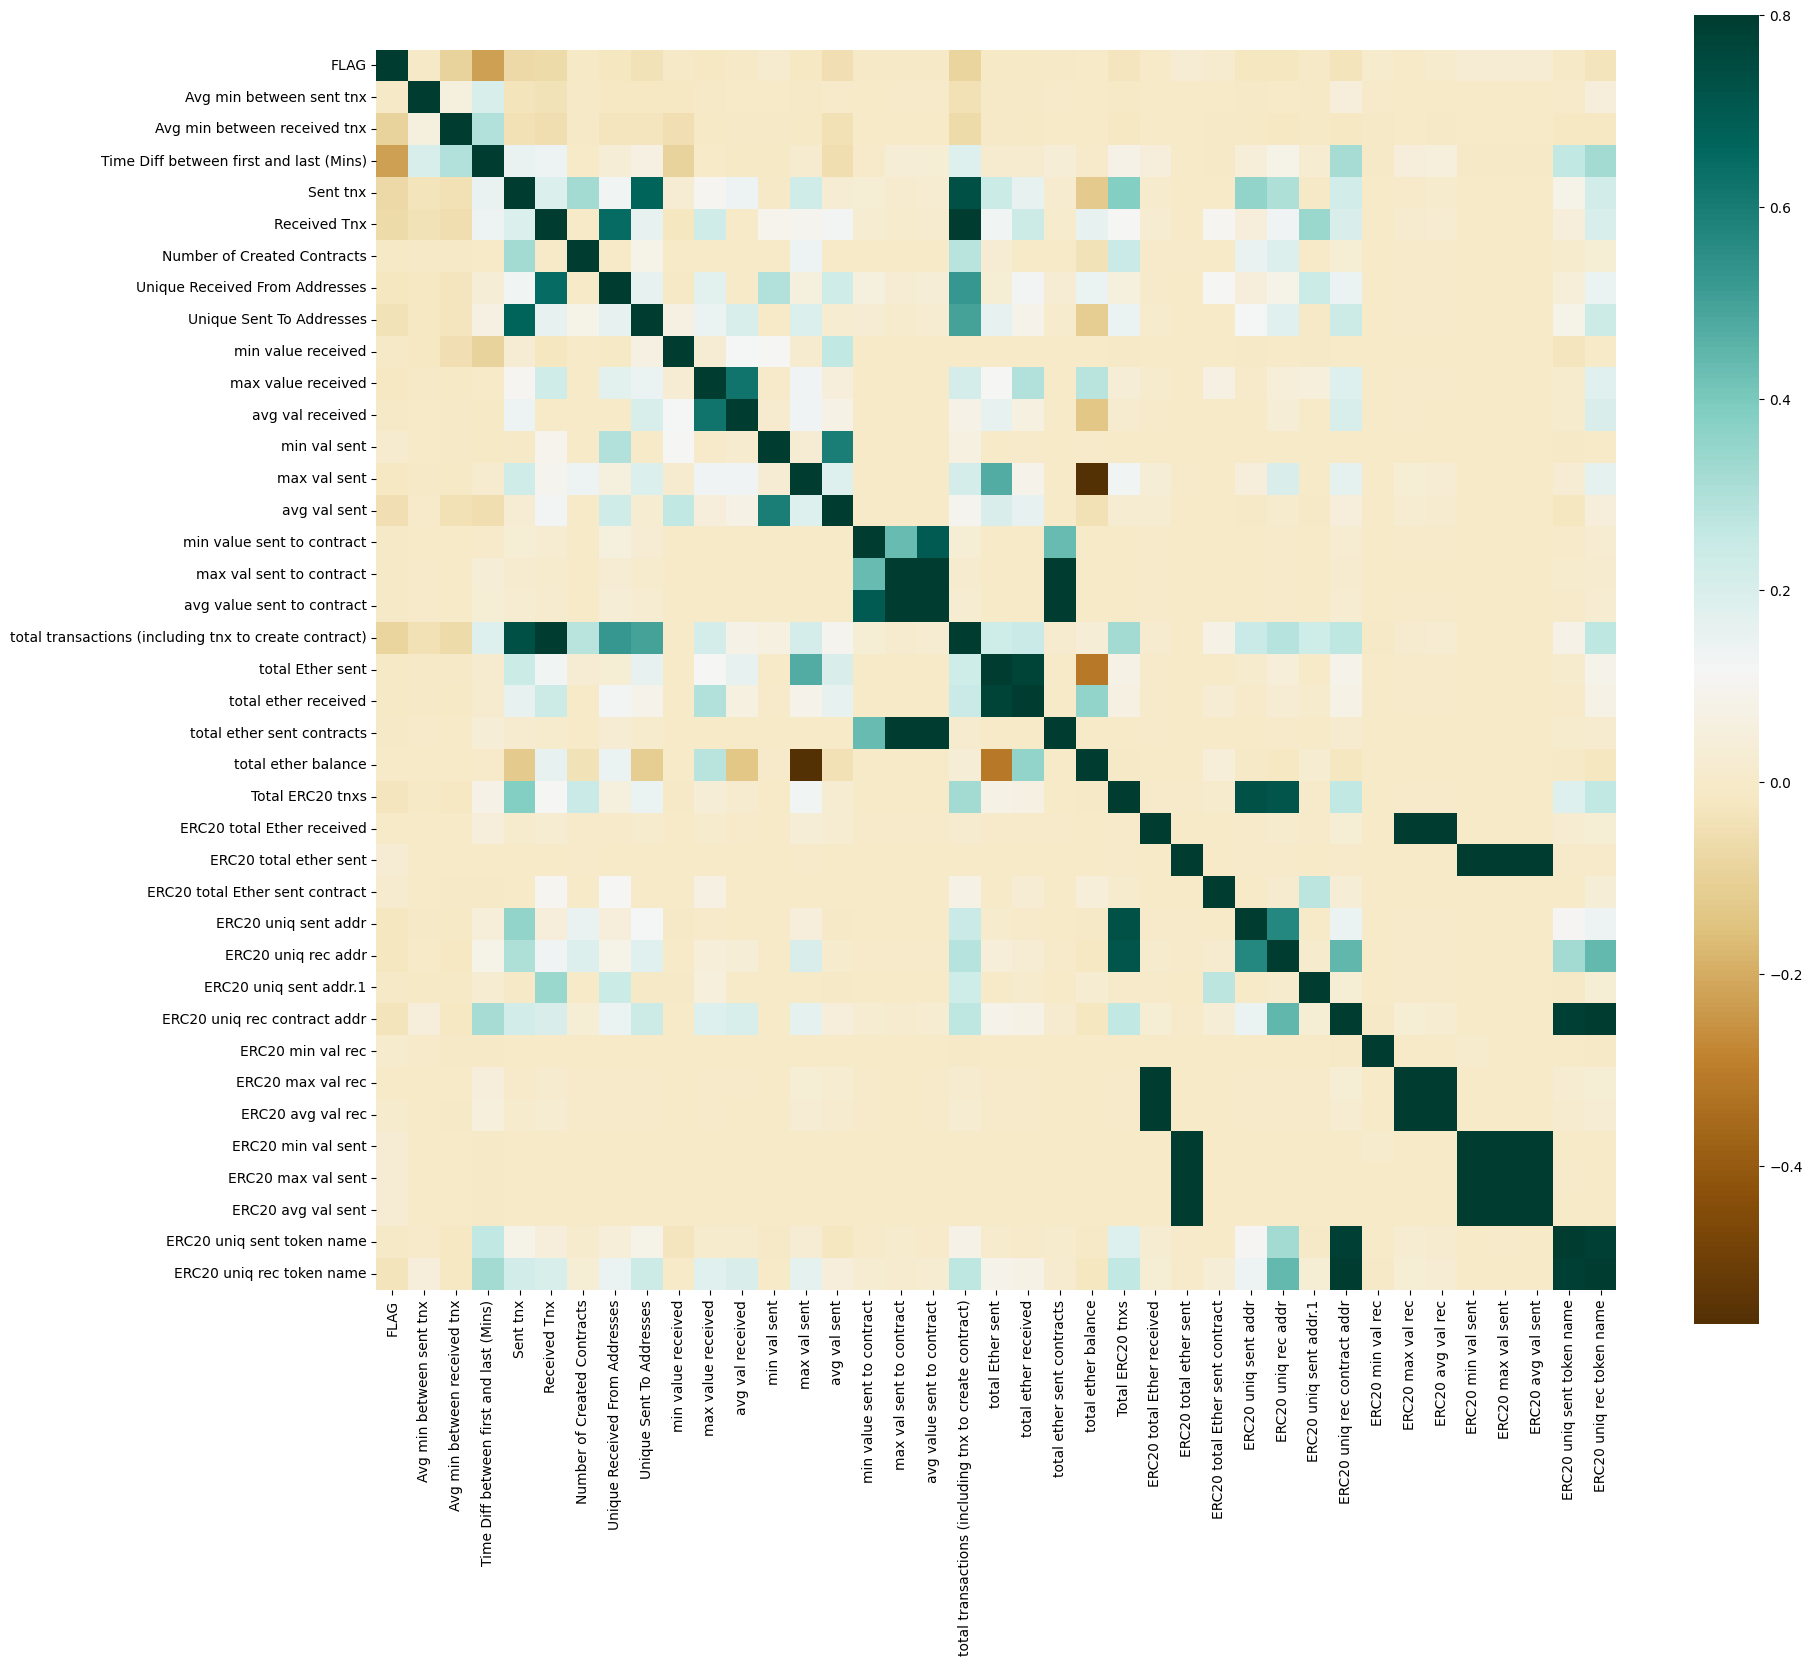

In [ ]:
# Correlation matrix visualization
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 17))
sns.heatmap(corrmat, vmax=.8, square=True, cmap=sns.color_palette('BrBG', as_cmap=True))

In [ ]:
# See the number of correlation
cor_matrix = df.corr()
cor_matrix.style.background_gradient(sns.light_palette('green', as_cmap=True))

In [ ]:
# Make function to summarise the correlated data above 0.8
def display_high_corr_features(df, threshold=0.8):
    # Compute correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation above threshold
    high_corr_features = set()
    for feature in upper_tri.columns:
        correlated_features = upper_tri.index[upper_tri[feature] > threshold].tolist()
        if len(correlated_features) > 0:
            correlated_features.append(feature)
            corr_values = [corr_matrix.loc[feature, f] for f in correlated_features]
            high_corr_features.add((tuple(sorted(correlated_features)), tuple(corr_values)))

    # Print results
    if len(high_corr_features) > 0:
        print('Features with correlation above %.2f:' % threshold)
        for features, corr_values in high_corr_features:
            print('%s: %s' % (str(features), str(corr_values)))
    else:
        print('No features with correlation above %.2f' % threshold)

In [ ]:
display_high_corr_features(df)

Features with correlation above 0.80:
('avg value sent to contract', 'max val sent to contract', 'total ether sent contracts'): (0.999999999996996, 0.9496069523345684, 1.0)
('ERC20 max val sent', 'ERC20 min val sent', 'ERC20 total ether sent'): (0.9996492219254902, 0.999729255296052, 1.0)
('ERC20 max val rec', 'ERC20 total Ether received'): (0.9999665866907113, 1.0)
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name'): (0.9996418770221989, 1.0)
('avg value sent to contract', 'max val sent to contract'): (0.9496061841126036, 1.0)
('ERC20 min val sent', 'ERC20 total ether sent'): (0.9993107684290566, 1.0)
('Received Tnx', 'total transactions (including tnx to create contract)'): (0.8060128941767909, 1.0)
('ERC20 avg val sent', 'ERC20 max val sent', 'ERC20 min val sent', 'ERC20 total ether sent'): (0.9995659084485637, 0.9997854901195159, 0.9999517463494083, 1.0)
('ERC20 avg val rec', 'ERC20 max val rec', 'ERC20 total Ether received'): (0.8598226947682354, 0.8597656282798843, 1.0)

In [ ]:
corr_matrix = df.corr().abs()
high_corr_var_pairs = (corr_matrix.where(np.triu(corr_matrix > 0.8, k=1))
                      .stack().reset_index().rename(columns={0: 'correlation'}))
high_corr_var_pairs = high_corr_var_pairs[high_corr_var_pairs['correlation'] > 0.8]
high_corr_var_pairs

level_0  \
0                   Received Tnx   
1       max val sent to contract   
2       max val sent to contract   
3     avg value sent to contract   
4     ERC20 total Ether received   
5     ERC20 total Ether received   
6         ERC20 total ether sent   
7         ERC20 total ether sent   
8         ERC20 total ether sent   
9   ERC20 uniq rec contract addr   
10             ERC20 max val rec   
11            ERC20 min val sent   
12            ERC20 min val sent   
13            ERC20 max val sent   

                                              level_1  correlation  
0   total transactions (including tnx to create co...     0.806013  
1                          avg value sent to contract     0.949606  
2                          total ether sent contracts     1.000000  
3                          total ether sent contracts     0.949607  
4                                   ERC20 max val rec     0.999967  
5                                   ERC20 avg val rec     0.859823  
6                                  ERC20 min val sent     0.999311  
7                                  ERC20 max val sent     0.999649  
8                                  ERC20 avg val sent     0.999566  
9                           ERC20 uniq rec token name     0.999642  
10                                  ERC20 avg val rec     0.859766  
11                                 ERC20 max val sent     0.999729  
12                                 ERC20 avg val sent     0.999785  
13                                 ERC20 avg val sent     0.999952

After observing, here are the features that correlate with the threshold value of 0.8.
1. avg value sent to contract
2. total transactions (including tnx to create contract)
3. total ether sent contracts
4. ERC20 max val rec
5. ERC20 avg val rec
6. ERC20 min val sent
7. ERC20 max val sent
8. ERC20 avg val sent
9. ERC20 uniq rec token name

We need to drop these columns, except `total transactions (including tnx to create contract)` because has the most highly correlated with `FLAG`.

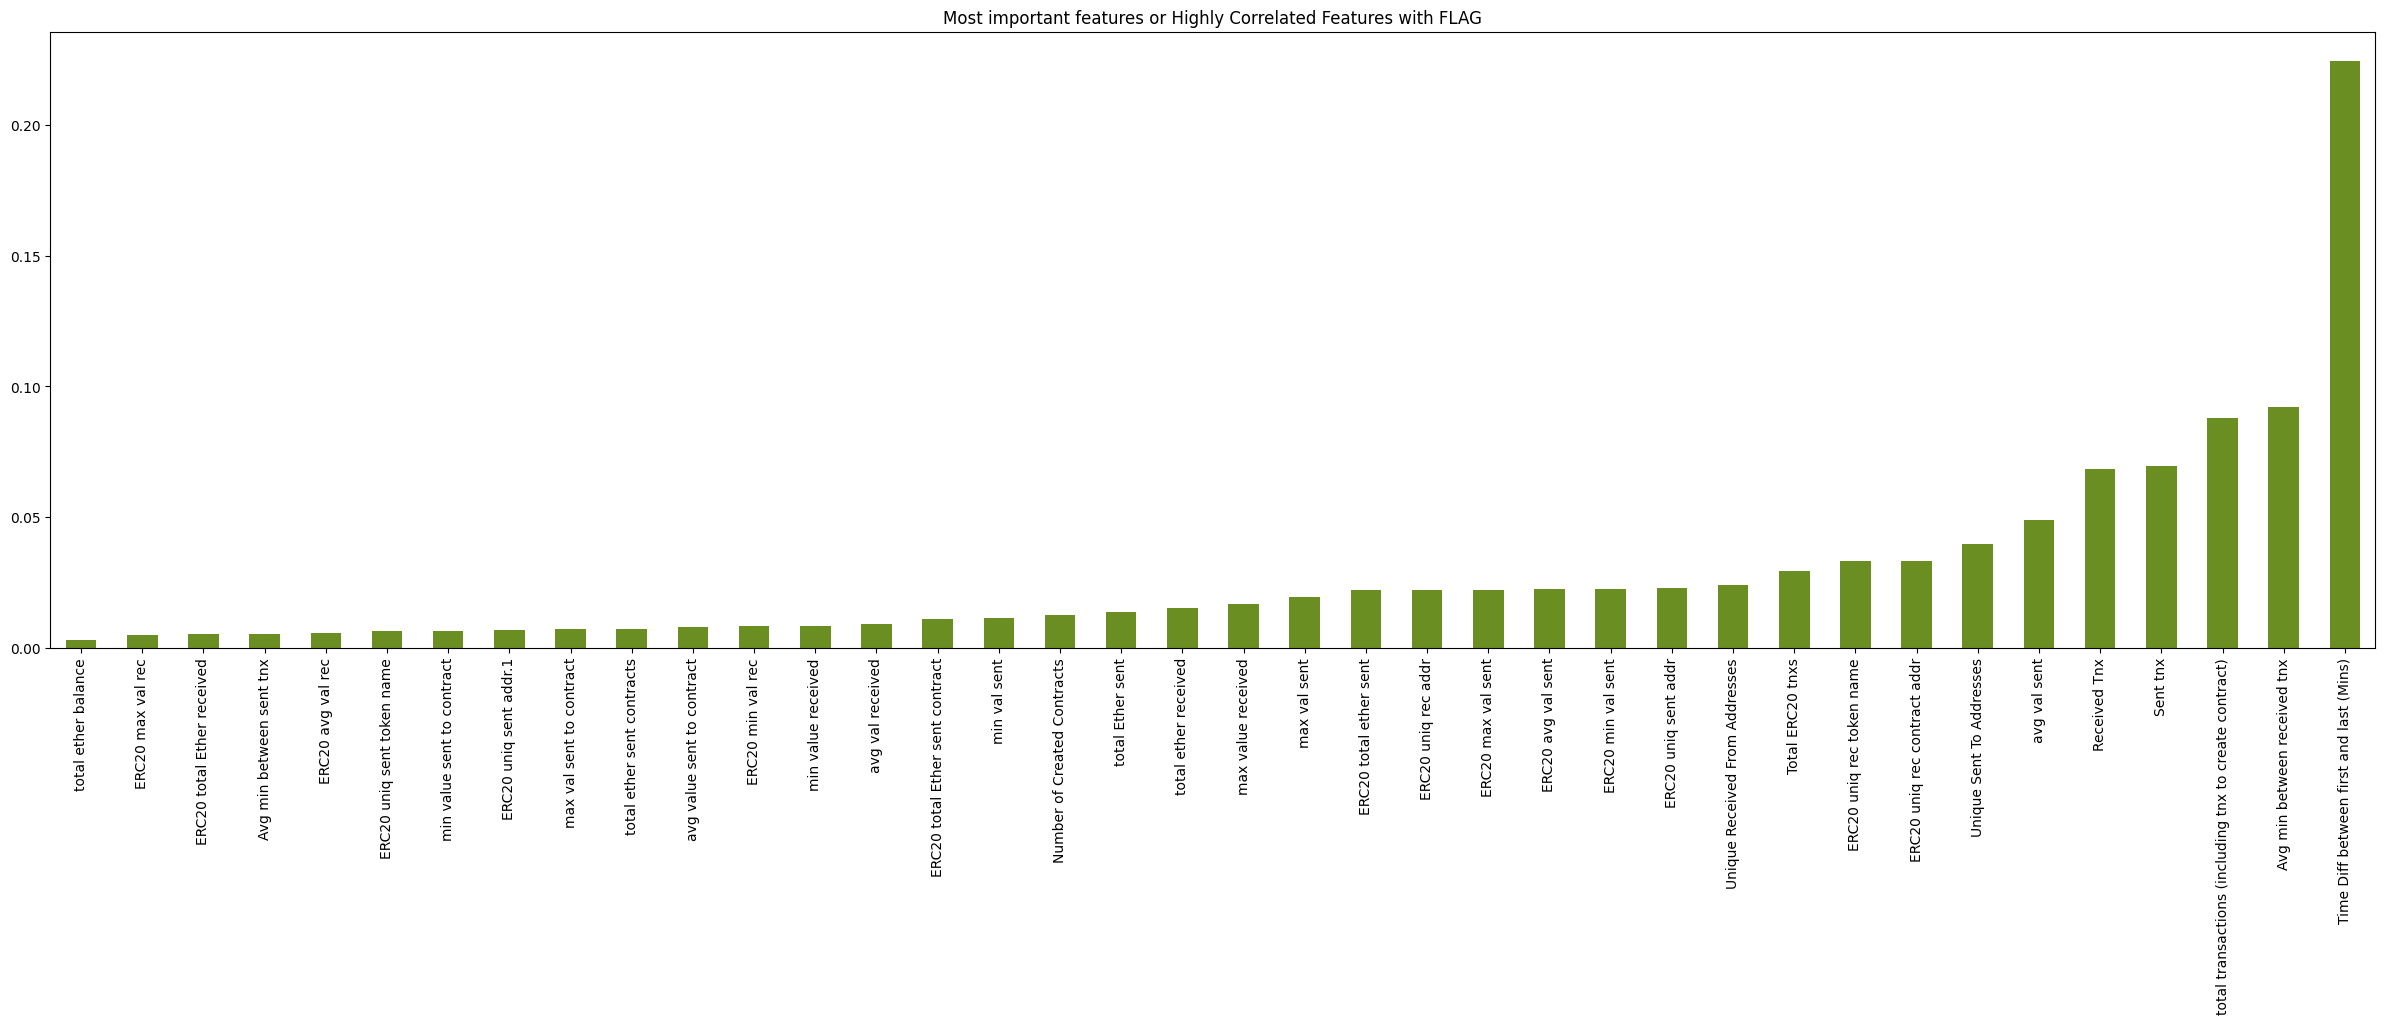

In [ ]:
# Barchart to visualize
plt.figure(figsize=(30,8))
d = df.corr()['FLAG'][1:].abs().sort_values().plot(kind='bar', color='olivedrab', title='Most important features or Highly Correlated Features with FLAG')
plt.show()

In [ ]:
# Show the high value correlated with FLAG
c = df.corr()['FLAG'][1:].sort_values()
c

Time Diff between first and last (Mins)                 -0.224568
Avg min between received tnx                            -0.092056
total transactions (including tnx to create contract)   -0.087738
Sent tnx                                                -0.069343
Received Tnx                                            -0.068402
avg val sent                                            -0.048857
Unique Sent To Addresses                                -0.039511
ERC20 uniq rec contract addr                            -0.033244
ERC20 uniq rec token name                               -0.033037
Total ERC20 tnxs                                        -0.029336
Unique Received From Addresses                          -0.023857
ERC20 uniq sent addr                                    -0.022791
ERC20 uniq rec addr                                     -0.021960
max val sent                                            -0.019490
max value received                                      -0.016824
total ethe

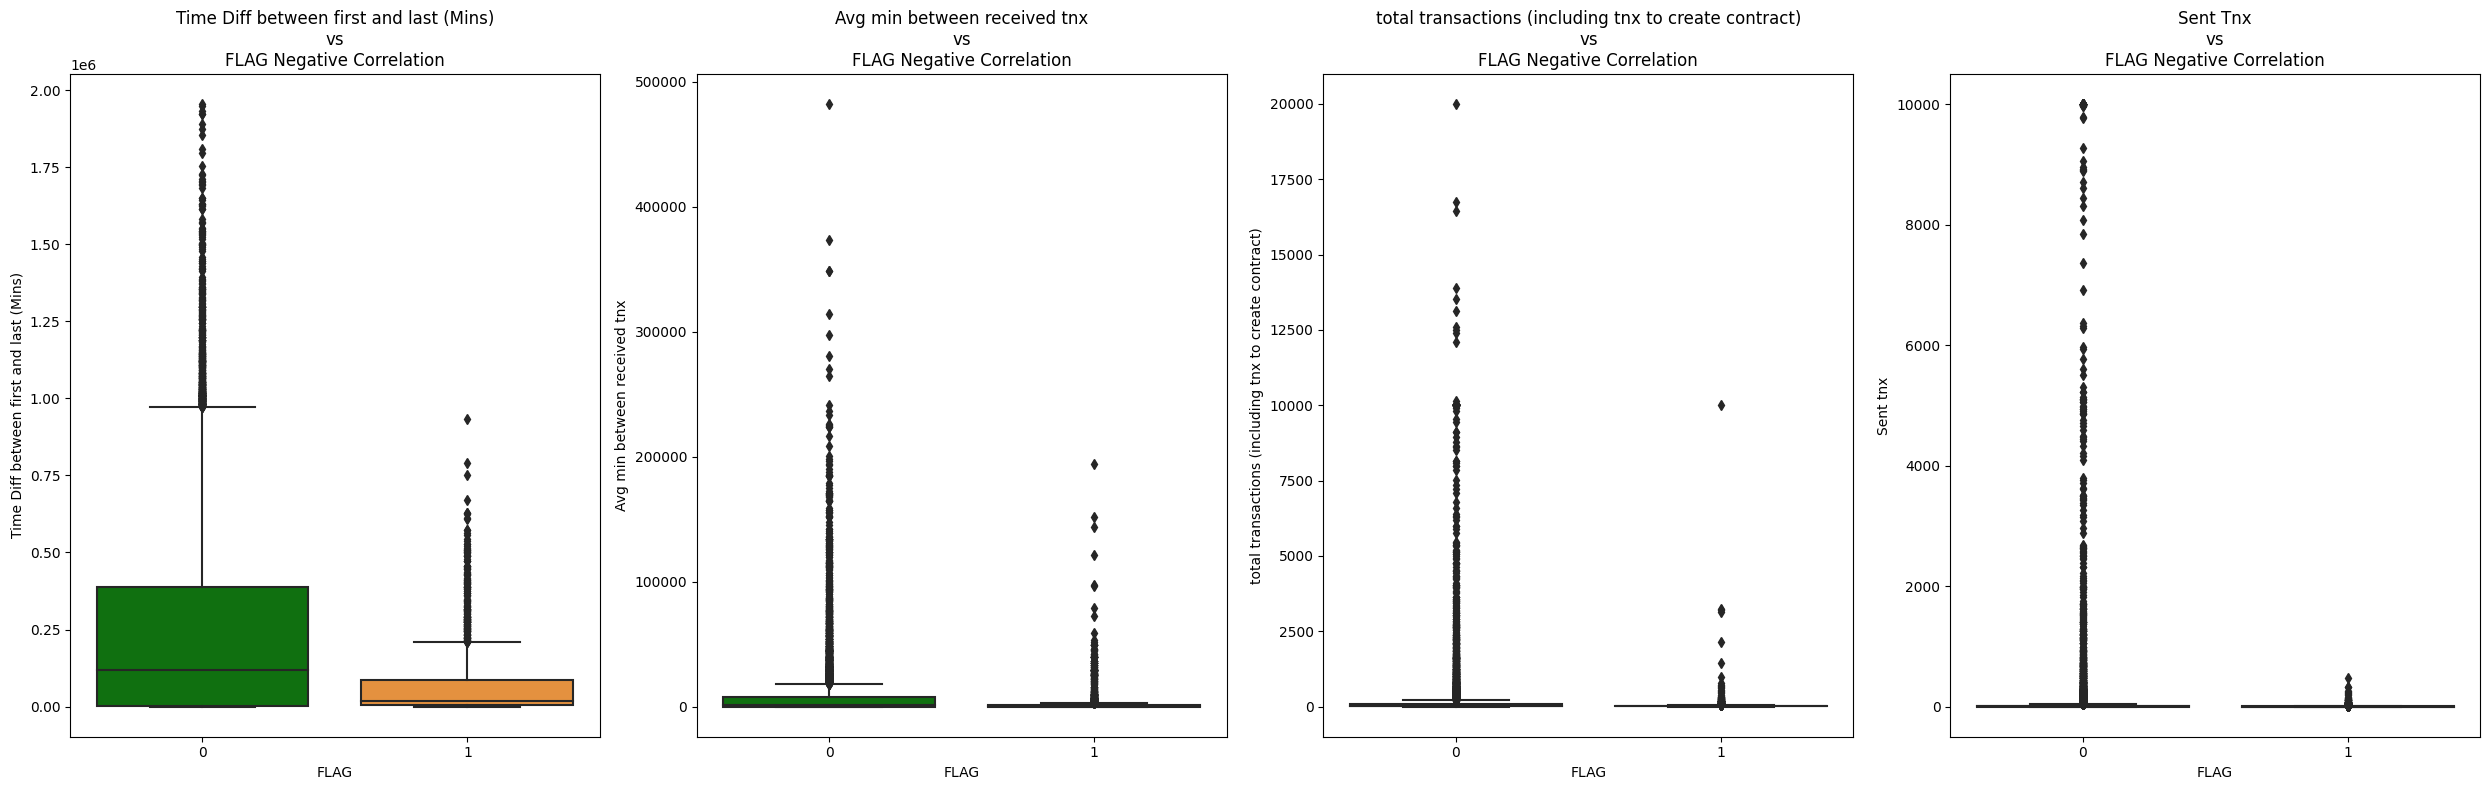

In [ ]:
colors = ['#008000','#ff9124']

f, axes = plt.subplots(ncols=4, figsize=(25,8))

# Negative Correlations with our FLAG (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x='FLAG', y='Time Diff between first and last (Mins)', data=df, palette=colors, ax=axes[0])
axes[0].set_title('Time Diff between first and last (Mins)\nvs\nFLAG Negative Correlation')

sns.boxplot(x='FLAG', y='Avg min between received tnx', data=df, palette=colors, ax=axes[1])
axes[1].set_title('Avg min between received tnx\nvs\nFLAG Negative Correlation')

sns.boxplot(x='FLAG', y='total transactions (including tnx to create contract)', data=df, palette=colors, ax=axes[2])
axes[2].set_title('total transactions (including tnx to create contract)\nvs\nFLAG Negative Correlation')

sns.boxplot(x='FLAG', y='Sent tnx', data=df, palette=colors, ax=axes[3])
axes[3].set_title('Sent Tnx\nvs\nFLAG Negative Correlation')

plt.tight_layout()
plt.show()

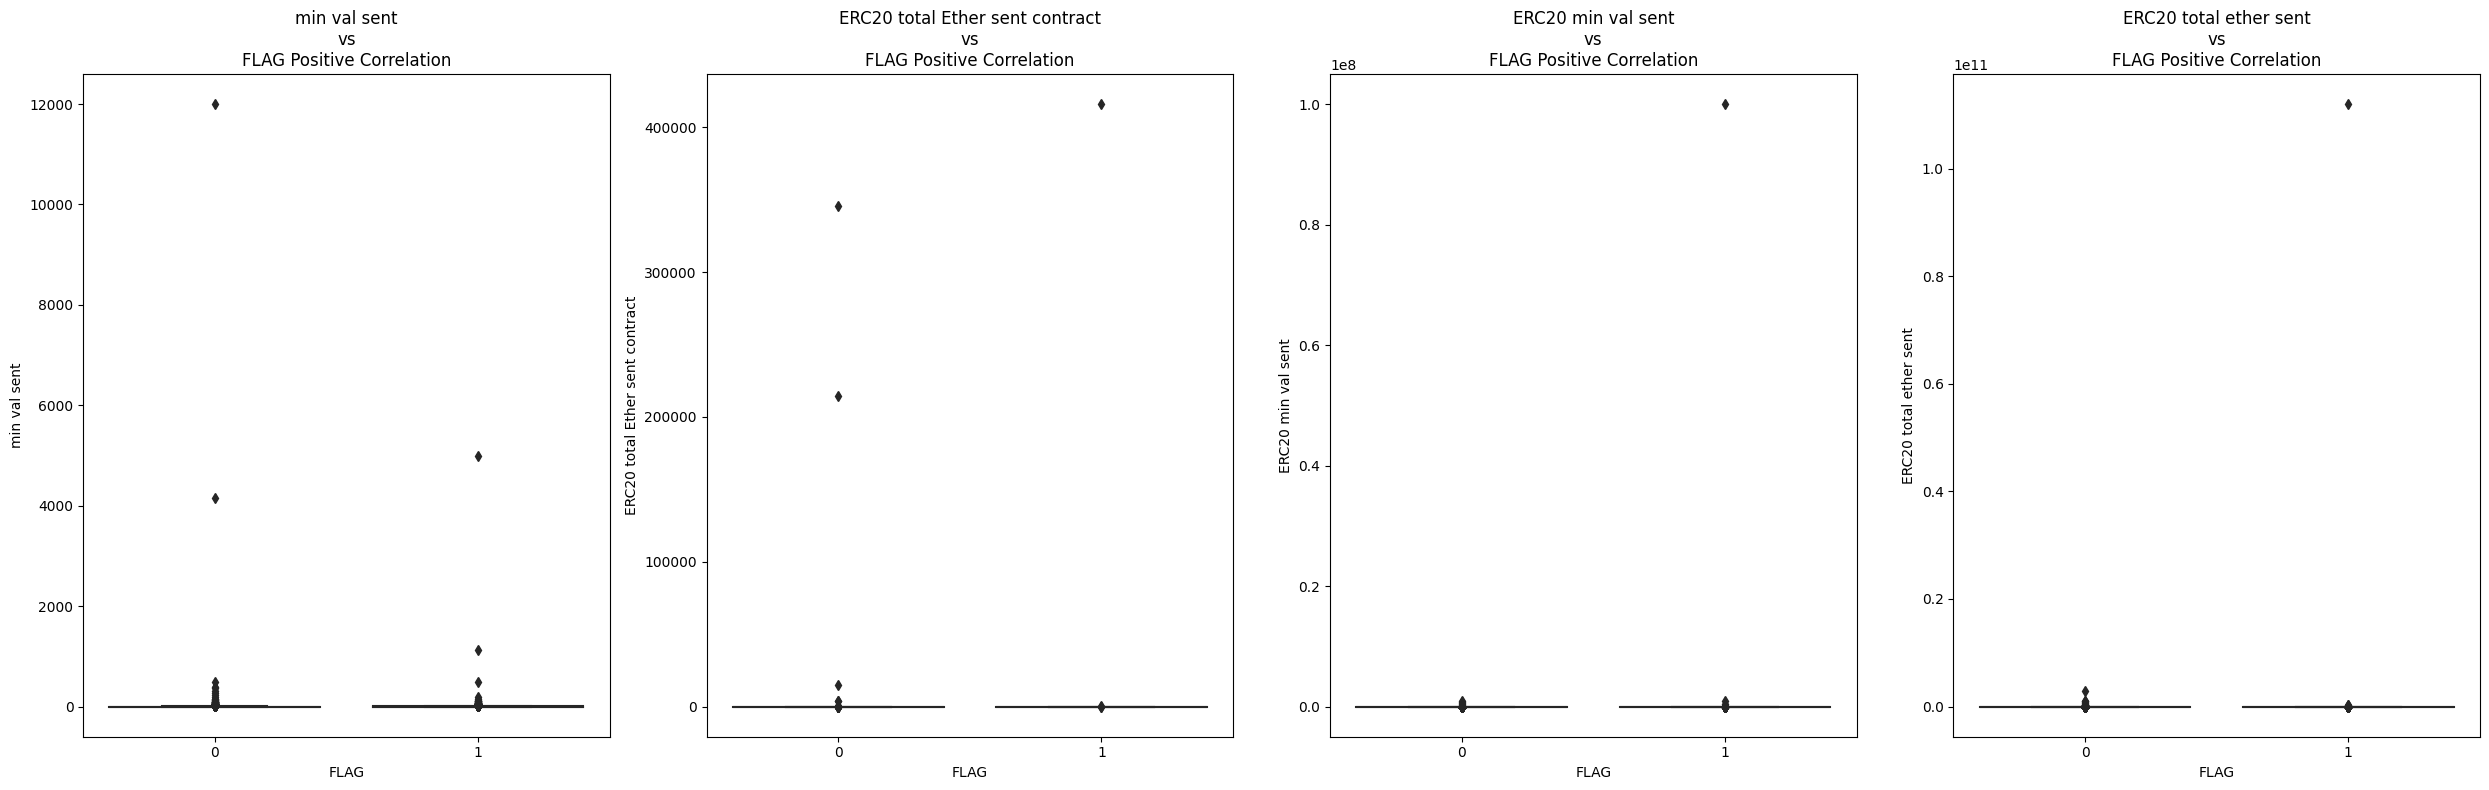

In [ ]:
colors = ['#008000','#ff9124']

f, axes = plt.subplots(ncols=4, figsize=(25,8))

# Negative Correlations with our FLAG (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x='FLAG', y='min val sent', data=df, palette=colors, ax=axes[0])
axes[0].set_title('min val sent\nvs\nFLAG Positive Correlation')

sns.boxplot(x='FLAG', y='ERC20 total Ether sent contract', data=df, palette=colors, ax=axes[1])
axes[1].set_title('ERC20 total Ether sent contract\nvs\nFLAG Positive Correlation')

sns.boxplot(x='FLAG', y='ERC20 min val sent', data=df, palette=colors, ax=axes[2])
axes[2].set_title('ERC20 min val sent\nvs\nFLAG Positive Correlation')

sns.boxplot(x='FLAG', y='ERC20 total ether sent', data=df, palette=colors, ax=axes[3])
axes[3].set_title('ERC20 total ether sent\nvs\nFLAG Positive Correlation')

plt.tight_layout()
plt.show()

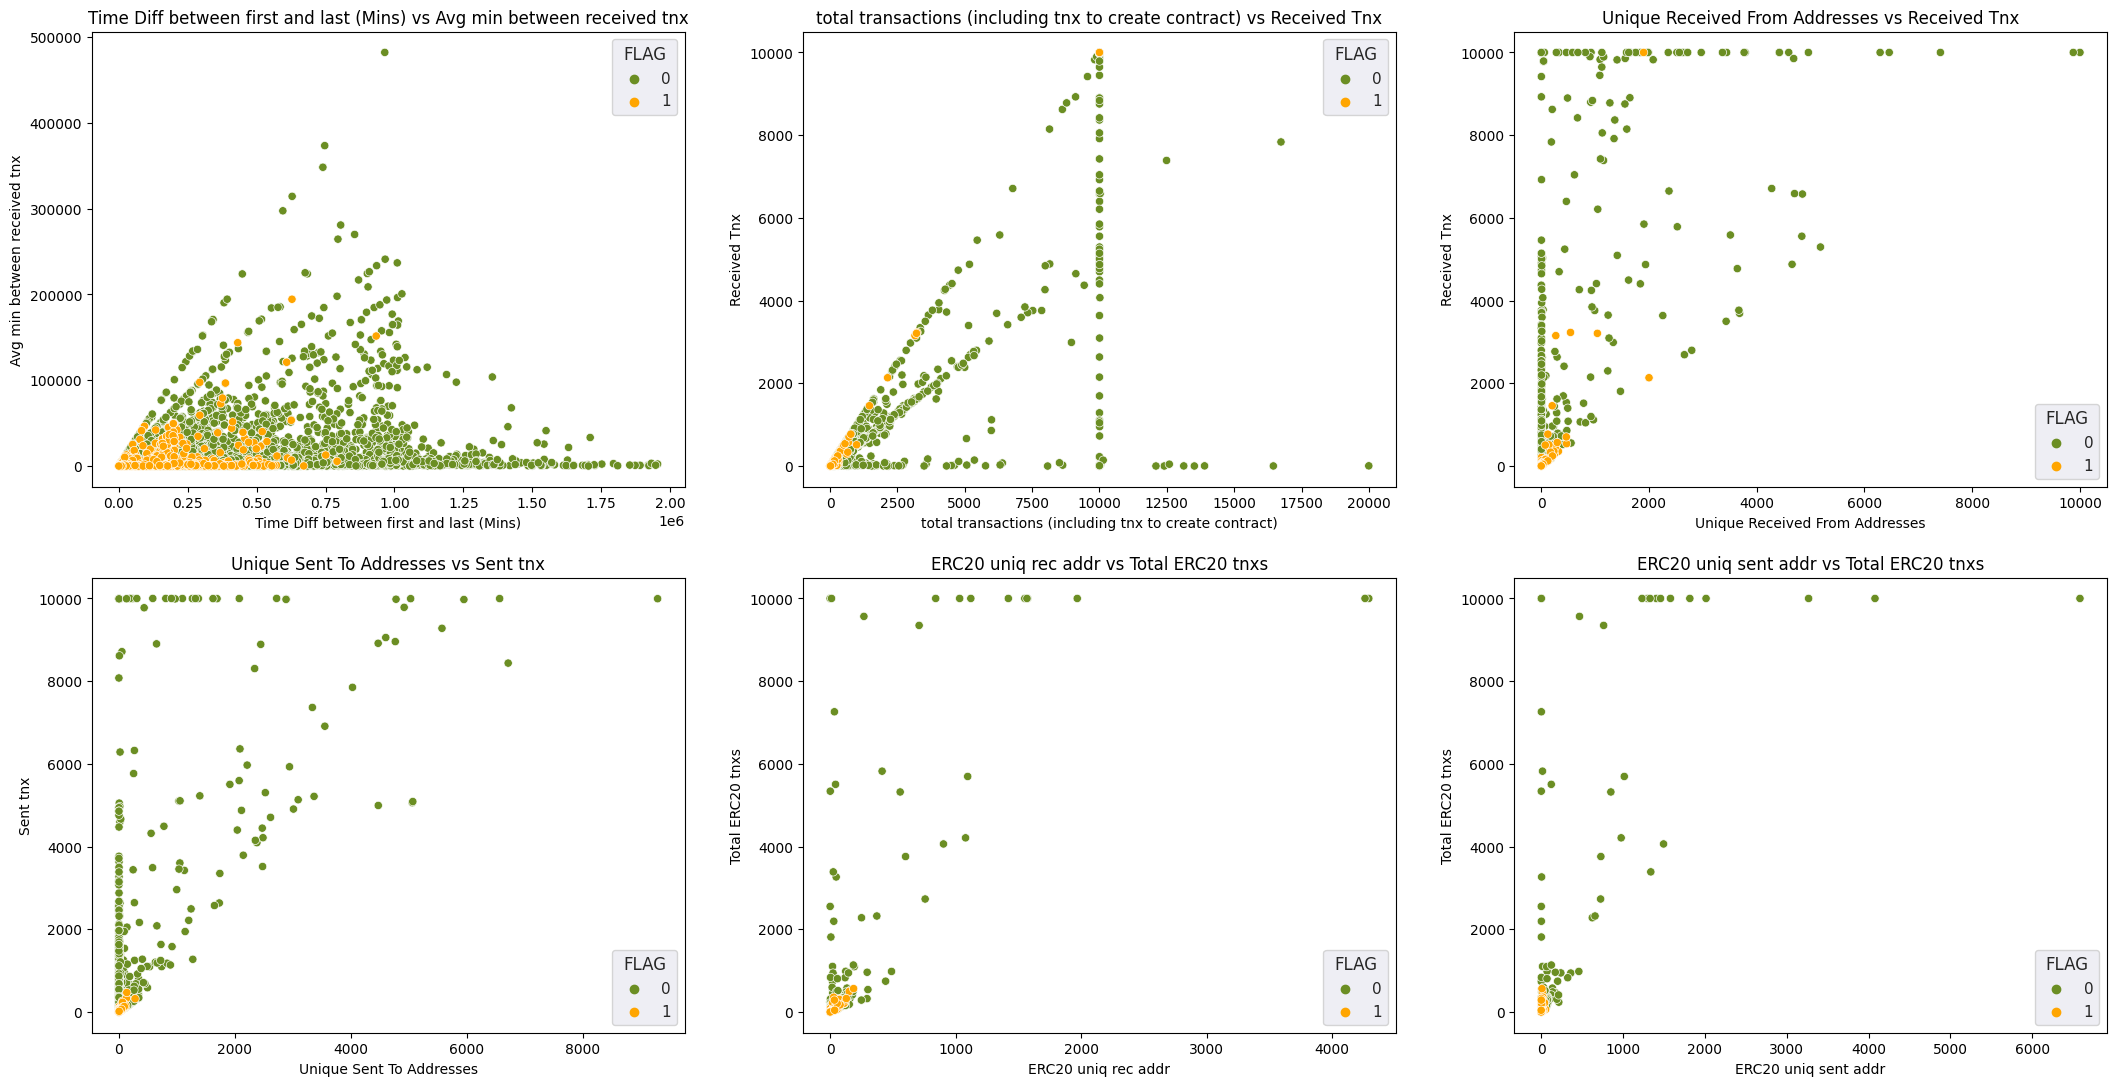

In [ ]:
# Set the figure size
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(26, 13))

# Set the style
sns.set(style='darkgrid')
palette = {0:'olivedrab', 1:'orange'}

# Create a list of the columns to use
columns = [('Time Diff between first and last (Mins)', 'Avg min between received tnx'),
           ('total transactions (including tnx to create contract)', 'Received Tnx'),
           ('Unique Received From Addresses', 'Received Tnx'),
           ('Unique Sent To Addresses', 'Sent tnx'),
           ('ERC20 uniq rec addr', 'Total ERC20 tnxs'),
           ('ERC20 uniq sent addr', 'Total ERC20 tnxs')]

# Loop through the rows and columns
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        # Get the column names for this axis
        x_col, y_col = columns[i*3+j]
        # Create the scatterplot
        sns.scatterplot(data=df, x=x_col, y=y_col, hue='FLAG', hue_order=[0,1], palette=palette, ax=ax)
        # Set the title
        ax.set_title(f'{x_col} vs {y_col}')
        
# Display the plots
plt.show()

In [ ]:
# Dropping correlated data above 0.8

cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
dropped_cols = set()

for feature in upper_tri.columns:
    if any(upper_tri[feature] > 0.8) and feature != 'total transactions (including tnx to create contract)':
        dropped_cols.add(feature)

print('There are %d dropped columns' %len(dropped_cols))
df = df.drop(dropped_cols,axis=1)
df.head()

There are 8 dropped columns


FLAG  Avg min between sent tnx  Avg min between received tnx  \
0     0                    844.26                       1093.71   
1     0                  12709.07                       2958.44   
2     0                 246194.54                       2434.02   
3     0                  10219.60                      15785.09   
4     0                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  Unique Received From Addresses  \
0                            0                              40   
1                            0                               5   
2                            0                              10   
3                            0                               7   
4                            1                               7   

   Unique Sent To Addresses  min value received  ...  Total ERC20 tnxs  \
0                       118            0.000000  ...             265.0   
1                        14            0.000000  ...               8.0   
2                         2            0.113119  ...               8.0   
3                        13            0.000000  ...              14.0   
4                        19            0.000000  ...              42.0   

   ERC20 total Ether received  ERC20 total ether sent  \
0                3.558854e+07            3.560317e+07   
1                4.034283e+02            2.260809e+00   
2                5.215121e+02            0.000000e+00   
3                1.711105e+04            1.141223e+04   
4                1.628297e+05            1.235399e+05   

   ERC20 total Ether sent contract  ERC20 uniq sent addr  ERC20 uniq rec addr  \
0                              0.0                  30.0                 54.0   
1                              0.0                   1.0                  5.0   
2                              0.0                   0.0                  7.0   
3                              0.0                   2.0                 11.0   
4                              0.0                   4.0                 23.0   

   ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  \
0                     0.0                          58.0                0.0   
1                     0.0                           7.0                0.0   
2                     0.0                           8.0                0.0   
3                     0.0                          11.0                0.0   
4                     0.0                          27.0                0.0   

   ERC20 uniq sent token name  
0                        39.0  
1                         1.0  
2                         0.0  
3                         1.0  
4                         6.0  

[5 rows x 31 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9288 entries, 0 to 9840
Data columns (total 31 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   FLAG                                                   9288 non-null   int64  
 1   Avg min between sent tnx                               9288 non-null   float64
 2   Avg min between received tnx                           9288 non-null   float64
 3   Time Diff between first and last (Mins)                9288 non-null   float64
 4   Sent tnx                                               9288 non-null   int64  
 5   Received Tnx                                           9288 non-null   int64  
 6   Number of Created Contracts                            9288 non-null   int64  
 7   Unique Received From Addresses                         9288 non-null   int64  
 8   Unique Sent To Addresses                        

In [ ]:
# Copy dataframe. It will be useful for later analysis
df_feat_clean = copy.deepcopy(df)

###Dataframe after normalization

<Axes: >

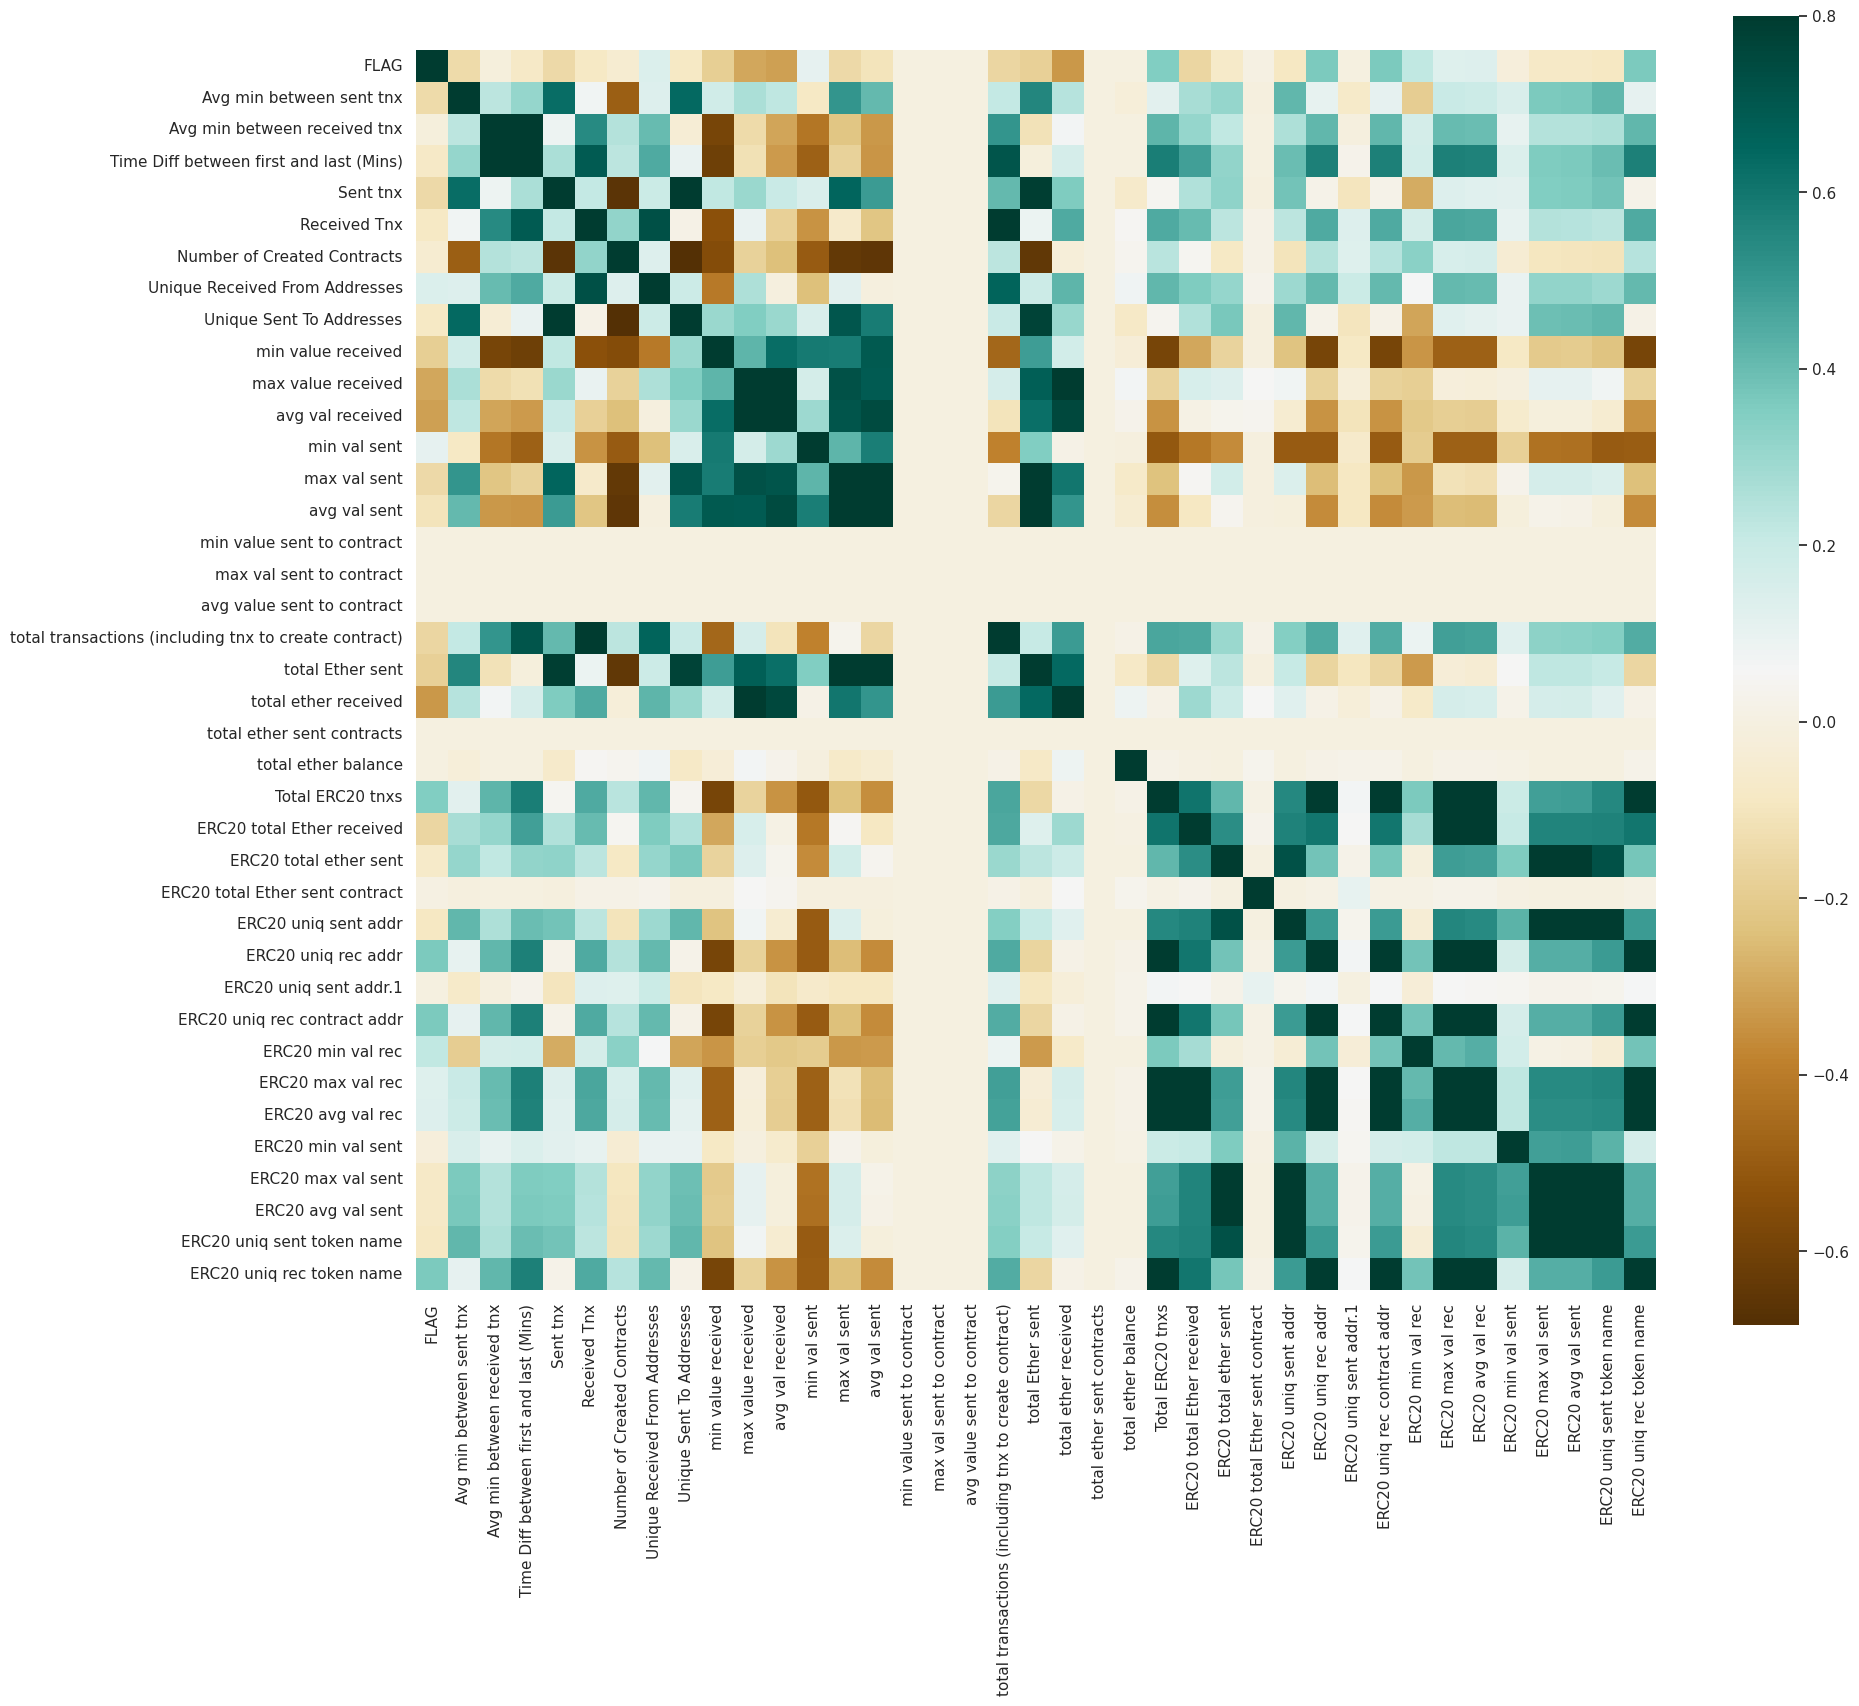

In [ ]:
# Correlation matrix visualization
corrmat = df_normalization.corr()
f, ax = plt.subplots(figsize=(20, 17))
sns.heatmap(corrmat, vmax=.8, square=True, cmap=sns.color_palette('BrBG', as_cmap=True))

In [ ]:
# See the number of correlation
cor_matrix = df_normalization.corr()
cor_matrix.style.background_gradient(sns.light_palette('green', as_cmap=True))

In [ ]:
# Make function to summarise the correlated data above 0.8
def display_high_corr_features(df, threshold=0.8):
    # Compute correlation matrix
    corr_matrix = df_normalization.corr().abs()

    # Select upper triangle of correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation above threshold
    high_corr_features = set()
    for feature in upper_tri.columns:
        correlated_features = upper_tri.index[upper_tri[feature] > threshold].tolist()
        if len(correlated_features) > 0:
            correlated_features.append(feature)
            corr_values = [corr_matrix.loc[feature, f] for f in correlated_features]
            high_corr_features.add((tuple(sorted(correlated_features)), tuple(corr_values)))

    # Print results
    if len(high_corr_features) > 0:
        print('Features with correlation above %.2f:' % threshold)
        for features, corr_values in high_corr_features:
            print('%s: %s' % (str(features), str(corr_values)))
    else:
        print('No features with correlation above %.2f' % threshold)

In [ ]:
display_high_corr_features(df_normalization)

Features with correlation above 0.80:
('ERC20 avg val rec', 'ERC20 max val rec', 'ERC20 total Ether received', 'ERC20 uniq rec addr', 'ERC20 uniq rec contract addr', 'Total ERC20 tnxs'): (0.8708654256346936, 0.8915254699529739, 0.8737423904318522, 0.8759284631921996, 0.9987528302165931, 1.0)
('ERC20 avg val sent', 'ERC20 max val sent', 'ERC20 total ether sent', 'ERC20 uniq sent addr'): (0.8318885414214332, 0.8748490849434306, 0.9738604532015879, 1.0)
('ERC20 avg val sent', 'ERC20 max val sent', 'ERC20 uniq sent addr', 'ERC20 uniq sent token name'): (0.999999100516072, 0.871827475697683, 0.8749147594391292, 1.0)
('ERC20 max val rec', 'ERC20 total Ether received', 'ERC20 uniq rec addr', 'ERC20 uniq rec contract addr', 'Total ERC20 tnxs'): (0.8726684798407086, 0.8955135442208682, 0.8747027465647076, 0.8766078887111535, 1.0)
('ERC20 uniq rec addr', 'Total ERC20 tnxs'): (0.9907182492971603, 1.0)
('avg val sent', 'max val sent', 'total Ether sent'): (0.9592517228005888, 0.8783785759213474, 1

In [ ]:
corr_matrix = df_normalization.corr().abs()
high_corr_var_pairs = (corr_matrix.where(np.triu(corr_matrix > 0.8, k=1))
                      .stack().reset_index().rename(columns={0: 'correlation'}))
high_corr_var_pairs = high_corr_var_pairs[high_corr_var_pairs['correlation'] > 0.8]
high_corr_var_pairs

level_0  \
0   Avg min between received tnx   
1                       Sent tnx   
2                   Received Tnx   
3             max value received   
4             max value received   
5                   max val sent   
6                   max val sent   
7                   avg val sent   
8               Total ERC20 tnxs   
9               Total ERC20 tnxs   
10              Total ERC20 tnxs   
11              Total ERC20 tnxs   
12              Total ERC20 tnxs   
13    ERC20 total Ether received   
14    ERC20 total Ether received   
15        ERC20 total ether sent   
16        ERC20 total ether sent   
17          ERC20 uniq sent addr   
18          ERC20 uniq sent addr   
19          ERC20 uniq sent addr   
20           ERC20 uniq rec addr   
21           ERC20 uniq rec addr   
22           ERC20 uniq rec addr   
23           ERC20 uniq rec addr   
24  ERC20 uniq rec contract addr   
25  ERC20 uniq rec contract addr   
26  ERC20 uniq rec contract addr   
27             ERC20 max val rec   
28             ERC20 max val rec   
29             ERC20 avg val rec   
30            ERC20 max val sent   
31            ERC20 max val sent   
32            ERC20 avg val sent   

                                              level_1  correlation  
0             Time Diff between first and last (Mins)     0.812102  
1                            Unique Sent To Addresses     0.869477  
2   total transactions (including tnx to create co...     0.917007  
3                                    avg val received     0.922999  
4                                total ether received     0.893374  
5                                        avg val sent     0.954365  
6                                    total Ether sent     0.959252  
7                                    total Ether sent     0.878379  
8                                 ERC20 uniq rec addr     0.990718  
9                        ERC20 uniq rec contract addr     0.989246  
10                                  ERC20 max val rec     0.872668  
11                                  ERC20 avg val rec     0.870865  
12                          ERC20 uniq rec token name     0.989212  
13                                  ERC20 max val rec     0.895514  
14                                  ERC20 avg val rec     0.891525  
15                                 ERC20 max val sent     0.836152  
16                                 ERC20 avg val sent     0.831889  
17                                 ERC20 max val sent     0.871739  
18                                 ERC20 avg val sent     0.874849  
19                         ERC20 uniq sent token name     0.999999  
20                       ERC20 uniq rec contract addr     0.998573  
21                                  ERC20 max val rec     0.874703  
22                                  ERC20 avg val rec     0.873742  
23                          ERC20 uniq rec token name     0.998573  
24                                  ERC20 max val rec     0.876608  
25                                  ERC20 avg val rec     0.875928  
26                          ERC20 uniq rec token name     0.999994  
27                                  ERC20 avg val rec     0.998753  
28                          ERC20 uniq rec token name     0.876528  
29                          ERC20 uniq rec token name     0.875867  
30                                 ERC20 avg val sent     0.973860  
31                         ERC20 uniq sent token name     0.871827  
32                         ERC20 uniq sent token name     0.874915

After observing, here are the features that correlate with the threshold value of 0.8.

* Time Diff between first and last (Mins)
* Unique Sent To Addresses
* avg val received
* avg val sent
* total transactions (including tnx to create contract)
* total Ether sent
* total ether received
* ERC20 uniq rec addr
* ERC20 uniq rec contract addr
* ERC20 avg val rec
* ERC20 min val sent
* ERC20 max val sent
* ERC20 avg val sent
* ERC20 uniq sent token name
* ERC20 uniq rec token name

We need to drop these columns, except `ERC20 uniq rec addr` because has the most highly correlated with `FLAG`.

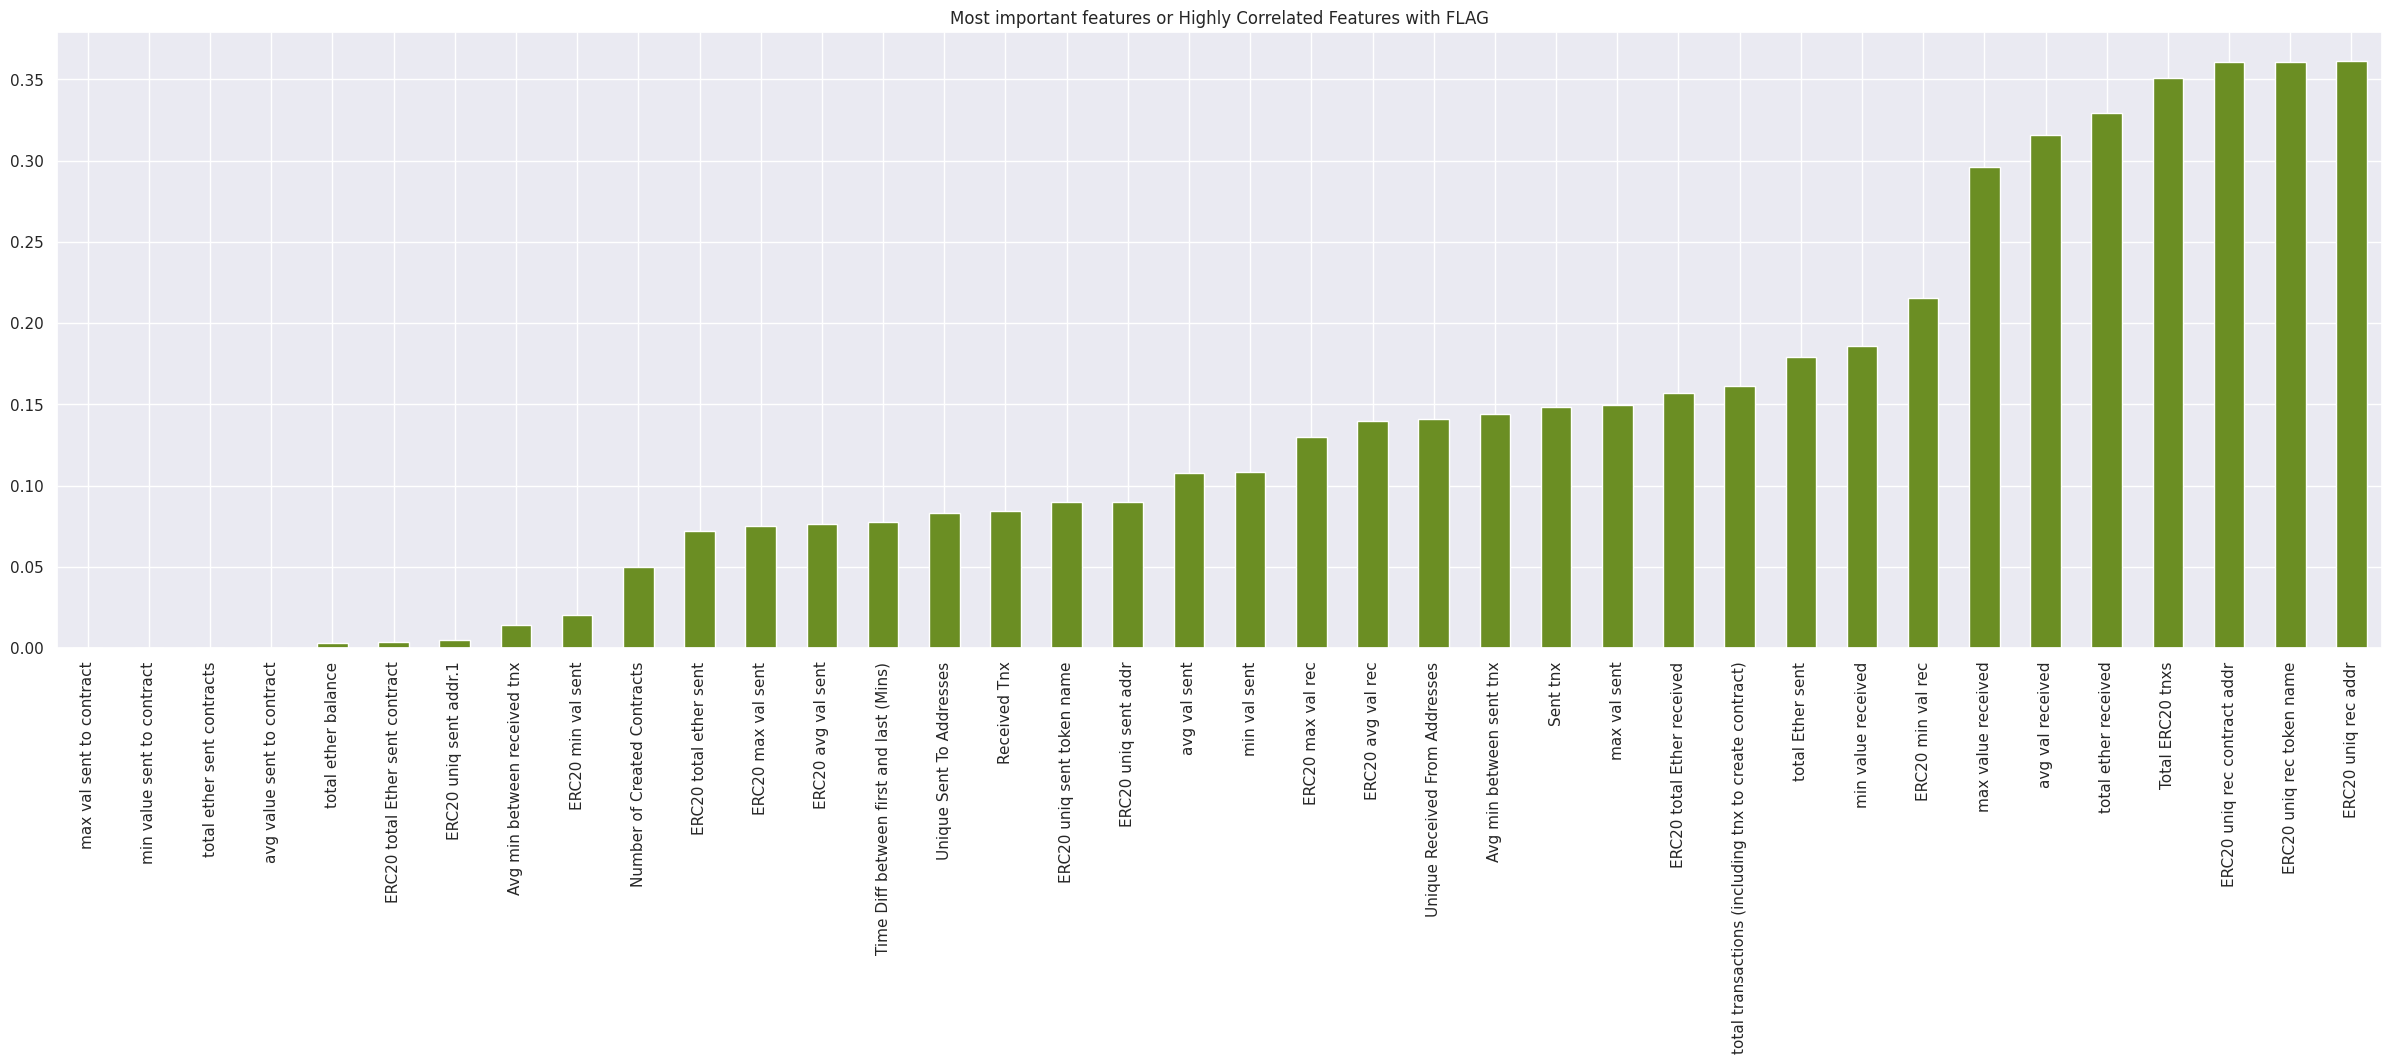

In [ ]:
# Barchart to visualize
plt.figure(figsize=(30,8))
d = df_normalization.corr()['FLAG'][1:].abs().sort_values().plot(kind='bar', color='olivedrab', title='Most important features or Highly Correlated Features with FLAG')
plt.show()

In [ ]:
# Show the high value correlated with FLAG
c = df_normalization.corr()['FLAG'][1:].sort_values()
c

total ether received                                    -0.329628
avg val received                                        -0.316095
max value received                                      -0.296267
min value received                                      -0.185913
total Ether sent                                        -0.179116
total transactions (including tnx to create contract)   -0.161199
ERC20 total Ether received                              -0.156980
max val sent                                            -0.149507
Sent tnx                                                -0.148596
Avg min between sent tnx                                -0.143778
avg val sent                                            -0.107648
ERC20 uniq sent addr                                    -0.089752
ERC20 uniq sent token name                              -0.089676
Received Tnx                                            -0.084527
Unique Sent To Addresses                                -0.083271
Time Diff 

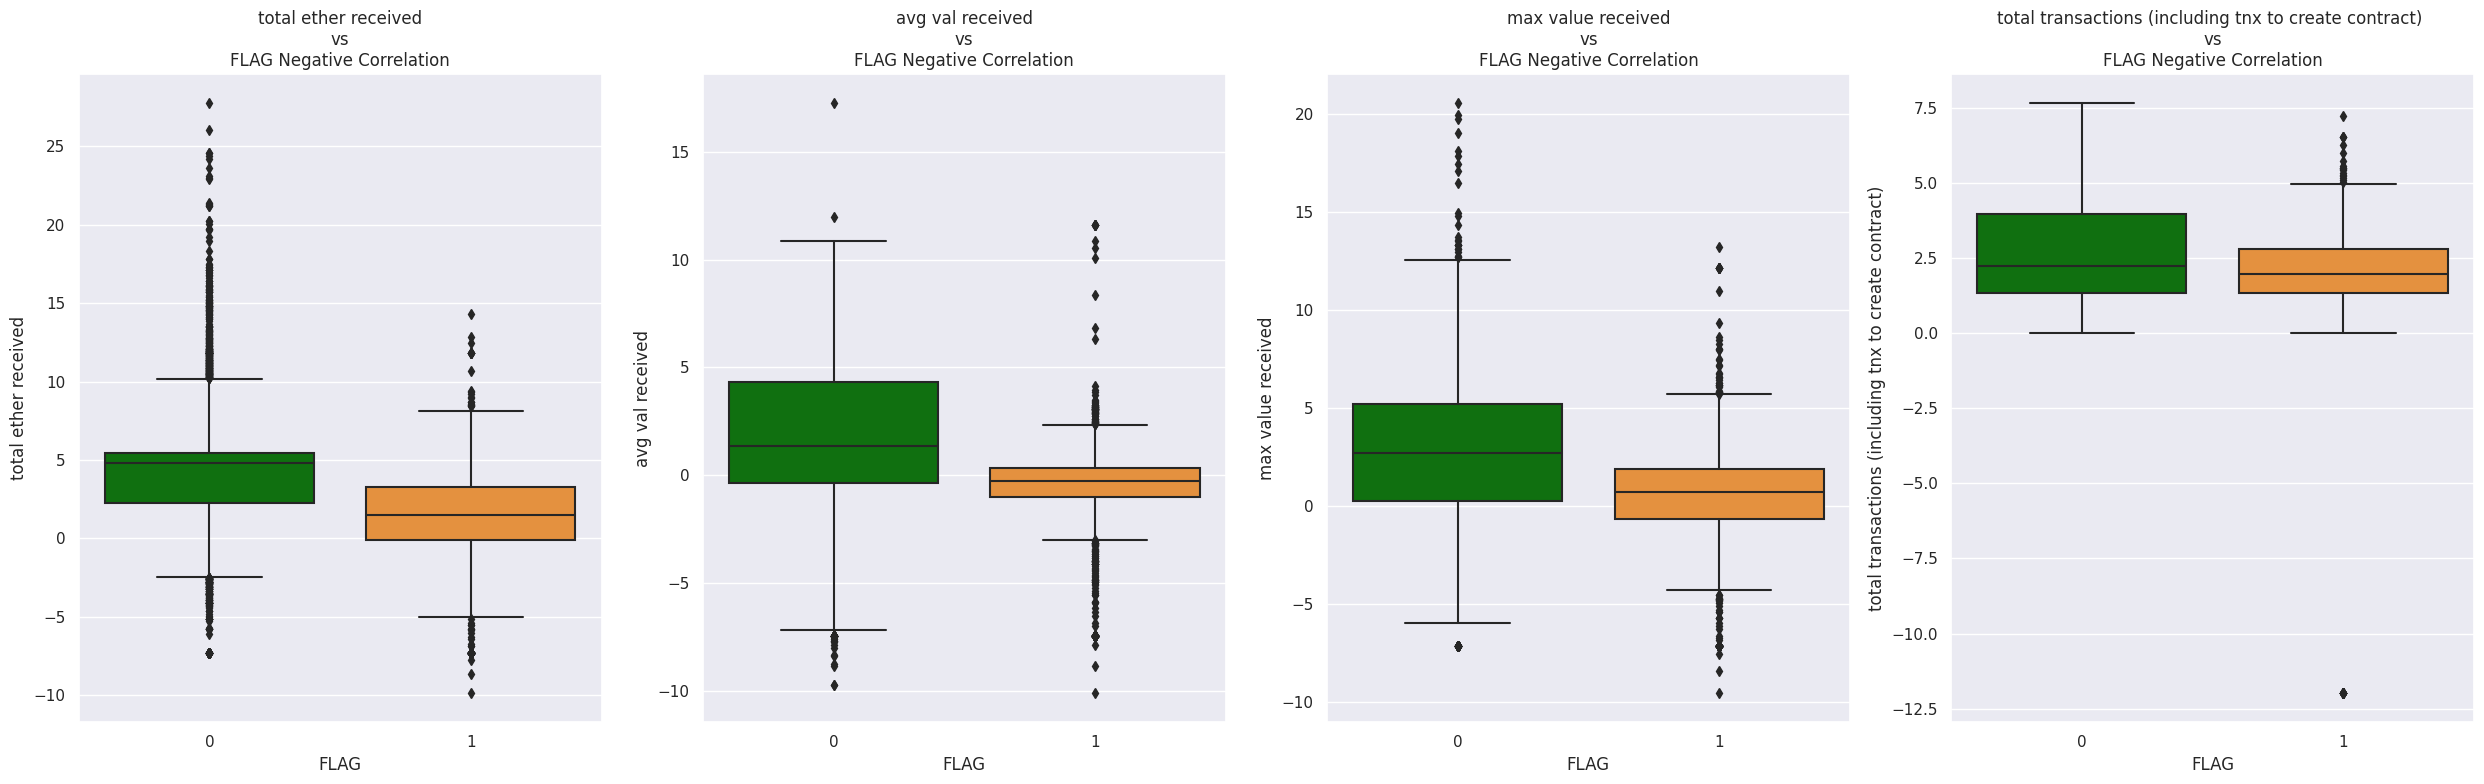

In [ ]:
colors = ['#008000','#ff9124']

f, axes = plt.subplots(ncols=4, figsize=(25,8))

# Negative Correlations with our FLAG (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x='FLAG', y='total ether received', data=df_normalization, palette=colors, ax=axes[0])
axes[0].set_title('total ether received\nvs\nFLAG Negative Correlation')

sns.boxplot(x='FLAG', y='avg val received', data=df_normalization, palette=colors, ax=axes[1])
axes[1].set_title('avg val received\nvs\nFLAG Negative Correlation')

sns.boxplot(x='FLAG', y='max value received', data=df_normalization, palette=colors, ax=axes[2])
axes[2].set_title('max value received\nvs\nFLAG Negative Correlation')

sns.boxplot(x='FLAG', y='total transactions (including tnx to create contract)', data=df_normalization, palette=colors, ax=axes[3])
axes[3].set_title('total transactions (including tnx to create contract) \nvs\nFLAG Negative Correlation')

plt.tight_layout()
plt.show()

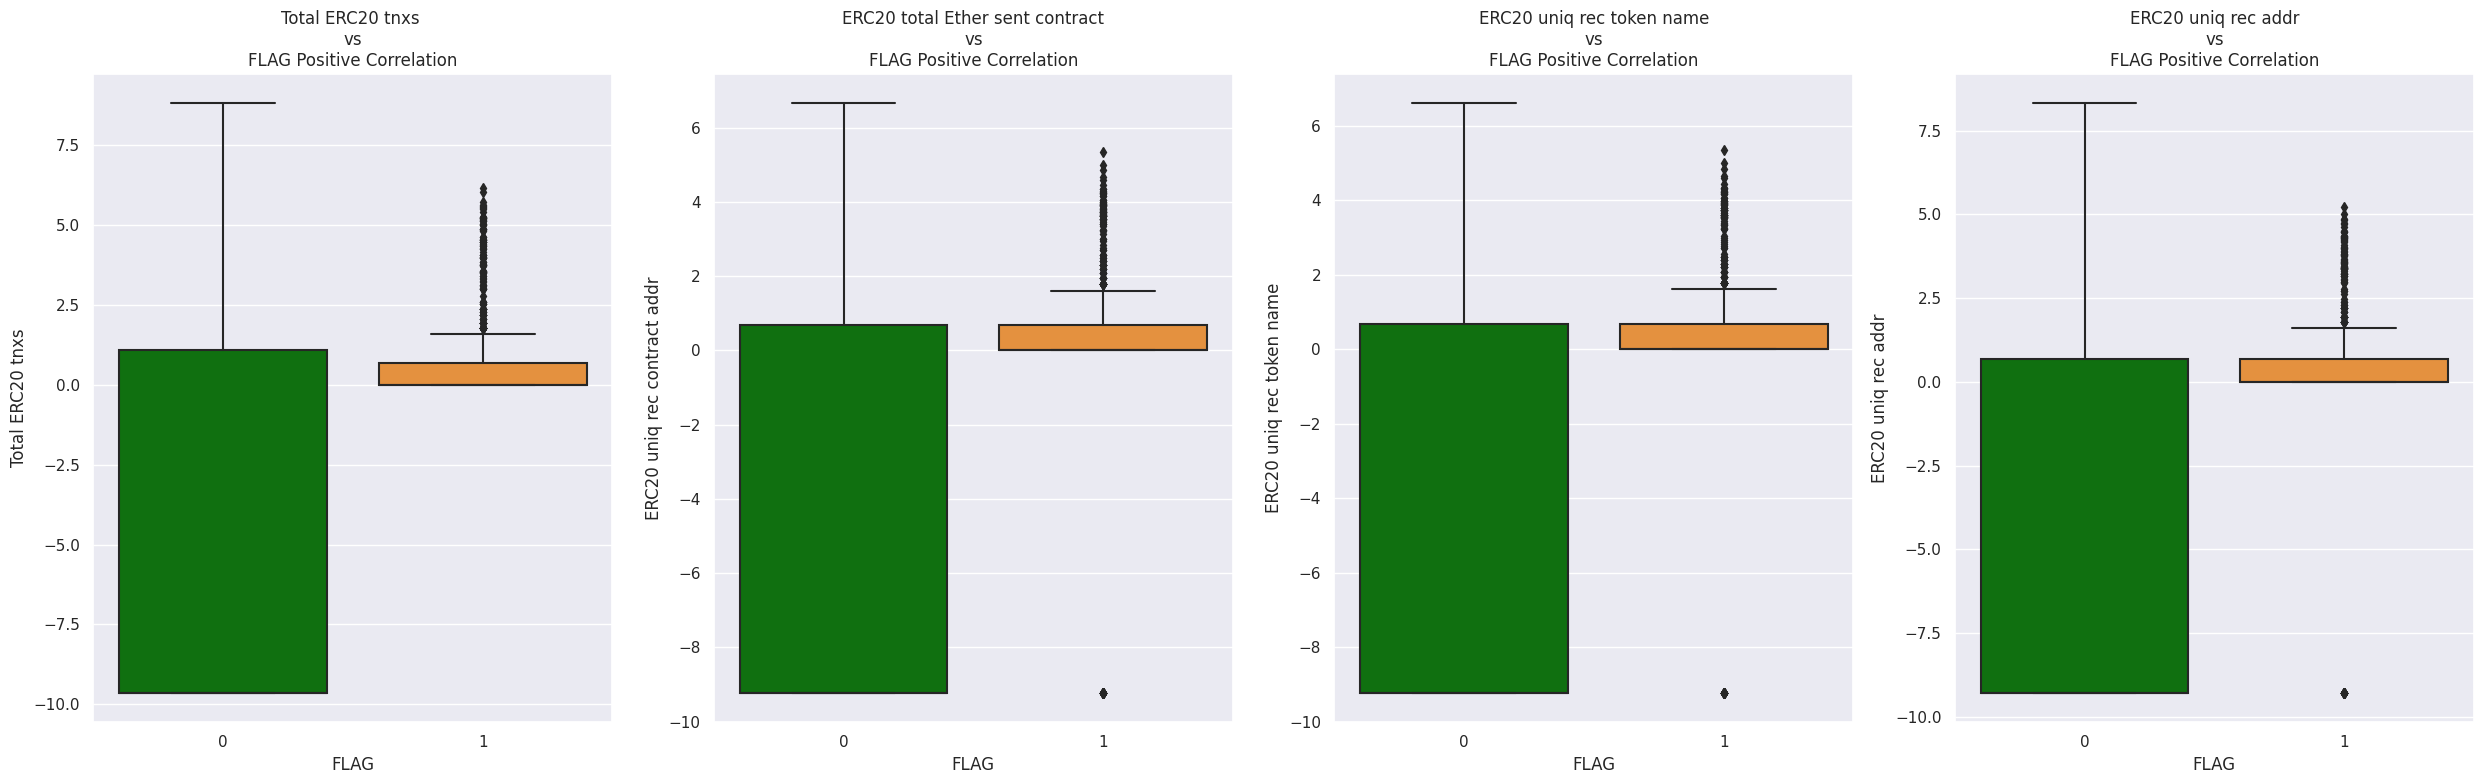

In [ ]:
colors = ['#008000','#ff9124']

f, axes = plt.subplots(ncols=4, figsize=(25,8))

# Positive Correlations with our FLAG (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x='FLAG', y='Total ERC20 tnxs', data=df_normalization, palette=colors, ax=axes[0])
axes[0].set_title('Total ERC20 tnxs \nvs\nFLAG Positive Correlation')

sns.boxplot(x='FLAG', y='ERC20 uniq rec contract addr', data=df_normalization, palette=colors, ax=axes[1])
axes[1].set_title('ERC20 total Ether sent contract\nvs\nFLAG Positive Correlation')

sns.boxplot(x='FLAG', y='ERC20 uniq rec token name', data=df_normalization, palette=colors, ax=axes[2])
axes[2].set_title('ERC20 uniq rec token name\nvs\nFLAG Positive Correlation')

sns.boxplot(x='FLAG', y='ERC20 uniq rec addr', data=df_normalization, palette=colors, ax=axes[3])
axes[3].set_title('ERC20 uniq rec addr\nvs\nFLAG Positive Correlation')

plt.tight_layout()
plt.show()

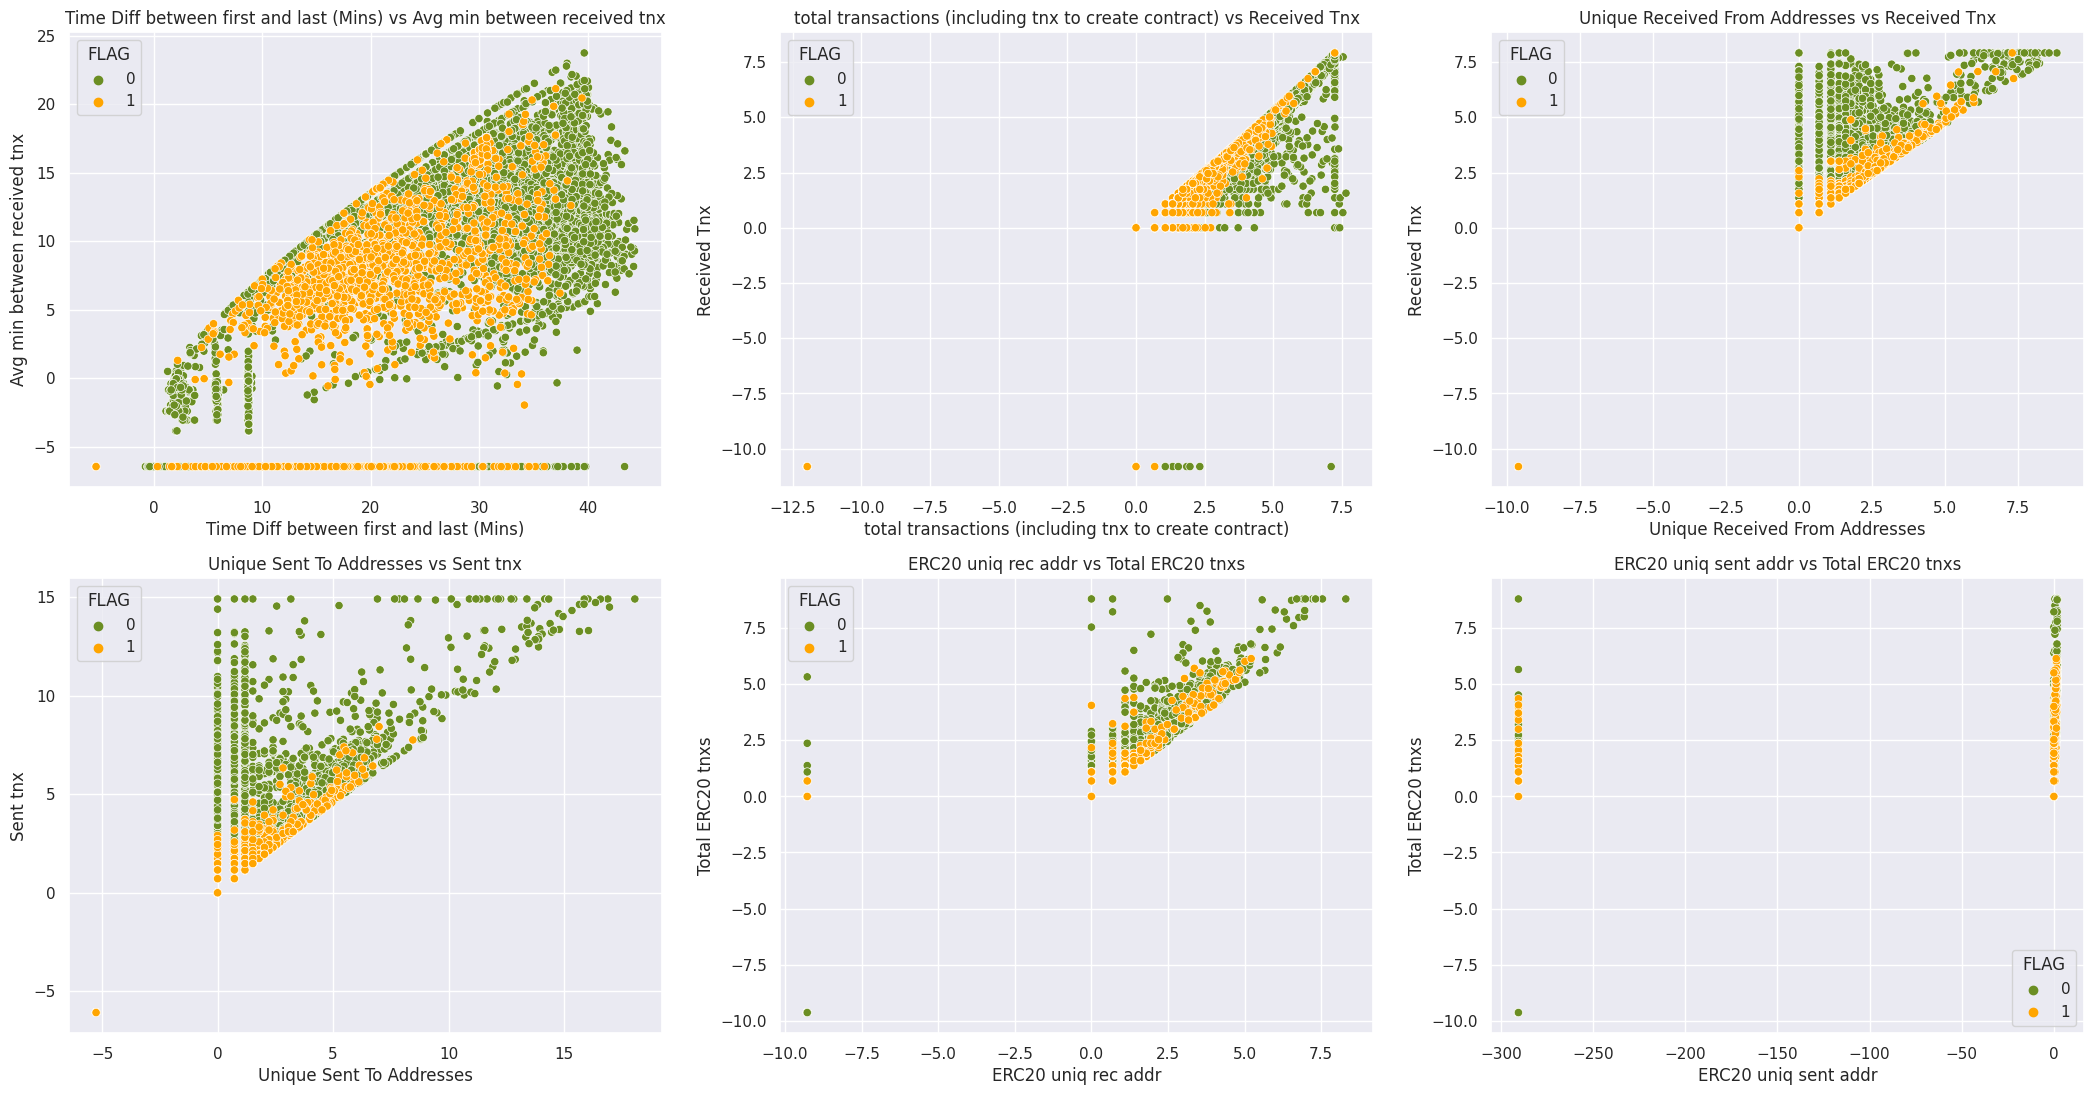

In [ ]:
# set the figure size
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(26, 13))

# set the style
sns.set(style='darkgrid')
palette = {0:'olivedrab', 1:'orange'}

# create a list of the columns to use
columns = [('Time Diff between first and last (Mins)', 'Avg min between received tnx'),
           ('total transactions (including tnx to create contract)', 'Received Tnx'),
           ('Unique Received From Addresses', 'Received Tnx'),
           ('Unique Sent To Addresses', 'Sent tnx'),
           ('ERC20 uniq rec addr', 'Total ERC20 tnxs'),
           ('ERC20 uniq sent addr', 'Total ERC20 tnxs')]

# loop through the rows and columns
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        # get the column names for this axis
        x_col, y_col = columns[i*3+j]
        # create the scatterplot
        sns.scatterplot(data=df_normalization, x=x_col, y=y_col, hue='FLAG', hue_order=[0,1], palette=palette, ax=ax)
        # set the title
        ax.set_title(f'{x_col} vs {y_col}')
        
# display the plots
plt.show()

In [ ]:
# Dropping correlated data above 0.8

cor_matrix = df_normalization.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
dropped_cols = set()

for feature in upper_tri.columns:
    if any(upper_tri[feature] > 0.8) and feature != 'ERC20 uniq rec addr':
        dropped_cols.add(feature)

print('There are %d dropped columns' %len(dropped_cols))
df_normalization = df_normalization.drop(dropped_cols,axis=1)
df_normalization.head()

There are 14 dropped columns


FLAG  Avg min between sent tnx  Avg min between received tnx   Sent tnx  \
0     0                  7.764836                      9.503483   9.223505   
1     0                 11.549569                     11.363912   5.715118   
2     0                 16.198893                     10.986839   0.717087   
3     0                 11.229438                     14.865091   3.780756   
4     0                  3.880549                     14.009496  13.078550   

   Received Tnx  Number of Created Contracts  Unique Received From Addresses  \
0      4.164190                 -1192.221386                        3.628464   
1      2.007926                 -1192.221386                        1.597866   
2      2.215116                 -1192.221386                        2.278948   
3      2.117483                 -1192.221386                        1.929011   
4      2.848811                     0.000000                        1.929011   

   min value received  max value received  min val sent  ...  \
0           -9.239575            4.274912     -8.606606  ...   
1           -9.239575            0.987478     -8.606606  ...   
2           -2.180949            0.153782     -2.929891  ...   
3           -9.239575            7.462344     -8.606606  ...   
4           -9.239575            2.744896     -8.606606  ...   

   total ether balance  Total ERC20 tnxs  ERC20 total Ether received  \
0          -279.224419          5.429996                   18.501959   
1            -0.001819          2.058408                    6.129137   
2             0.000441          2.058408                    6.397244   
3          -854.646303          2.605241                   10.091363   
4           -50.896986          3.670079                   12.524492   

   ERC20 total ether sent  ERC20 total Ether sent contract  \
0               11.461934                        -9.478785   
1                0.798730                        -9.478785   
2              -11.802646                        -9.478785   
3                7.406458                        -9.478785   
4                8.787628                        -9.478785   

   ERC20 uniq sent addr  ERC20 uniq rec addr  ERC20 uniq sent addr.1  \
0              1.534612             3.976726          -3.267596e+141   
1              0.000000             1.607440          -3.267596e+141   
2           -290.465350             1.942990          -3.267596e+141   
3              0.575969             2.393462          -3.267596e+141   
4              0.968844             3.127917          -3.267596e+141   

   ERC20 min val rec  ERC20 min val sent  
0         -54.821291          -55.120637  
1         -54.821291            0.718940  
2         -54.821291          -55.120637  
3         -54.821291            2.424150  
4         -54.821291          -55.120637  

[5 rows x 25 columns]

In [ ]:
df_normalization.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9288 entries, 0 to 9840
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FLAG                             9288 non-null   int64  
 1   Avg min between sent tnx         9288 non-null   float64
 2   Avg min between received tnx     9288 non-null   float64
 3   Sent tnx                         9288 non-null   float64
 4   Received Tnx                     9288 non-null   float64
 5   Number of Created Contracts      9288 non-null   float64
 6   Unique Received From Addresses   9288 non-null   float64
 7   min value received               9288 non-null   float64
 8   max value received               9288 non-null   float64
 9   min val sent                     9288 non-null   float64
 10  max val sent                     9288 non-null   float64
 11  min value sent to contract       9288 non-null   float64
 12  max val sent to cont

#Deep Dive Exploratory Data Analysis

For EDA, we do not take data from normalized data (we use dataframe before normalization) because it is not the true value.

##Target Analysis

In [ ]:
# Copy data for EDA
df_EDA = copy.deepcopy(df_clean_ori)

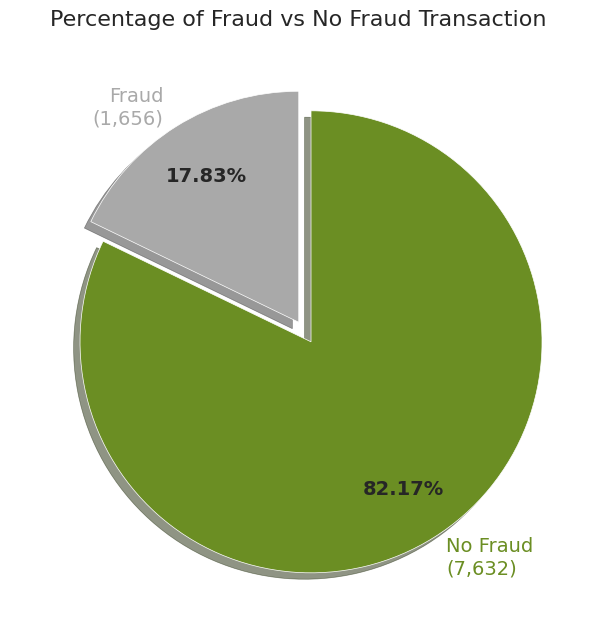

In [ ]:
# Visualize fraud percentage and frequency

labels = 'No Fraud', 'Fraud'
target = df_EDA['FLAG'].value_counts()
color = ['olivedrab', 'darkgrey']

fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15, 7.5))
wedges, texts, autotexts = ax1.pie(target, labels=labels, colors=color,
                                   autopct='%1.2f%%', pctdistance=0.75,
                                   explode=(0.1, 0), startangle=90,
                                   shadow=True, counterclock=False,
                                   wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})

plt.setp(autotexts, size=14, weight='bold')
ax1.set_title('Percentage of Fraud vs No Fraud Transaction', fontsize=16)

# Show the amount of data FLAG
total_data = target.sum()
for i, v in enumerate(target):
    percentage = '{:.1%}'.format(v / total_data)
    texts[i].set_text(f'{labels[i]}\n({v:,})')
    texts[i].set_color(color[i])
    texts[i].set_fontsize(14)

plt.show()

##Features Analysis

In [ ]:
# Create baseline
baseline = pd.crosstab(index=df_EDA['FLAG'], columns='count', normalize='columns')
baseline

col_0     count
FLAG           
0      0.821705
1      0.178295

We will give a **green** background style to values in the table that are greater than the last value in the 'baseline' column of that table. Other values in the table will not receive any style, in this case, no background color will be given.

###Avg min between sent tnx

The minimum average time between sent transactions for an account in minutes is a measure in the blockchain that calculates the average minimum time between two transactions sent by a particular sending address. The smaller the Avg min between sent tnx value, the more often the user commits transactions and the quicker the user makes a new transaction after the previous one. We category it as below:

> [0] 0 minutes

> [1] Within 12 hours

> [2] Within a day

> [3] More than a day

In [ ]:
def avg_time_sent(row):
  if row['Avg min between sent tnx'] == 0:
    return 0 #0 mins
  else:
    if row['Avg min between sent tnx'] > 0 and row['Avg min between sent tnx'] <= 720:
      return 1 #Within 12 hours
    else:
      if row['Avg min between sent tnx'] > 720 and row['Avg min between sent tnx'] <= 1440:
        return 2 #Within a day
      else:
        return 3 #More than a day

df_EDA['Avg min between sent tnx_func'] = df_EDA.apply(lambda row: avg_time_sent(row), axis=1)
df_EDA['Avg min between sent tnx_func'].value_counts()

1    3929
0    2987
3    2089
2     283
Name: Avg min between sent tnx_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['Avg min between sent tnx_func'], margins='True', margins_name='Total')

Avg min between sent tnx_func     0     1    2     3  Total
FLAG                                                       
0                              2061  3693  198  1680   7632
1                               926   236   85   409   1656
Total                          2987  3929  283  2089   9288

####Comparison of FLAG based on Avg min between sent tnx

In [ ]:
AVG_MIN_SENT = pd.crosstab(df_EDA.FLAG, [df_EDA['Avg min between sent tnx_func']], normalize='columns')
AVG_MIN_SENT['baseline'] = baseline
AVG_MIN_SENT = AVG_MIN_SENT.iloc[:2,]
AVG_MIN_SENT.style.apply(lambda x: ['background: green' if v > x.iloc[len(AVG_MIN_SENT.columns)-1] else '' for v in x], axis=1)

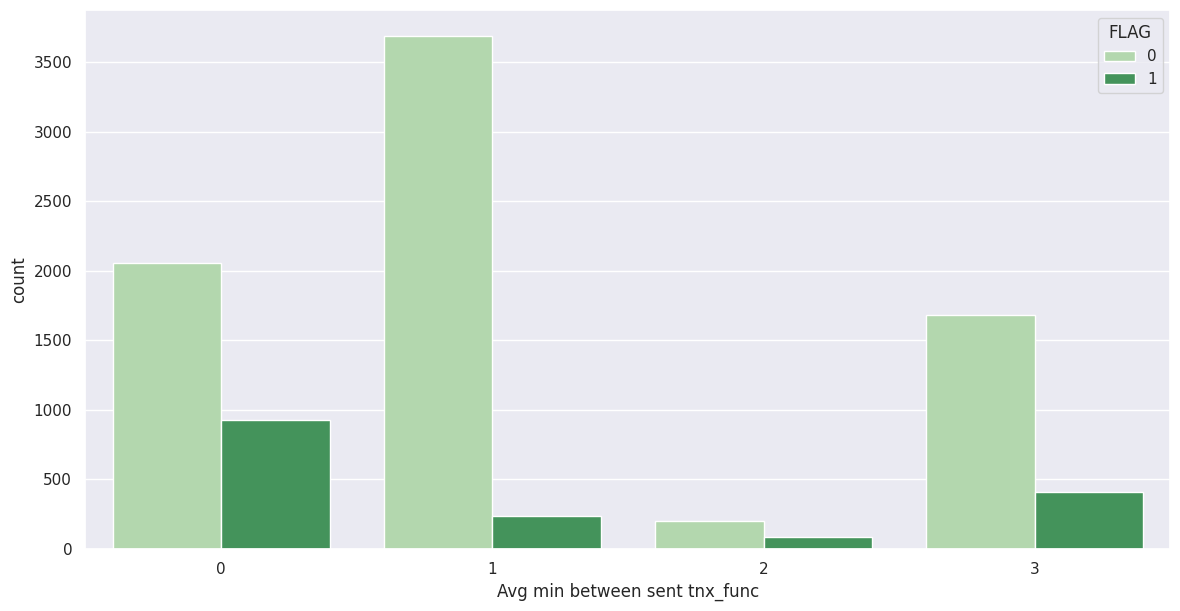

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='Avg min between sent tnx_func', hue='FLAG', palette='Greens')
plt.show()

###Avg min between received tnx

Refers to the average time (in minutes) between each received transaction in a given dataset. We category it as below:

> [0] 0 minutes

> [1] Within 12 hours

> [2] Within a day

> [3] More than a day

In [ ]:
def avg_time_received(row):
  if row['Avg min between received tnx'] == 0:
    return 0 #0 mins
  elif row['Avg min between received tnx'] > 0 and row['Avg min between received tnx'] <= 720:
    return 1 #Within 12 hours
  elif row['Avg min between received tnx'] > 720 and row['Avg min between received tnx'] <= 1440:
      return 2 #Within a day
  else:
    return 3 #More than a day

df_EDA['Avg min between received tnx_func'] = df_EDA.apply(avg_time_received, axis=1)
df_EDA['Avg min between received tnx_func'].value_counts()

3    4168
0    2292
1    2288
2     540
Name: Avg min between received tnx_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['Avg min between received tnx_func'], margins='True', margins_name='Total')

Avg min between received tnx_func     0     1    2     3  Total
FLAG                                                           
0                                  1975  1489  376  3792   7632
1                                   317   799  164   376   1656
Total                              2292  2288  540  4168   9288

####Comparison of FLAG based on Avg min between received tnx


In [ ]:
AVG_MIN_REC = pd.crosstab(df_EDA.FLAG, [df_EDA['Avg min between received tnx_func']], normalize='columns')
AVG_MIN_REC['baseline'] = baseline
AVG_MIN_REC = AVG_MIN_REC.iloc[:2,]
AVG_MIN_REC.style.apply(lambda x: ['background: green' if v > x.iloc[len(AVG_MIN_REC.columns)-1] else '' for v in x], axis=1)

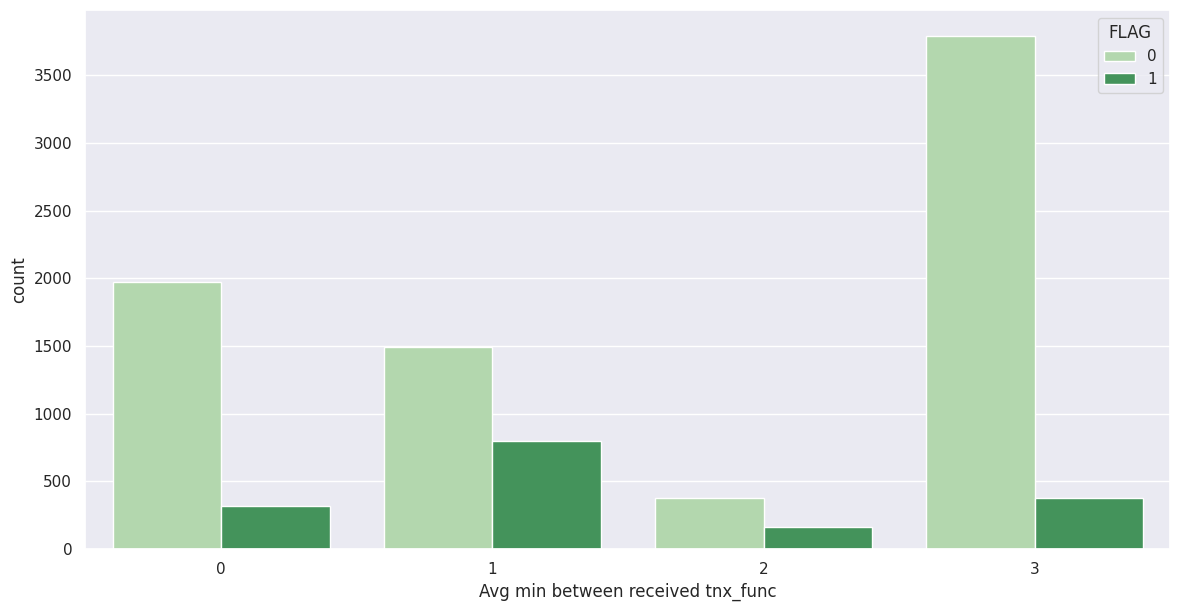

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='Avg min between received tnx_func', hue='FLAG', palette='Greens')
plt.show()

###Time Diff between first and last (Mins)

Refers to the difference in time (in minutes) between the first and last transactions in a given dataset. We category it as below:

> [0] 0 minutes

> [1] Within 6 months

> [2] Within a year

> [3] More than a year

In [ ]:
def time_diff(row):
  if row['Time Diff between first and last (Mins)'] == 0:
    return 0 #0 min
  elif row['Time Diff between first and last (Mins)'] > 0 and row['Time Diff between first and last (Mins)'] <= 259200:
    return 1 #Within 6 months
  elif row['Time Diff between first and last (Mins)'] > 259200 and row['Time Diff between first and last (Mins)'] <= 525600:
    return 2 #Within 1 year
  else:
    return 3 #More than a year

df_EDA['Time Diff between first and last (Mins)_func'] = df_EDA.apply(time_diff, axis=1)
df_EDA['Time Diff between first and last (Mins)_func'].value_counts()

1    6379
3    1521
2    1286
0     102
Name: Time Diff between first and last (Mins)_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['Time Diff between first and last (Mins)_func'], margins='True', margins_name='Total')

Time Diff between first and last (Mins)_func    0     1     2     3  Total
FLAG                                                                      
0                                              42  4914  1172  1504   7632
1                                              60  1465   114    17   1656
Total                                         102  6379  1286  1521   9288

####Comparison of FLAG based on Time Diff between first and last (Mins)

In [ ]:
TIME_DIFF = pd.crosstab(df_EDA.FLAG, [df_EDA['Time Diff between first and last (Mins)_func']], normalize='columns')
TIME_DIFF['baseline'] = baseline
TIME_DIFF = TIME_DIFF.iloc[:2,]
TIME_DIFF.style.apply(lambda x: ['background: green' if v > x.iloc[len(TIME_DIFF.columns)-1] else '' for v in x], axis=1)

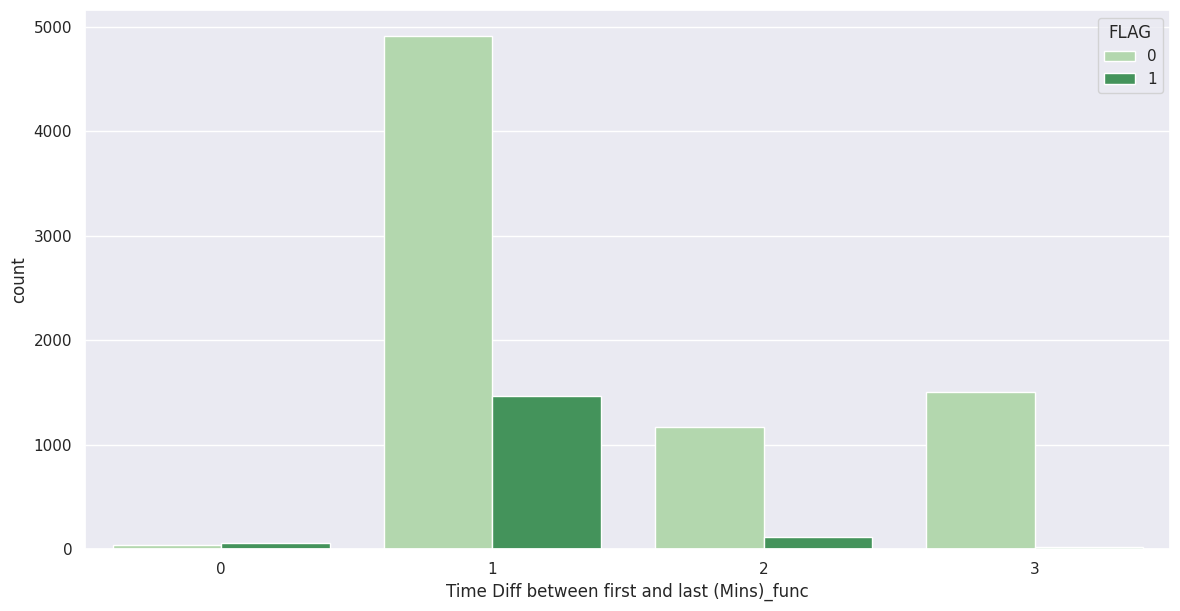

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='Time Diff between first and last (Mins)_func', hue='FLAG', palette='Greens')
plt.show()

###Sent tnx

Total number of sent normal transactions. We category it as below:

> [0] No transaction

> [1] Small amount ETH transaction

> [2] Medium amount ETH transaction

> [3] Large amount ETH transaction

In [ ]:
df_EDA['Sent tnx'].describe()

count     9288.000000
mean       122.750538
std        778.889279
min          0.000000
25%          1.000000
50%          3.000000
75%         12.000000
max      10000.000000
Name: Sent tnx, dtype: float64

In [ ]:
def sent_transaction(row):
  if row['Sent tnx'] == 0:
    return 0 #No ETH transaction
  elif row['Sent tnx'] > 0 and row['Sent tnx'] <= 3:
    return 1 #Small amount
  elif row['Sent tnx'] > 3 and row['Sent tnx'] <= 12:
    return 2 #Medium amount
  else:
    return 3 #Large amount

df_EDA['Sent tnx_func'] = df_EDA.apply(sent_transaction, axis=1)
df_EDA['Sent tnx_func'].value_counts()

1    4042
3    2293
0    1483
2    1470
Name: Sent tnx_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['Sent tnx_func'], margins='True', margins_name='Total')

Sent tnx_func     0     1     2     3  Total
FLAG                                        
0              1185  3083  1217  2147   7632
1               298   959   253   146   1656
Total          1483  4042  1470  2293   9288

####Comparison of FLAG based on Sent tnx

In [ ]:
SENT_TNX = pd.crosstab(df_EDA.FLAG, [df_EDA['Sent tnx_func']], normalize='columns')
SENT_TNX['baseline'] = baseline
SENT_TNX = SENT_TNX.iloc[:2,]
SENT_TNX.style.apply(lambda x: ['background: green' if v > x.iloc[len(SENT_TNX.columns)-1] else '' for v in x], axis=1)

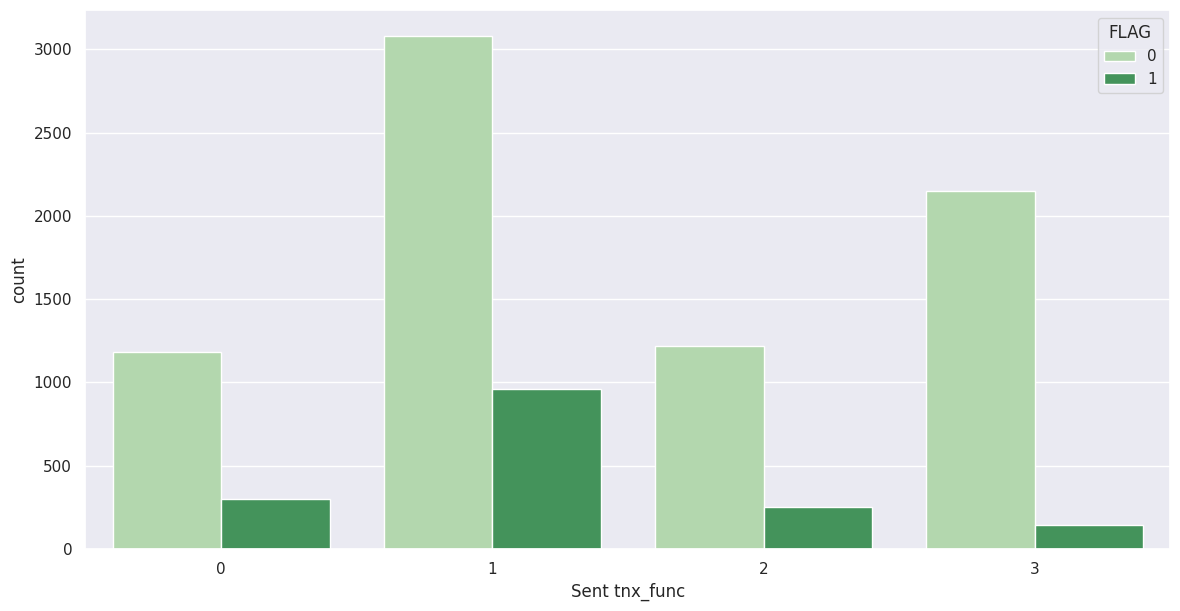

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='Sent tnx_func', hue='FLAG', palette='Greens')
plt.show()

###Received Tnx

Total number of received normal transactions. We category it as below:

 > [0] No transaction

> [1] Small amount ETH transaction

> [2] Medium amount ETH transaction

> [3] Large amount ETH transaction

In [ ]:
df_EDA['Received Tnx'].describe()

count     9288.000000
mean       173.358635
std        967.577224
min          0.000000
25%          2.000000
50%          5.000000
75%         29.000000
max      10000.000000
Name: Received Tnx, dtype: float64

In [ ]:
def received_transaction(row):
  if row['Received Tnx'] == 0:
    return 0 #No ETH transaction
  elif row['Received Tnx'] > 0 and row['Received Tnx'] <= 5:
    return 1 #Small amount
  elif row['Received Tnx'] > 5 and row['Received Tnx'] <= 29:
    return 2 #Medium amount
  else:
    return 3 #Large amount

df_EDA['Received Tnx_func'] = df_EDA.apply(received_transaction, axis=1)
df_EDA['Received Tnx_func'].value_counts()

1    4686
3    2320
2    2253
0      29
Name: Received Tnx_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['Received Tnx_func'], margins='True', margins_name='Total')

Received Tnx_func   0     1     2     3  Total
FLAG                                          
0                  10  3906  1592  2124   7632
1                  19   780   661   196   1656
Total              29  4686  2253  2320   9288

####Comparison of FLAG based on Received tnx

In [ ]:
RECEIVED_TNX = pd.crosstab(df_EDA.FLAG, [df_EDA['Received Tnx_func']], normalize='columns')
RECEIVED_TNX['baseline'] = baseline
RECEIVED_TNX = RECEIVED_TNX.iloc[:2,]
RECEIVED_TNX.style.apply(lambda x: ['background: green' if v > x.iloc[len(RECEIVED_TNX.columns)-1] else '' for v in x], axis=1)

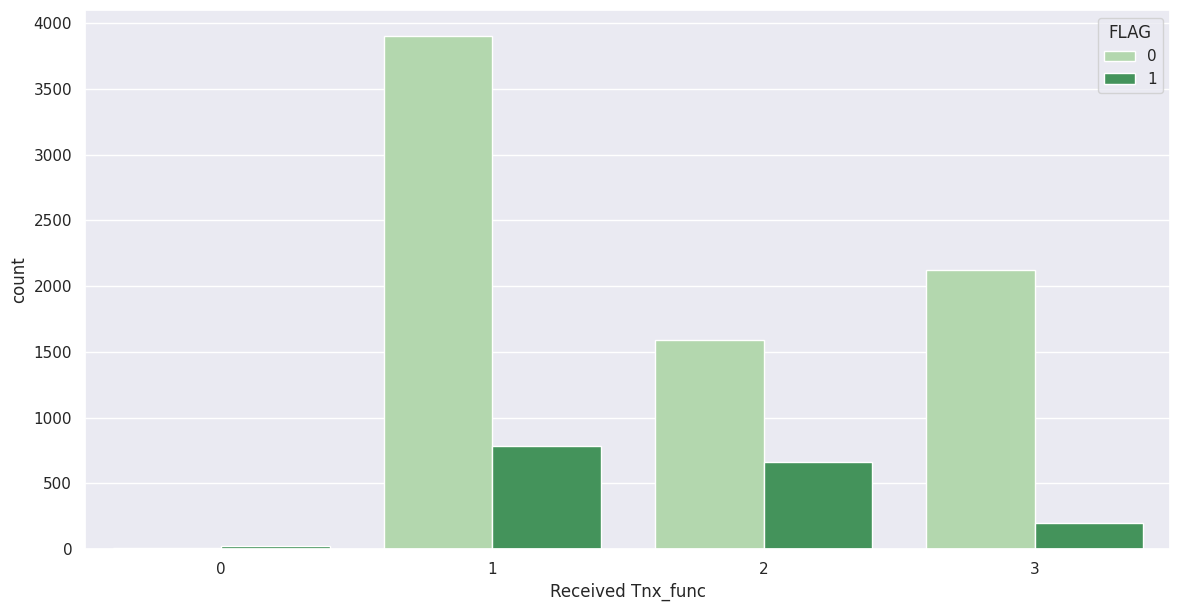

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='Received Tnx_func', hue='FLAG', palette='Greens')
plt.show()

###Unique Received From Addresses

Total Unique addresses from which account received transactions.  We category it as below:

> [0] No unique address

> [1] Few unique addresses

> [2] A considerable number of unique addresses

> [3] A large number of unique addresses

In [ ]:
df_EDA['Unique Received From Addresses'].describe()

count    9288.000000
mean       32.152993
std       307.289704
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      9999.000000
Name: Unique Received From Addresses, dtype: float64

In [ ]:
def unique_received(row):
  if row['Unique Received From Addresses'] == 0:
    return 0 #No unique address
  elif row['Unique Received From Addresses'] > 0 and row['Unique Received From Addresses'] <= 2:
    return 1 #Few unique addresses
  elif row['Unique Received From Addresses'] > 2 and row['Unique Received From Addresses'] <= 5:
    return 2 #A considerable number of unique addresses
  else:
    return 3 #A large number of unique addresses

df_EDA['Unique Received From Addresses_func'] = df_EDA.apply(unique_received, axis=1)
df_EDA['Unique Received From Addresses_func'].value_counts()

1    4675
3    2310
2    2274
0      29
Name: Unique Received From Addresses_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['Unique Received From Addresses_func'], margins='True', margins_name='Total')

Unique Received From Addresses_func   0     1     2     3  Total
FLAG                                                            
0                                    10  4180  1888  1554   7632
1                                    19   495   386   756   1656
Total                                29  4675  2274  2310   9288

####Comparison of FLAG based on Unique Received From Addresses

In [ ]:
UNIQ_REC_ADDRESS = pd.crosstab(df_EDA.FLAG, [df_EDA['Unique Received From Addresses_func']], normalize='columns')
UNIQ_REC_ADDRESS['baseline'] = baseline
UNIQ_REC_ADDRESS = UNIQ_REC_ADDRESS.iloc[:2,]
UNIQ_REC_ADDRESS.style.apply(lambda x: ['background: green' if v > x.iloc[len(UNIQ_REC_ADDRESS.columns)-1] else '' for v in x], axis=1)

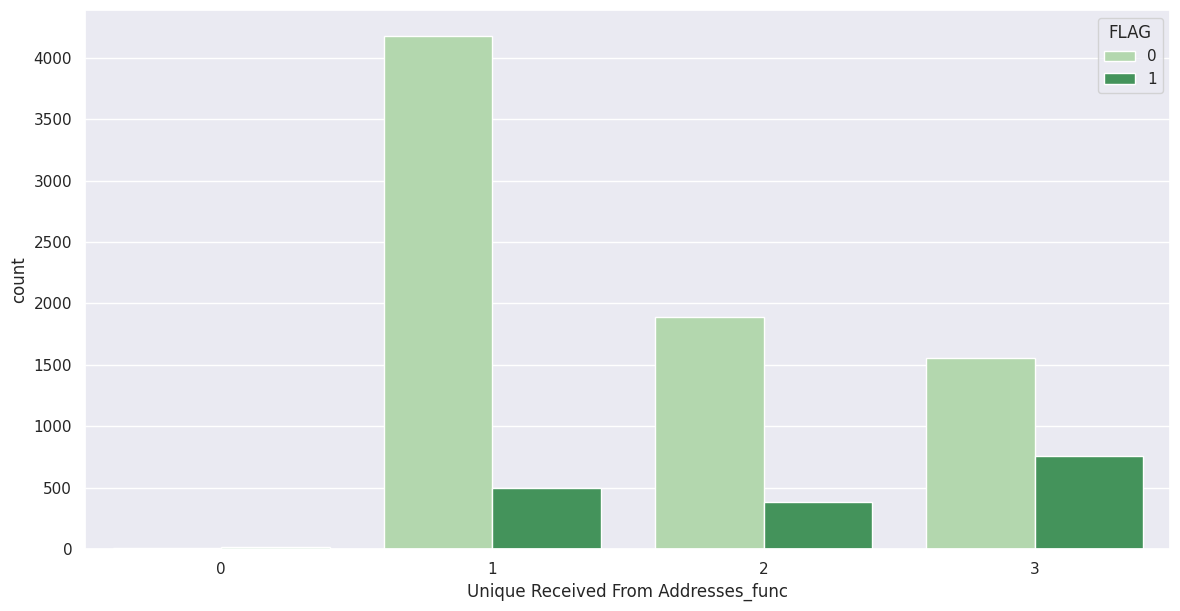

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='Unique Received From Addresses_func', hue='FLAG', palette='Greens')
plt.show()

###Unique Sent To Addresses

Total Unique addresses from which account sent transactions. We category it as below:

> [0] No unique address

> [1] Few unique addresses

> [2] A considerable number of unique addresses

> [3] A large number of unique addresses

In [ ]:
df_EDA['Unique Sent To Addresses'].describe()

count    9288.000000
mean       27.356374
std       271.482666
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max      9287.000000
Name: Unique Sent To Addresses, dtype: float64

In [ ]:
def unique_sent(row):
  if row['Unique Sent To Addresses'] == 0:
    return 0 #No unique address
  elif row['Unique Sent To Addresses'] > 0 and row['Unique Sent To Addresses'] <= 2:
    return 1 #Few unique address
  elif row['Unique Sent To Addresses'] > 2 and row['Unique Sent To Addresses'] <= 3:
    return 2 #A considerable number of unique address
  else:
    return 3 #A large number of unique addresses

df_EDA['Unique Sent To Addresses_func'] = df_EDA.apply(unique_sent, axis=1)
df_EDA['Unique Sent To Addresses_func'].value_counts()

1    4228
3    2170
0    1483
2    1407
Name: Unique Sent To Addresses_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['Unique Sent To Addresses_func'], margins='True', margins_name='Total')

Unique Sent To Addresses_func     0     1     2     3  Total
FLAG                                                        
0                              1185  3287  1305  1855   7632
1                               298   941   102   315   1656
Total                          1483  4228  1407  2170   9288

####Comparison of FLAG based on Unique Sent To Addresses

In [ ]:
UNIQ_SENT_ADDRESS = pd.crosstab(df_EDA.FLAG, [df_EDA['Unique Sent To Addresses_func']], normalize='columns')
UNIQ_SENT_ADDRESS['baseline'] = baseline
UNIQ_SENT_ADDRESS = UNIQ_SENT_ADDRESS.iloc[:2,]
UNIQ_SENT_ADDRESS.style.apply(lambda x: ['background: green' if v > x.iloc[len(UNIQ_SENT_ADDRESS.columns)-1] else '' for v in x], axis=1)

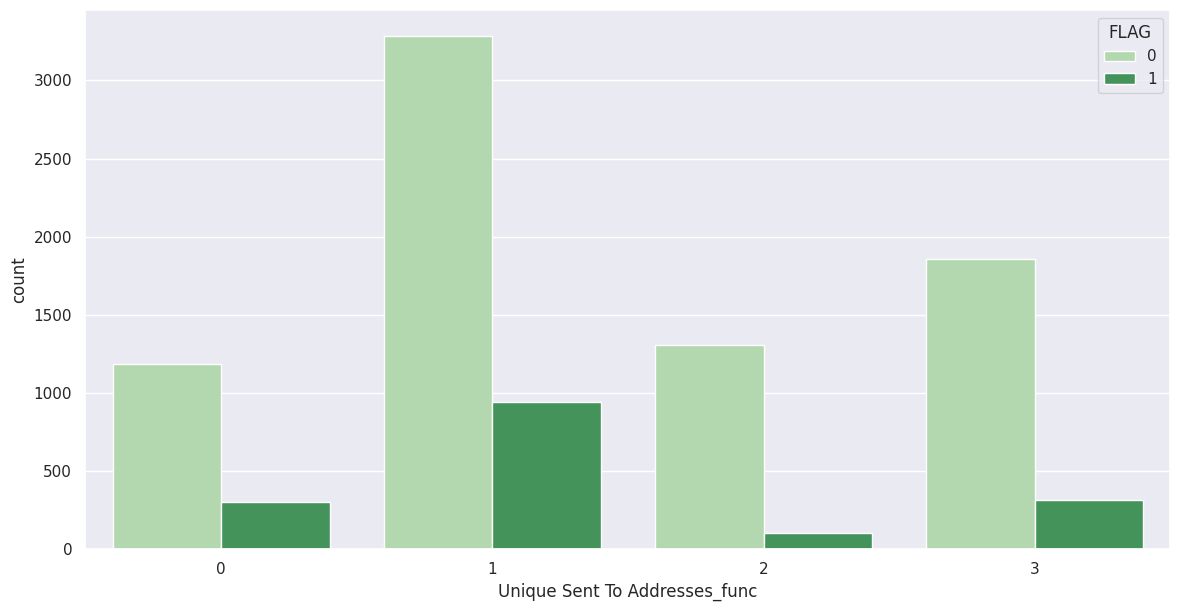

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='Unique Sent To Addresses_func', hue='FLAG', palette='Greens')
plt.show()

###min value received

Minimum value in Ether ever received. We category it as below:

> [0] No ETH received

> [1] Several amounts ETH received

> [2] Many amounts ETH received

In [ ]:
df_EDA['min value received'].describe()

count     9288.000000
mean        46.295791
std        335.226141
min          0.000000
25%          0.004466
50%          0.100000
75%          2.650000
max      10000.000000
Name: min value received, dtype: float64

In [ ]:
def min_val_rec(row):
  if row['min value received'] == 0:
    return 0 #No ETH received
  elif row['min value received'] > 0 and row['min value received'] <= 2:
     return 1 #Several amounts ETH received
  else:
    return 2 #Many amounts ETH received

df_EDA['min value received_func'] = df_EDA.apply(min_val_rec, axis=1)
df_EDA['min value received_func'].value_counts()

1    5318
2    2424
0    1546
Name: min value received_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['min value received_func'], margins='True', margins_name='Total')

min value received_func     0     1     2  Total
FLAG                                            
0                        1254  4003  2375   7632
1                         292  1315    49   1656
Total                    1546  5318  2424   9288

####Comparison of FLAG based on min value received


In [ ]:
MIN_VAL_REC = pd.crosstab(df_EDA.FLAG, [df_EDA['min value received_func']], normalize='columns')
MIN_VAL_REC['baseline'] = baseline
MIN_VAL_REC = MIN_VAL_REC.iloc[:2,]
MIN_VAL_REC.style.apply(lambda x: ['background: green' if v > x.iloc[len(MIN_VAL_REC.columns)-1] else '' for v in x], axis=1)

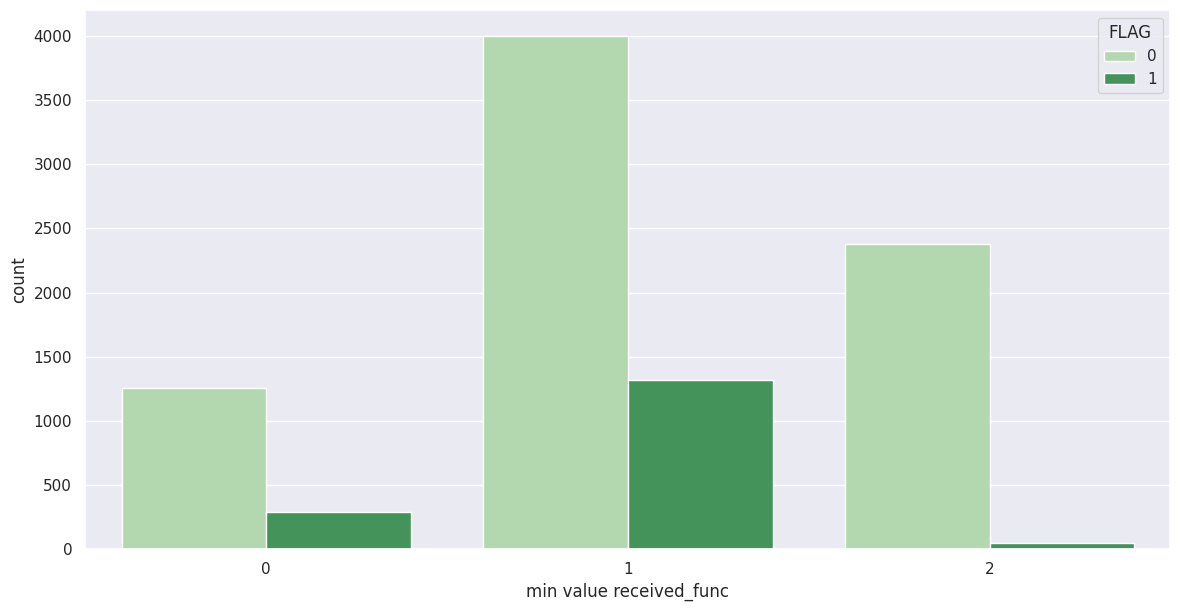

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='min value received_func', hue='FLAG', palette='Greens')
plt.show()

###max value received

Maximum value in Ether ever received. We category it as below:

> [0] No ETH received

> [1] Small amount ETH received

> [2] Medium amount ETH received

> [3] Large amount ETH received

In [ ]:
df_EDA['max value received'].describe()

count      9288.000000
mean        553.815966
std       13389.887387
min           0.000000
25%           1.021681
50%           7.828332
75%          74.616914
max      800000.000000
Name: max value received, dtype: float64

In [ ]:
def max_val_rec(row):
  if row['max value received'] == 0:
    return 0 #No ETH received
  elif row['max value received'] > 0 and row['max value received'] <= 7.8283:
    return 1 #Small amount
  elif row['max value received'] > 7.8283 and row['max value received'] <= 75:
    return 2 #Medium amount
  else:
    return 3 #Large amount

df_EDA['max value received_func'] = df_EDA.apply(max_val_rec, axis=1)
df_EDA['max value received_func'].value_counts()

1    4459
2    2334
3    2310
0     185
Name: max value received_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['max value received_func'], margins='True', margins_name='Total')

max value received_func    0     1     2     3  Total
FLAG                                                 
0                         50  3306  2022  2254   7632
1                        135  1153   312    56   1656
Total                    185  4459  2334  2310   9288

####Comparison of FLAG based on max value received

In [ ]:
MAX_VAL_REC = pd.crosstab(df_EDA.FLAG, [df_EDA['max value received_func']], normalize='columns')
MAX_VAL_REC['baseline'] = baseline
MAX_VAL_REC = MAX_VAL_REC.iloc[:2,]
MAX_VAL_REC.style.apply(lambda x: ['background: green' if v > x.iloc[len(MAX_VAL_REC.columns)-1] else '' for v in x], axis=1)

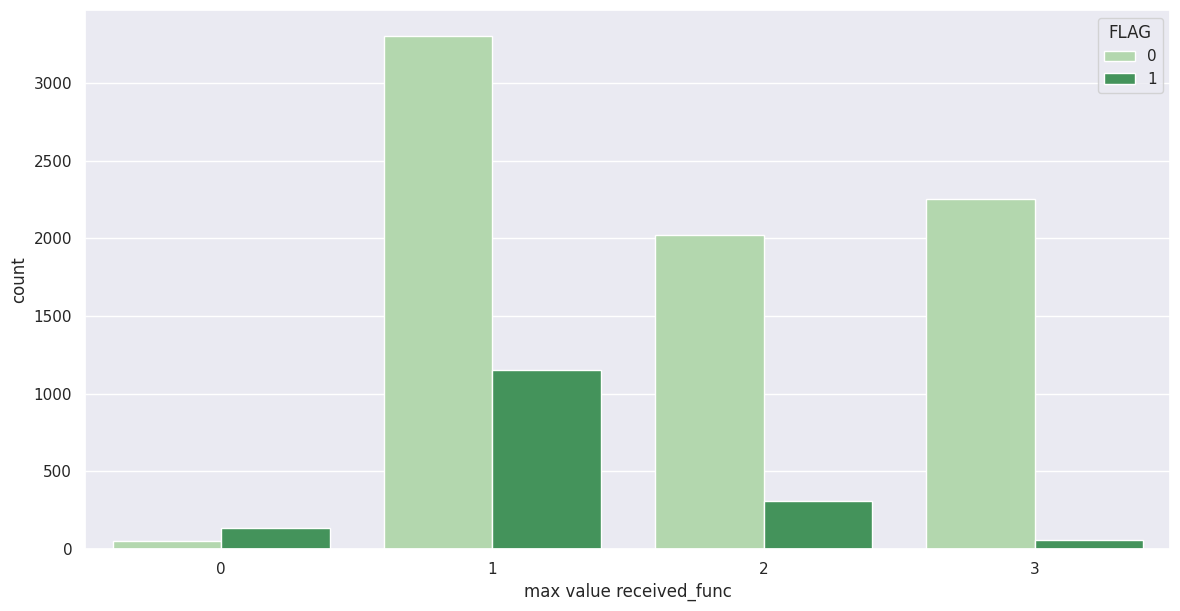

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='max value received_func', hue='FLAG', palette='Greens')
plt.show()

###avg val received

Average value in Ether ever received. We category it as below:

> [0] No ETH received

> [1] Small amount ETH received

> [2] Medium amount ETH received

> [3] Large amount ETH received

In [ ]:
df_EDA['avg val received'].describe()

count      9288.000000
mean        106.416717
std        2969.520209
min           0.000000
25%           0.544426
50%           2.078715
75%          28.657699
max      283618.831600
Name: avg val received, dtype: float64

In [ ]:
def avg_val_rec(row):
  if row['avg val received'] == 0:
    return 0 #No ETH received
  elif row['avg val received'] > 0 and row['avg val received'] <= 2.078:
    return 1 #Small amount
  elif row['avg val received'] > 2.078 and row['avg val received'] <= 28.7:
    return 2 #Medium amount
  else:
    return 3 #Large amount

df_EDA['avg val received_func'] = df_EDA.apply(avg_val_rec, axis=1)
df_EDA['avg val received_func'].value_counts()

1    4456
2    2323
3    2322
0     187
Name: avg val received_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['avg val received_func'], margins='True', margins_name='Total')

avg val received_func    0     1     2     3  Total
FLAG                                               
0                       52  3197  2077  2306   7632
1                      135  1259   246    16   1656
Total                  187  4456  2323  2322   9288

####Comparison of FLAG based on avg val received

In [ ]:
AVG_VAL_REC = pd.crosstab(df_EDA.FLAG, [df_EDA['avg val received_func']], normalize='columns')
AVG_VAL_REC['baseline'] = baseline
AVG_VAL_REC = AVG_VAL_REC.iloc[:2,]
AVG_VAL_REC.style.apply(lambda x: ['background: green' if v > x.iloc[len(AVG_VAL_REC.columns)-1] else '' for v in x], axis=1)

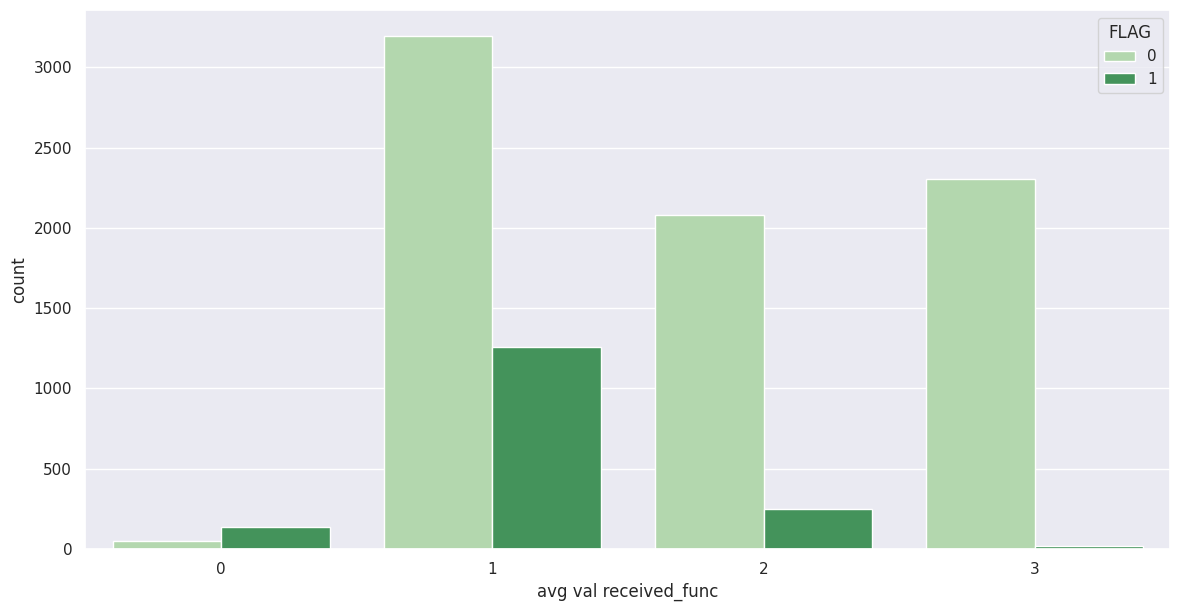

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='avg val received_func', hue='FLAG', palette='Greens')
plt.show()

###min val sent

Minimum value of Ether ever sent. We category it as below:

> [0] No ETH sent

> [1] Small amount ETH sent

> [2] Large amount ETH sent

In [ ]:
df_EDA['min val sent'].describe()

count     9288.000000
mean         5.083027
std        142.671761
min          0.000000
25%          0.000000
50%          0.082119
75%          0.999559
max      12000.000000
Name: min val sent, dtype: float64

In [ ]:
def min_val_sent(row):
  if row['min val sent'] == 0:
    return 0 #No ETH sent
  elif row['min val sent'] > 0 and row['min val sent'] <= 1:
    return 1 #Small amount
  else:
    return 2 #Large amount

df_EDA['min val sent_func'] = df_EDA.apply(min_val_sent, axis=1)
df_EDA['min val sent_func'].value_counts()

1    4145
0    3007
2    2136
Name: min val sent_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['min val sent_func'], margins='True', margins_name='Total')

min val sent_func     0     1     2  Total
FLAG                                      
0                  2568  3509  1555   7632
1                   439   636   581   1656
Total              3007  4145  2136   9288

####Comparison of FLAG based on min val sent


In [ ]:
MIN_VAL_SENT = pd.crosstab(df_EDA.FLAG, [df_EDA['min val sent_func']], normalize='columns')
MIN_VAL_SENT['baseline'] = baseline
MIN_VAL_SENT = MIN_VAL_SENT.iloc[:2,]
MIN_VAL_SENT.style.apply(lambda x: ['background: green' if v > x.iloc[len(MIN_VAL_SENT.columns)-1] else '' for v in x], axis=1)

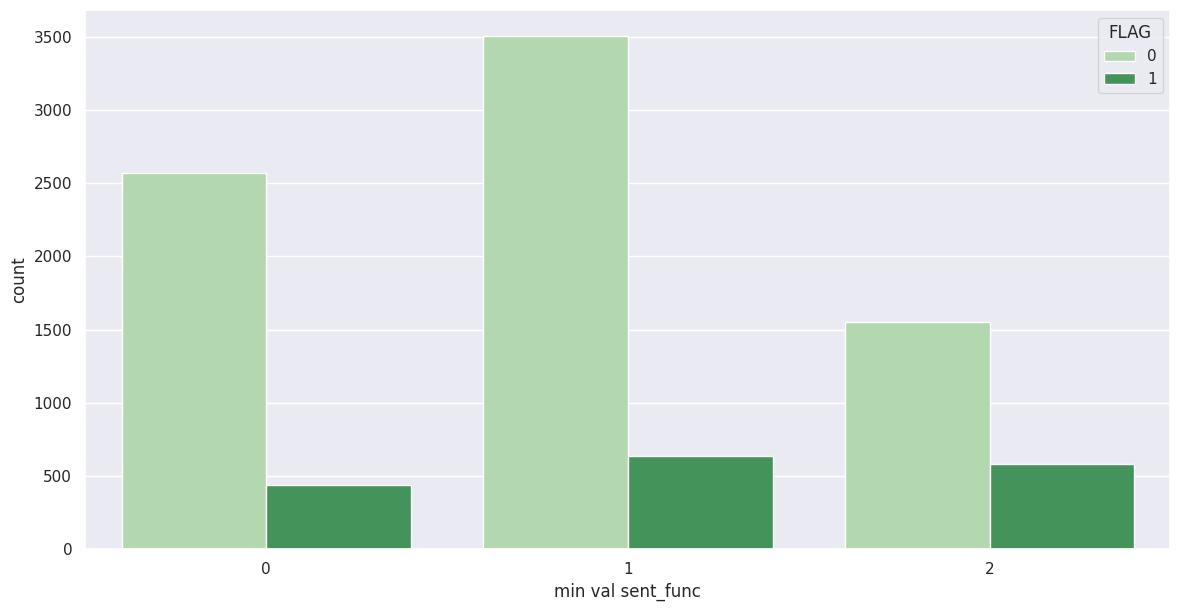

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='min val sent_func', hue='FLAG', palette='Greens')
plt.show()

###max val sent

Maximum value of Ether ever sent. We category it as below:

> [0] No ETH sent

> [1] Small amount ETH sent

> [2] Medium amount ETH sent

> [3] Large amount ETH sent

In [ ]:
df_EDA['max val sent'].describe()

count      9288.000000
mean        332.474891
std        6823.208238
min           0.000000
25%           0.498803
50%           6.203561
75%          68.505542
max      520000.000000
Name: max val sent, dtype: float64

In [ ]:
def max_val_sent(row):
  if row['max val sent'] == 0:
    return 0 #No ETH sent
  elif row['max val sent'] > 0 and row['max val sent'] <= 6.203:
    return 1 #Small amount
  elif row['max val sent'] > 6.203 and row['max val sent'] <= 68.505:
    return 2 #Medium amount
  else:
    return 3 #Large amount

df_EDA['max val sent_func'] = df_EDA.apply(max_val_sent, axis=1)
df_EDA['max val sent_func'].value_counts()

1    3109
2    2322
3    2322
0    1535
Name: max val sent_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['max val sent_func'], margins='True', margins_name='Total')

max val sent_func     0     1     2     3  Total
FLAG                                            
0                  1228  2311  1850  2243   7632
1                   307   798   472    79   1656
Total              1535  3109  2322  2322   9288

####Comparison of FLAG based on max val sent


In [ ]:
MAX_VAL_SENT = pd.crosstab(df_EDA.FLAG, [df_EDA['max val sent_func']], normalize='columns')
MAX_VAL_SENT['baseline'] = baseline
MAX_VAL_SENT = MAX_VAL_SENT.iloc[:2,]
MAX_VAL_SENT.style.apply(lambda x: ['background: green' if v > x.iloc[len(MAX_VAL_SENT.columns)-1] else '' for v in x], axis=1)

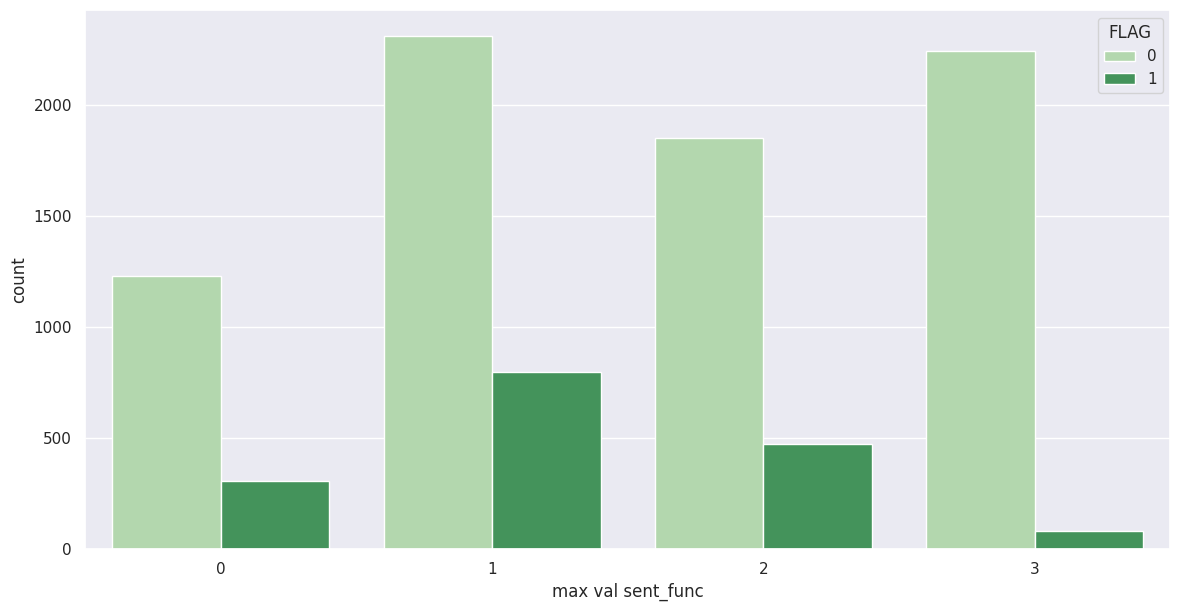

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='max val sent_func', hue='FLAG', palette='Greens')
plt.show()

###avg val sent

Average value of Ether ever sent. We category it as below:

> [0] No ETH sent

> [1] Small amount ETH sent

> [2] Medium amount ETH sent

> [3] Large amount ETH sent

In [ ]:
df_EDA['avg val sent'].describe()

count     9288.000000
mean        47.163728
std        245.649693
min          0.000000
25%          0.196270
50%          1.999538
75%         25.249496
max      12000.000000
Name: avg val sent, dtype: float64

In [ ]:
def avg_val_sent(row):
  if row['avg val sent'] == 0:
    return 0 #No ETH sent
  elif row['avg val sent'] > 0 and row['avg val sent'] <= 2:
    return 1 #Small amount
  elif row['avg val sent'] > 2 and row['avg val sent'] <= 25.24:
    return 2 #Medium amount
  else:
    return 3 #Large amount

df_EDA['avg val sent_func'] = df_EDA.apply(avg_val_sent, axis=1)
df_EDA['avg val sent_func'].value_counts()

1    3116
3    2378
2    2259
0    1535
Name: avg val sent_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['avg val sent_func'], margins='True', margins_name='Total')

avg val sent_func     0     1     2     3  Total
FLAG                                            
0                  1228  2468  1668  2268   7632
1                   307   648   591   110   1656
Total              1535  3116  2259  2378   9288

####Comparison of FLAG based on avg val sent


In [ ]:
AVG_VAL_SENT = pd.crosstab(df_EDA.FLAG, [df_EDA['avg val sent_func']], normalize='columns')
AVG_VAL_SENT['baseline'] = baseline
AVG_VAL_SENT = AVG_VAL_SENT.iloc[:2,]
AVG_VAL_SENT.style.apply(lambda x: ['background: green' if v > x.iloc[len(AVG_VAL_SENT.columns)-1] else '' for v in x], axis=1)

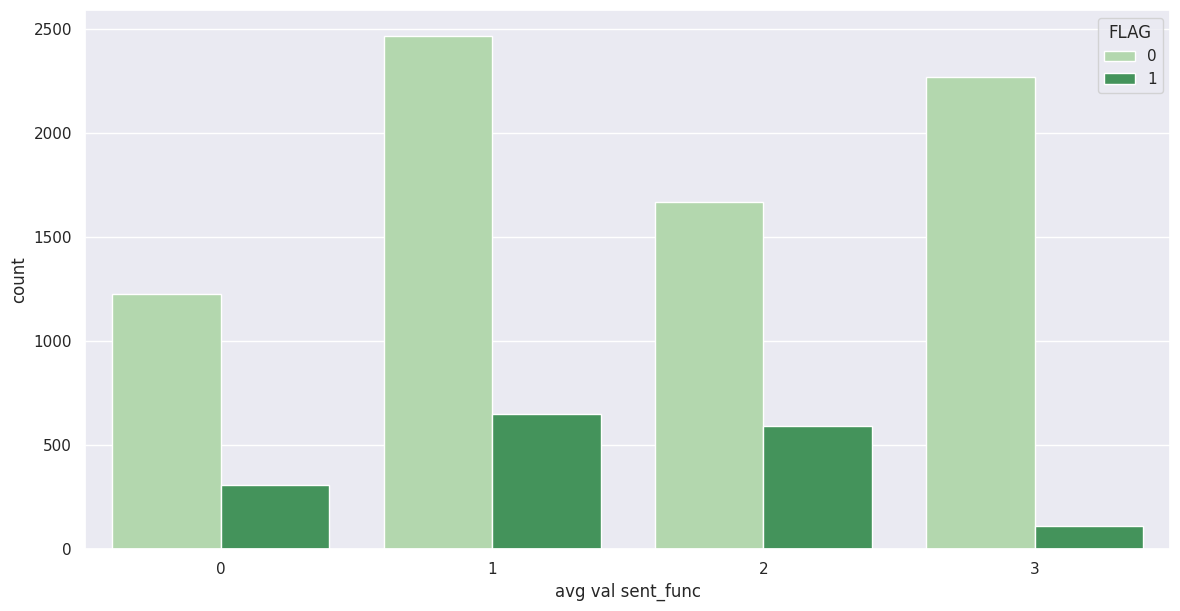

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='avg val sent_func', hue='FLAG', palette='Greens')
plt.show()

###min value sent to contract

Minimum value of Ether sent to a contract. This is a feature in the dataset that indicates the minimum amount of Ether that has been sent to a contract in a particular transaction. In Ethereum, contracts can receive and manage funds, and this feature measures the smallest amount of funds that have been sent to a contract in a transaction. We category it as below:

> [0] No minimal value sent

> [0.01] Small amount minimal value sent

> [0.02] Medium amount minimal value sent

It seems that the minimum value of Ether sent to a contract in the dataset is only either 0, 0.01, or 0.02. It could be that transactions that involve sending Ether to a contract with a value less than 0.01 are not recorded in the dataset, or that such transactions are simply not common in the Ethereum network.

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['min value sent to contract'], margins='True', margins_name='Total')

min value sent to contract   0.0  0.01  0.02  Total
FLAG                                               
0                           7630     1     1   7632
1                           1656     0     0   1656
Total                       9286     1     1   9288

####Comparison of FLAG based on min value sent to contract


In [ ]:
MIN_VAL_SENT_CON = pd.crosstab(df_EDA.FLAG, [df_EDA['min value sent to contract']], normalize='columns')
MIN_VAL_SENT_CON['baseline'] = baseline
MIN_VAL_SENT_CON = MIN_VAL_SENT_CON.iloc[:2,]
MIN_VAL_SENT_CON.style.apply(lambda x: ['background: green' if v > x.iloc[len(MIN_VAL_SENT_CON.columns)-1] else '' for v in x], axis=1)

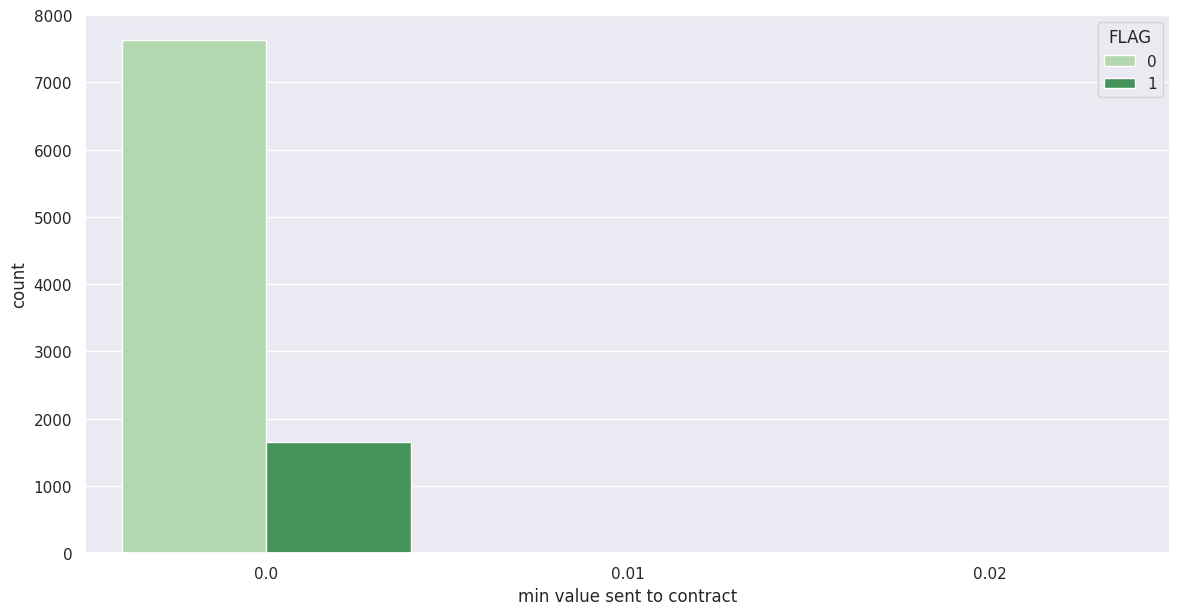

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='min value sent to contract', hue='FLAG', palette='Greens')
plt.show()

###max val sent to contract

Maximum value of Ether sent to a contract. This feature tracks the highest amount of Ether transferred to a particular contract address during the observation period. It can be useful in analyzing the behavior of users who are sending larger amounts of Ether to contracts, which may indicate different types of activities or transactions taking place. We category it as below:

> [0] No maximum value sent

> [0.01] Small amount maximum value sent

> [0.02] Medium amount maximum value sent

> [0.046029] Large amount maximum value sent

The maximum value of Ether sent to a contract is either 0, 0.01, 0.02, or 0.046029, and there are no other values in the dataset for this feature. It could be possible that the contracts in the dataset have only received these specific values of Ether, and no other values.

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['max val sent to contract'], margins='True', margins_name='Total')

max val sent to contract   0.0  0.01  0.02  0.046029  Total
FLAG                                                       
0                         7629     1     1         1   7632
1                         1656     0     0         0   1656
Total                     9285     1     1         1   9288

####Comparison of FLAG based on max val sent to contract


In [ ]:
MAX_VAL_SENT_CON = pd.crosstab(df_EDA.FLAG, [df_EDA['max val sent to contract']], normalize='columns')
MAX_VAL_SENT_CON['baseline'] = baseline
MAX_VAL_SENT_CON = MAX_VAL_SENT_CON.iloc[:2,]
MAX_VAL_SENT_CON.style.apply(lambda x: ['background: green' if v > x.iloc[len(MAX_VAL_SENT_CON.columns)-1] else '' for v in x], axis=1)

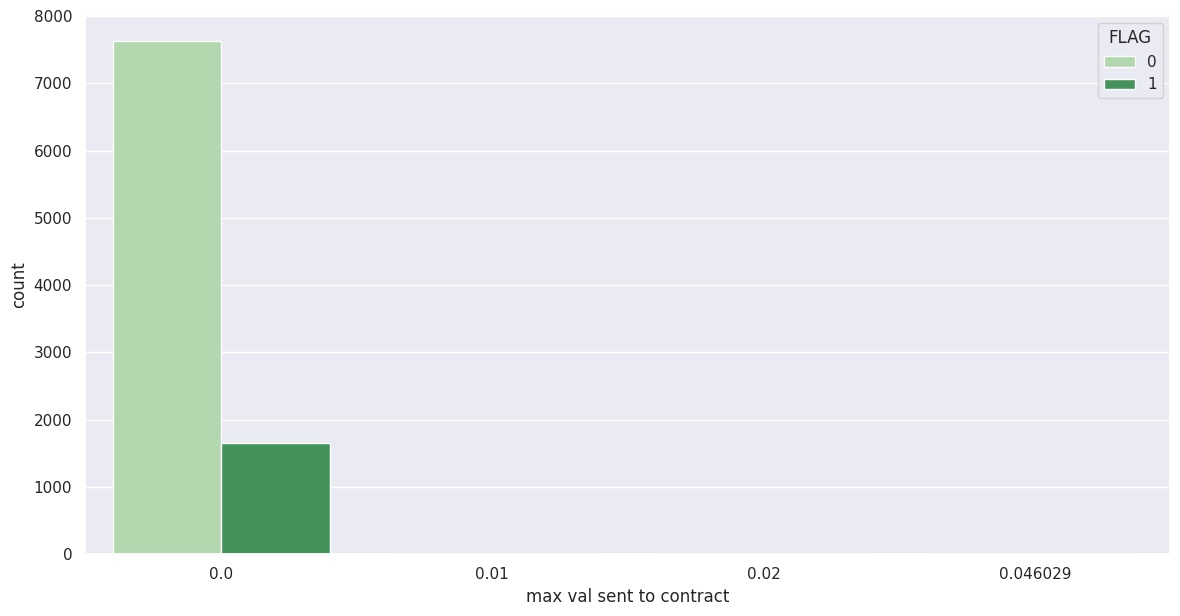

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='max val sent to contract', hue='FLAG', palette='Greens')
plt.show()

###avg value sent to contract

We category it as below:

> [0] No average value sent

> [0.01] Small amount average value sent

> [0.02] Medium amount average value sent

> [0.023014] Large amount average value sent

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['avg value sent to contract'], margins='True', margins_name='Total')

avg value sent to contract   0.0  0.01  0.02  0.023014  Total
FLAG                                                         
0                           7629     1     1         1   7632
1                           1656     0     0         0   1656
Total                       9285     1     1         1   9288

####Comparison of FLAG based on avg value sent to contract

In [ ]:
AVG_VAL_SENT_CON = pd.crosstab(df_EDA.FLAG, [df_EDA['avg value sent to contract']], normalize='columns')
AVG_VAL_SENT_CON['baseline'] = baseline
AVG_VAL_SENT_CON = AVG_VAL_SENT_CON.iloc[:2,]
AVG_VAL_SENT_CON.style.apply(lambda x: ['background: green' if v > x.iloc[len(AVG_VAL_SENT_CON.columns)-1] else '' for v in x], axis=1)

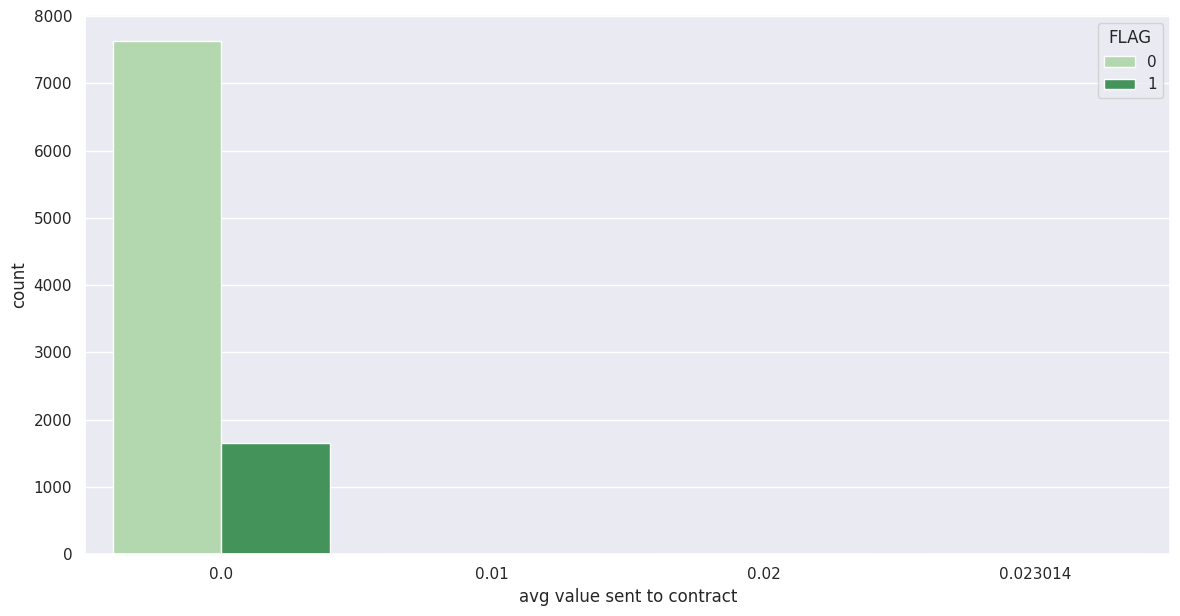

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='avg value sent to contract', hue='FLAG', palette='Greens')
plt.show()

###total transactions (including tnx to create contract)

Total number of transactions. We category it as below:

> [0] No transaction

> [1] Small amount ETH transactions

> [2] Medium amount ETH transactions

> [3] Large amount ETH transactions

In [ ]:
df_EDA['total transactions (including tnx to create contract)'].describe()

count     9288.000000
mean       300.060078
std       1390.277524
min          0.000000
25%          4.000000
50%         10.000000
75%         63.000000
max      19995.000000
Name: total transactions (including tnx to create contract), dtype: float64

In [ ]:
def total_transaction(row):
  if row['total transactions (including tnx to create contract)'] == 0:
    return 0 #No transaction
  elif row['total transactions (including tnx to create contract)'] > 0 and row['total transactions (including tnx to create contract)'] <= 10:
    return 1 #Small amount
  elif row['total transactions (including tnx to create contract)'] > 10 and row['total transactions (including tnx to create contract)'] <= 63:
    return 2 #Medium amount
  else:
    return 3 #Large amount

df_EDA['total transactions_func'] = df_EDA.apply(total_transaction, axis=1)
df_EDA['total transactions_func'].value_counts()

1    4742
3    2320
2    2212
0      14
Name: total transactions_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['total transactions_func'], margins='True', margins_name='Total')

total transactions_func   0     1     2     3  Total
FLAG                                                
0                         0  3811  1627  2194   7632
1                        14   931   585   126   1656
Total                    14  4742  2212  2320   9288

####Comparison of FLAG based on total transactions (including tnx to create contract)


In [ ]:
TOTAL_TRANS = pd.crosstab(df_EDA.FLAG, [df_EDA['total transactions_func']], normalize='columns')
TOTAL_TRANS['baseline'] = baseline
TOTAL_TRANS = TOTAL_TRANS.iloc[:2,]
TOTAL_TRANS.style.apply(lambda x: ['background: green' if v > x.iloc[len(TOTAL_TRANS.columns)-1] else '' for v in x], axis=1)

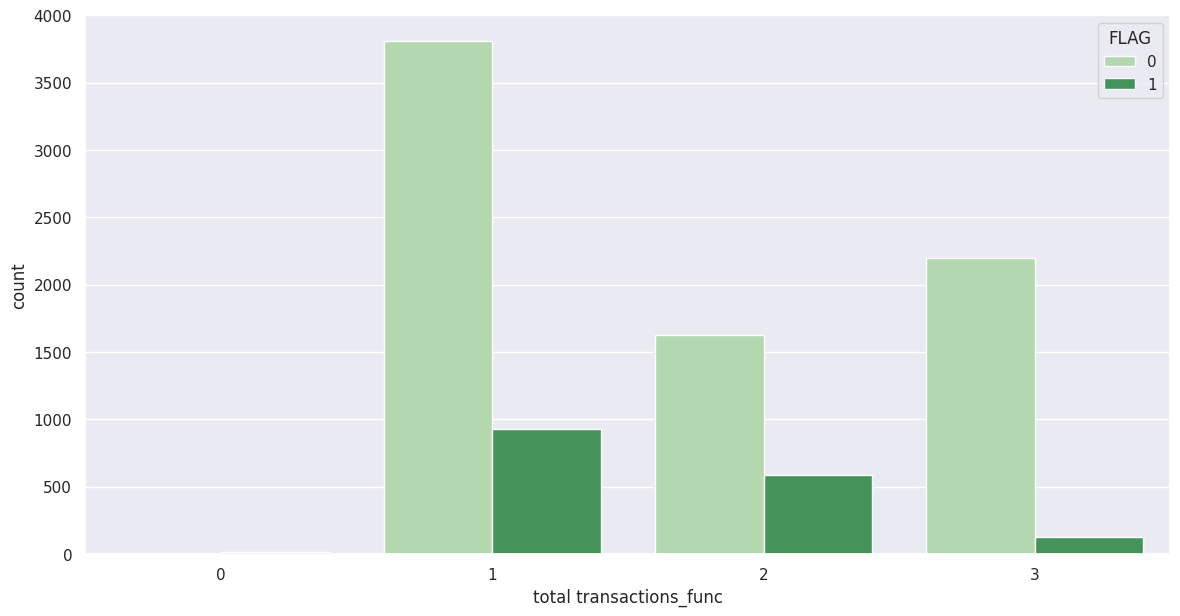

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='total transactions_func', hue='FLAG', palette='Greens')
plt.show()

###total Ether sent

Total Ether sent for account address. We category it as below:

> [0] No ETH sent

> [1] Small amount ETH sent

> [2] Medium amount ETH sent

> [3] Large amount ETH sent

In [ ]:
df_EDA['total Ether sent'].describe()

count    9.288000e+03
mean     1.076412e+04
std      3.688279e+05
min      0.000000e+00
25%      7.545917e-01
50%      1.747354e+01
75%      1.009990e+02
max      2.858096e+07
Name: total Ether sent, dtype: float64

In [ ]:
def ether_sent(row):
  if row['total Ether sent'] == 0:
    return 0 #No ETH sent
  elif row['total Ether sent'] > 0 and row['total Ether sent'] <= 0.0174:
      return 1 #Small amount
  elif row['total Ether sent'] > 0.0174 and row['total Ether sent'] <= 100.99:
      return 2 #Medium amount
  else:
    return 3 #Large amount

df_EDA['total Ether sent_func'] = df_EDA.apply(ether_sent, axis=1)
df_EDA['total Ether sent_func'].value_counts()

2    4358
3    3318
0    1535
1      77
Name: total Ether sent_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['total Ether sent_func'], margins='True', margins_name='Total')

total Ether sent_func     0   1     2     3  Total
FLAG                                              
0                      1228  60  3113  3231   7632
1                       307  17  1245    87   1656
Total                  1535  77  4358  3318   9288

####Comparison of FLAG based on total Ether sent


In [ ]:
ETH_SENT = pd.crosstab(df_EDA.FLAG, [df_EDA['total Ether sent_func']], normalize='columns')
ETH_SENT['baseline'] = baseline
ETH_SENT = ETH_SENT.iloc[:2,]
ETH_SENT.style.apply(lambda x: ['background: green' if v > x.iloc[len(ETH_SENT.columns)-1] else '' for v in x], axis=1)

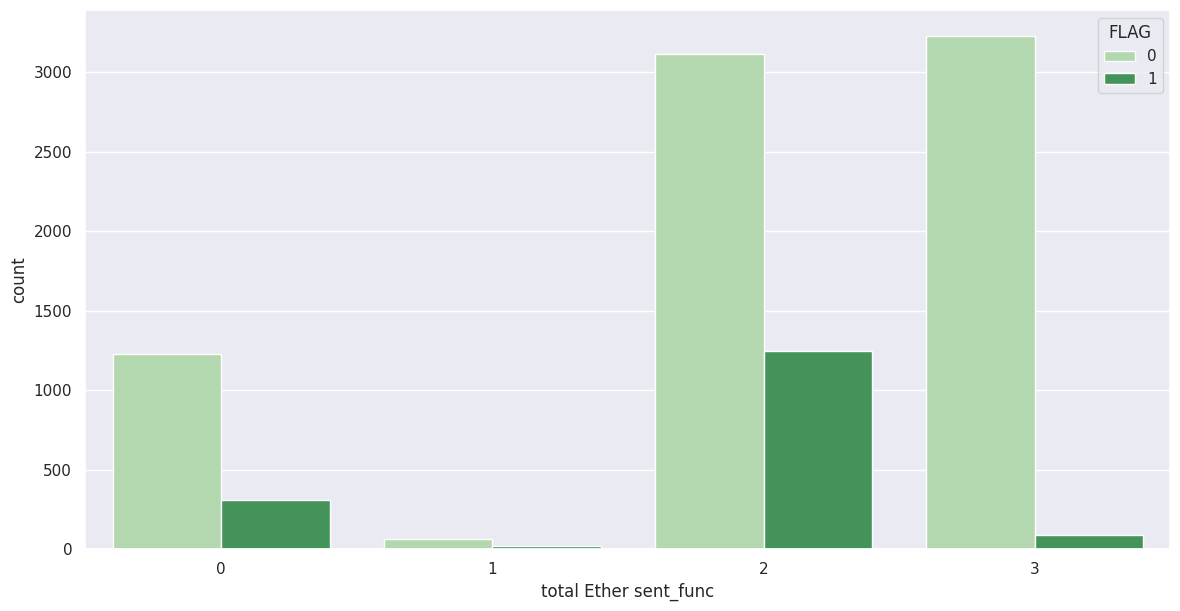

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='total Ether sent_func', hue='FLAG', palette='Greens')
plt.show()

###total ether received

Total Ether received for account address. We category it as below:

> [0] No ETH received

> [1] Small amount ETH received

> [2] Medium amount ETH received

> [3] Large amount ETH received

In [ ]:
df_EDA['total ether received'].describe()

count    9.288000e+03
mean     1.232942e+04
std      3.748800e+05
min      0.000000e+00
25%      4.498282e+00
50%      3.726025e+01
75%      1.010000e+02
max      2.858159e+07
Name: total ether received, dtype: float64

In [ ]:
def ether_received(row):
  if row['total ether received'] == 0:
    return 0 #No ETH received
  elif row['total ether received'] > 0 and row['total ether received'] <= 0.372:
      return 1 #Small amount
  elif row['total ether received'] > 0.372 and row['total ether received'] <= 101:
    return 2 #Medium amount
  else:
    return 3 #Large amount

df_EDA['total ether received_func'] = df_EDA.apply(ether_received, axis=1)
df_EDA['total ether received_func'].value_counts()

2    6356
3    2169
1     578
0     185
Name: total ether received_func, dtype: int64

In [ ]:
pd.crosstab(df['FLAG'], df_EDA['total ether received_func'], margins='True', margins_name='Total')

total ether received_func    0    1     2     3  Total
FLAG                                                  
0                           50  426  5092  2064   7632
1                          135  152  1264   105   1656
Total                      185  578  6356  2169   9288

####Comparison of FLAG based on total ether received


In [ ]:
ETH_RECEIVED = pd.crosstab(df_EDA.FLAG, [df_EDA['total ether received_func']], normalize='columns')
ETH_RECEIVED['baseline'] = baseline
ETH_RECEIVED = ETH_RECEIVED.iloc[:2,]
ETH_RECEIVED.style.apply(lambda x: ['background: green' if v > x.iloc[len(ETH_RECEIVED.columns)-1] else '' for v in x], axis=1)

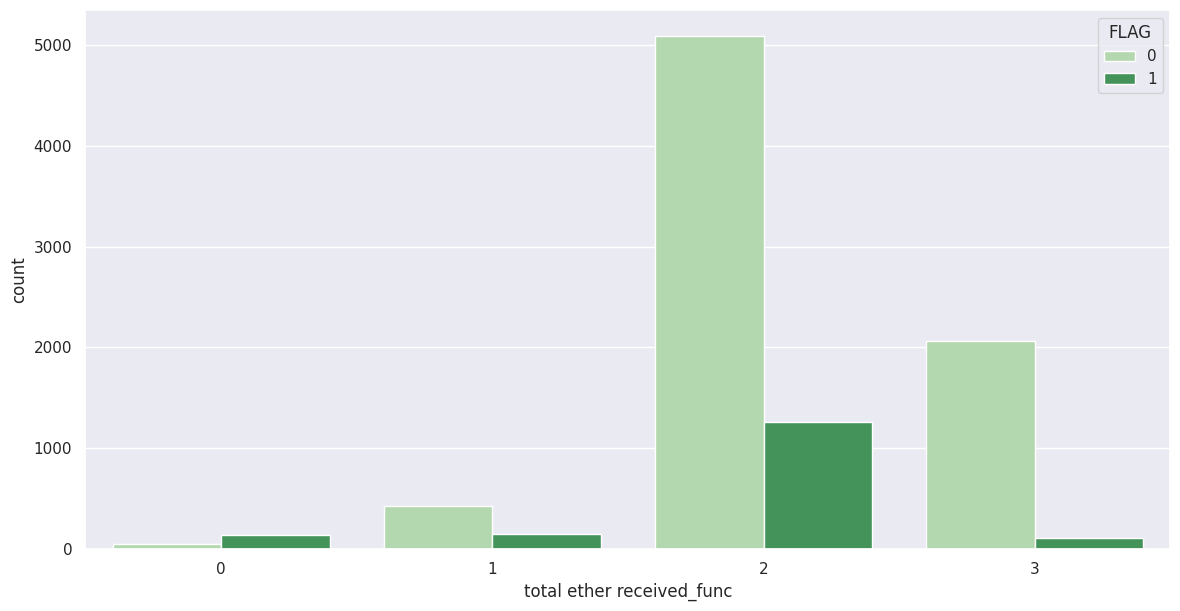

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='total ether received_func', hue='FLAG', palette='Greens')
plt.show()

###total ether sent contracts

Total Ether sent to Contract addresses. We category it as below:

> [0] No ETH sent

> [0.01] Small amount ETH sent

> [0.2] Medium amount ETH sent

> [0.046028713] Large amount ETH sent

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['total ether sent contracts'], margins='True', margins_name='Total')

total ether sent contracts   0.0  0.01  0.02  0.046028713  Total
FLAG                                                            
0                           7629     1     1            1   7632
1                           1656     0     0            0   1656
Total                       9285     1     1            1   9288

####Comparison of FLAG based on total ether sent contracts


In [ ]:
ETH_SENT_CON = pd.crosstab(df_EDA.FLAG, [df_EDA['total ether sent contracts']], normalize='columns')
ETH_SENT_CON['baseline'] = baseline
ETH_SENT_CON = ETH_SENT_CON.iloc[:2,]
ETH_SENT_CON.style.apply(lambda x: ['background: green' if v > x.iloc[len(ETH_SENT_CON.columns)-1] else '' for v in x], axis=1)

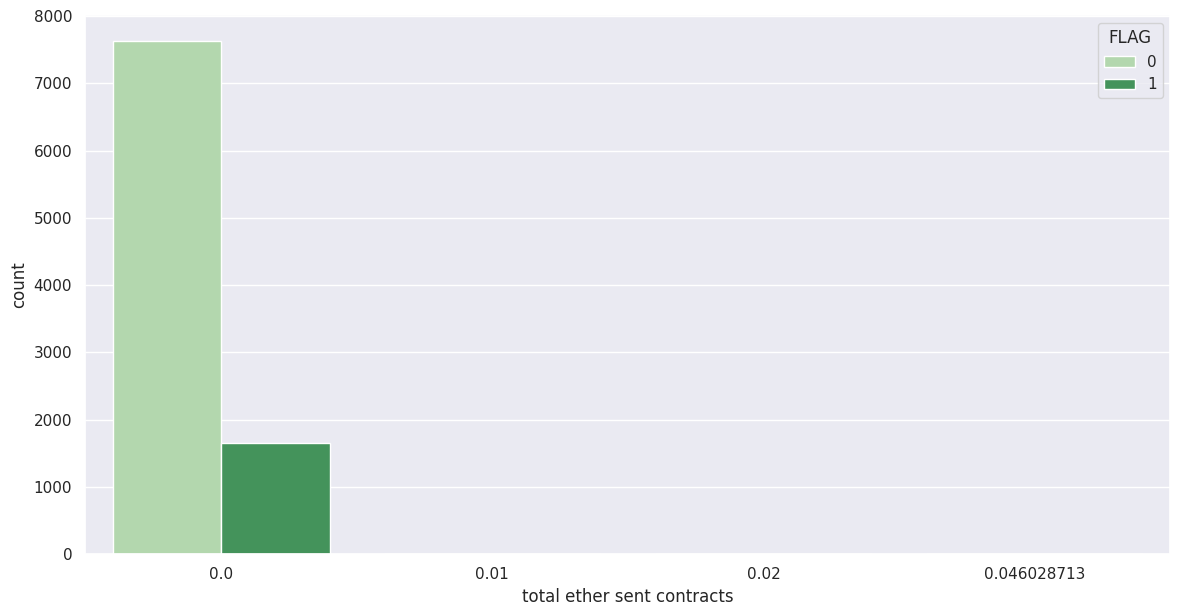

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='total ether sent contracts', hue='FLAG', palette='Greens')
plt.show()

###total ether balance

Total Ether Balance following enacted transactions. We category it as below:

> [0] Minus or no ETH balance

> [1] Small amount ETH balance

> [2] Medium amount ETH balance

> [3] Large amount ETH balance

In [ ]:
df_EDA['total ether balance'].describe()

count    9.288000e+03
mean     1.565302e+03
std      2.495385e+05
min     -1.560535e+07
25%      9.240000e-04
50%      2.016000e-03
75%      6.307032e-02
max      1.428864e+07
Name: total ether balance, dtype: float64

In [ ]:
def ether_balance(row):
  if row['total ether balance'] <= 0:
    return 0 #Minus or zero balance
  elif row['total ether balance'] > 0 and row['total ether balance'] <= 0.00000201:
    return 1 #Small amount
  elif row['total ether balance'] > 0.00000201 and row['total ether balance'] <= 0.00063:
    return 2 #Medium amount
  else:
    return 3 #Large amount

df_EDA['total ether balance_func'] = df_EDA.apply(ether_balance, axis=1)
df_EDA['total ether balance_func'].value_counts()

3    7347
0    1150
2     790
1       1
Name: total ether balance_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['total ether balance_func'], margins='True', margins_name='Total')

total ether balance_func     0  1    2     3  Total
FLAG                                               
0                          870  0  598  6164   7632
1                          280  1  192  1183   1656
Total                     1150  1  790  7347   9288

####Comparison of FLAG based on total ether balance


In [ ]:
ETH_BALANCE = pd.crosstab(df_EDA.FLAG, [df_EDA['total ether balance_func']], normalize='columns')
ETH_BALANCE['baseline'] = baseline
ETH_BALANCE = ETH_BALANCE.iloc[:2,]
ETH_BALANCE.style.apply(lambda x: ['background: green' if v > x.iloc[len(ETH_BALANCE.columns)-1] else '' for v in x], axis=1)

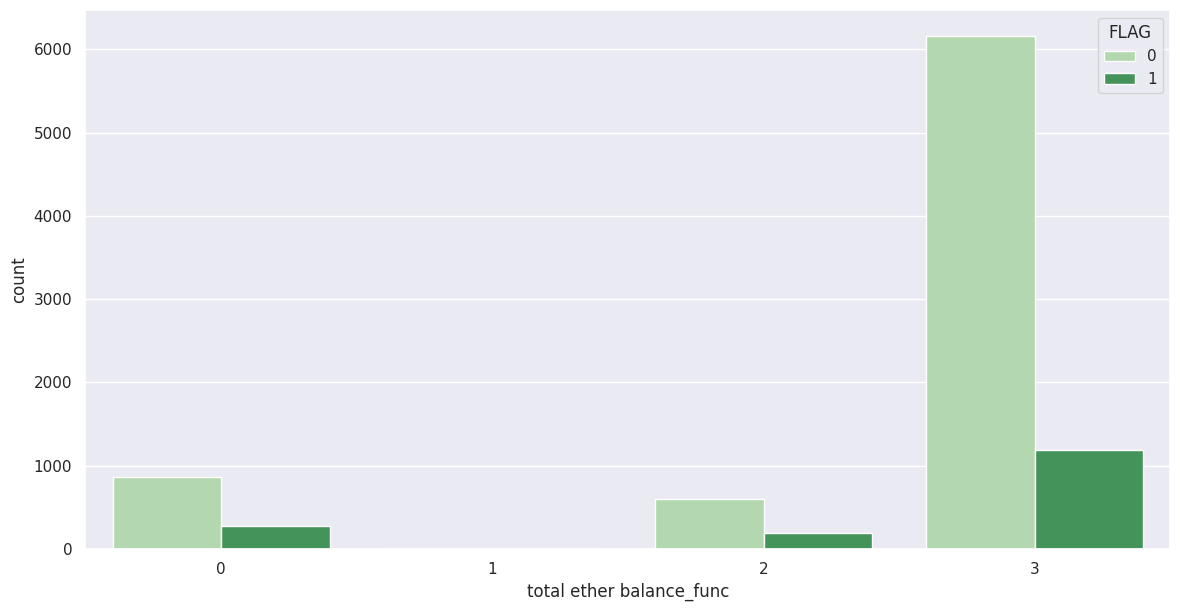

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='total ether balance_func', hue='FLAG', palette='Greens')
plt.show()

###Total ERC20 tnxs

Total number of ERC20 token transfer transactions. We category it as below:

> [0] No ERC20 token transaction

> [1] Small amount ERC20 token transactions

> [2] Medium amount ERC20 token transactions

> [3] Large amount ERC20 token transactions

In [ ]:
df_EDA['Total ERC20 tnxs'].describe()

count     9288.000000
mean        35.169681
std        440.861240
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max      10001.000000
Name: Total ERC20 tnxs, dtype: float64

In [ ]:
def total_ERC20(row):
  if row['Total ERC20 tnxs'] == 0:
    return 0 #No ERC20 token transaction
  elif row['Total ERC20 tnxs'] > 0 and row['Total ERC20 tnxs'] <= 1:
    return 1 #Small amount
  elif row['Total ERC20 tnxs'] > 1 and row['Total ERC20 tnxs'] <= 3:
    return 2 #Medium amount
  else:
    return 3 #Large amount

df_EDA['Total ERC20 tnxs_func'] = df_EDA.apply(total_ERC20, axis=1)
df_EDA['Total ERC20 tnxs_func'].value_counts()

0    4383
3    2111
1    1577
2    1217
Name: Total ERC20 tnxs_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['Total ERC20 tnxs_func'], margins='True', margins_name='Total')

Total ERC20 tnxs_func     0     1     2     3  Total
FLAG                                                
0                      4383   428   946  1875   7632
1                         0  1149   271   236   1656
Total                  4383  1577  1217  2111   9288

####Comparison of FLAG based on Total ERC20 tnxs


In [ ]:
TOTAL_ERC20 = pd.crosstab(df_EDA.FLAG, [df_EDA['Total ERC20 tnxs_func']], normalize='columns')
TOTAL_ERC20['baseline'] = baseline
TOTAL_ERC20 = TOTAL_ERC20.iloc[:2,]
TOTAL_ERC20.style.apply(lambda x: ['background: green' if v > x.iloc[len(TOTAL_ERC20.columns)-1] else '' for v in x], axis=1)

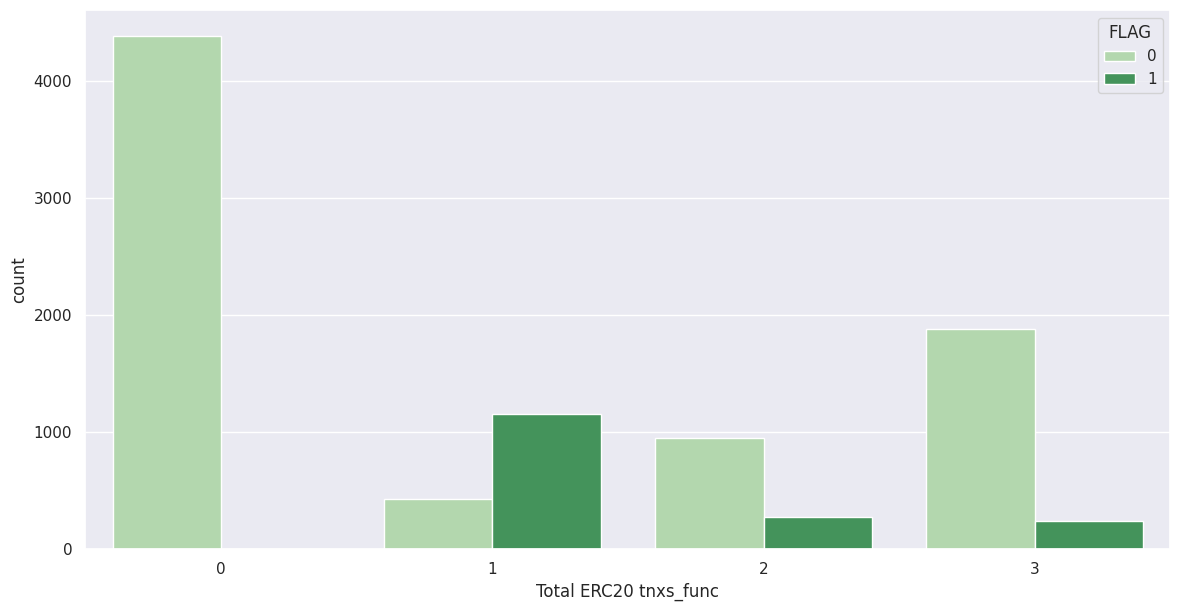

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='Total ERC20 tnxs_func', hue='FLAG', palette='Greens')
plt.show()

###ERC20 total Ether received

Total ERC20 token received transactions in Ether. We category it as below:

[0] No ETH received

[1] Small amount ETH received

[2] Medium amount ETH received

[3] Large amount ETH received

In [ ]:
df_EDA['ERC20 total Ether received'].describe()

count    9.288000e+03
mean     1.257678e+08
std      1.038083e+10
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e-12
75%      8.868005e+01
max      1.000020e+12
Name: ERC20 total Ether received, dtype: float64

In [ ]:
def ERC20_received(row):
  if row['ERC20 total Ether received'] == 0:
    return 0 #No ETH received
  elif row['ERC20 total Ether received'] > 0 and row['ERC20 total Ether received'] <= 0.000000000001:
    return 1 #Small amount
  elif row['ERC20 total Ether received'] > 0.000000000001 and row['ERC20 total Ether received'] <= 0.886:
    return 2 #Medium amount
  else:
    return 3 #Large amount

df_EDA['ERC20 total Ether received_func'] = df_EDA.apply(ERC20_received, axis=1)
df_EDA['ERC20 total Ether received_func'].value_counts()

0    4424
3    3784
1     621
2     459
Name: ERC20 total Ether received_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['ERC20 total Ether received_func'], margins='True', margins_name='Total')

ERC20 total Ether received_func     0    1    2     3  Total
FLAG                                                        
0                                4404   41  431  2756   7632
1                                  20  580   28  1028   1656
Total                            4424  621  459  3784   9288

####Comparison of FLAG based on ERC20 total Ether received


In [ ]:
ERC20_ETH_REC = pd.crosstab(df_EDA.FLAG, [df_EDA['ERC20 total Ether received_func']], normalize='columns')
ERC20_ETH_REC['baseline'] = baseline
ERC20_ETH_REC = ERC20_ETH_REC.iloc[:2,]
ERC20_ETH_REC.style.apply(lambda x: ['background: green' if v > x.iloc[len(ERC20_ETH_REC.columns)-1] else '' for v in x], axis=1)

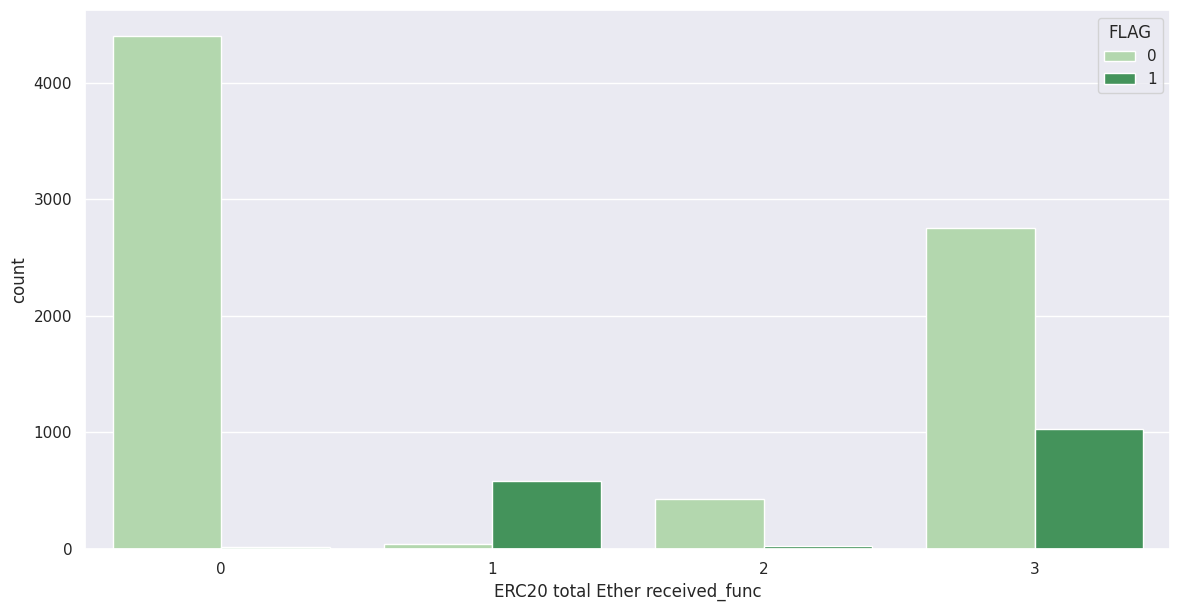

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='ERC20 total Ether received_func', hue='FLAG', palette='Greens')
plt.show()

###ERC20 uniq rec addr

Number of ERC20 token transactions received from Unique addresses. We category it as below:

[0] No ERC20 token received

[1] Small amount ERC20 token received

[2] Medium amount ERC20 token received

[3] Large amount ERC20 token received

In [ ]:
df_EDA['ERC20 uniq rec addr'].describe()

count    9288.000000
mean        7.391365
std        80.598891
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max      4293.000000
Name: ERC20 uniq rec addr, dtype: float64

In [ ]:
def ERC20_rec_uniq(row):
  if row['ERC20 uniq rec addr'] == 0:
    return 0 #No ERC20 token received
  elif row['ERC20 uniq rec addr'] > 0 and row['ERC20 uniq rec addr'] <= 1:
    return 1 #Small amount ERC20 token
  elif row['ERC20 uniq rec addr'] > 1 and row['ERC20 uniq rec addr'] <= 2:
    return 2 #Medium amount ERC20 token
  else:
    return 3 #Large amount ERC20 token

df_EDA['ERC20 uniq rec addr_func'] = df_EDA.apply(ERC20_rec_uniq, axis=1)
df_EDA['ERC20 uniq rec addr_func'].value_counts()

0    4423
3    2152
1    1752
2     961
Name: ERC20 uniq rec addr_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['ERC20 uniq rec addr_func'], margins='True', margins_name='Total')

ERC20 uniq rec addr_func     0     1    2     3  Total
FLAG                                                  
0                         4403   589  759  1881   7632
1                           20  1163  202   271   1656
Total                     4423  1752  961  2152   9288

####Comparison of FLAG based on ERC20 uniq rec addr

In [ ]:
ERC20_UNIQ_REC = pd.crosstab(df_EDA.FLAG, [df_EDA['ERC20 uniq rec addr_func']], normalize='columns')
ERC20_UNIQ_REC['baseline'] = baseline
ERC20_UNIQ_REC = ERC20_UNIQ_REC.iloc[:2,]
ERC20_UNIQ_REC.style.apply(lambda x: ['background: green' if v > x.iloc[len(ERC20_UNIQ_REC.columns)-1] else '' for v in x], axis=1)

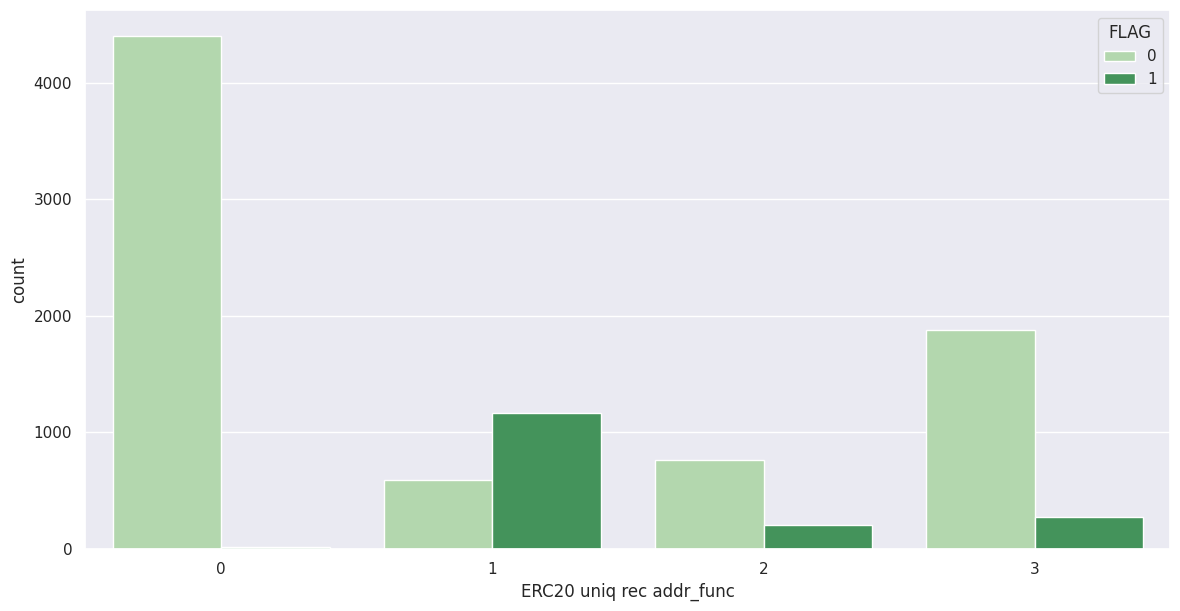

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='ERC20 uniq rec addr_func', hue='FLAG', palette='Greens')
plt.show()

###ERC20 uniq rec contract addr

Number of ERC20token transactions received from Unique contract addresses. We category it as below:

> [0] No ERC20 token received

> [1] Small amount ERC20 token received

> [2] Medium amount ERC20 token received

> [3] Large amount ERC20 token received

In [ ]:
df_EDA['ERC20 uniq rec contract addr'].describe()

count    9288.000000
mean        4.771318
std        16.976742
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max       782.000000
Name: ERC20 uniq rec contract addr, dtype: float64

In [ ]:
def ERC20_rec_uniq_con(row):
  if row['ERC20 uniq rec contract addr'] == 0:
    return 0 #No ERC20 token received
  elif row['ERC20 uniq rec contract addr'] > 0 and row['ERC20 uniq rec contract addr'] <= 1:
    return 1 #Small amount ERC20 token
  elif row['ERC20 uniq rec contract addr'] > 1 and row['ERC20 uniq rec contract addr'] <= 2:
    return 2 #Medium amount ERC20 token
  else:
    return 3 #Large amount ERC20 token

df_EDA['ERC20 uniq rec contract addr_func'] = df_EDA.apply(ERC20_rec_uniq_con, axis=1)
df_EDA['ERC20 uniq rec contract addr_func'].value_counts()

0    4423
3    2170
1    1768
2     927
Name: ERC20 uniq rec contract addr_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['ERC20 uniq rec contract addr_func'], margins='True', margins_name='Total')

ERC20 uniq rec contract addr_func     0     1    2     3  Total
FLAG                                                           
0                                  4403   601  742  1886   7632
1                                    20  1167  185   284   1656
Total                              4423  1768  927  2170   9288

####Comparison of FLAG based on ERC20 uniq rec contract addr

In [ ]:
ERC20_UNIQ_REC = pd.crosstab(df_EDA.FLAG, [df_EDA['ERC20 uniq rec contract addr_func']], normalize='columns')
ERC20_UNIQ_REC['baseline'] = baseline
ERC20_UNIQ_REC = ERC20_UNIQ_REC.iloc[:2,]
ERC20_UNIQ_REC.style.apply(lambda x: ['background: green' if v > x.iloc[len(ERC20_UNIQ_REC.columns)-1] else '' for v in x], axis=1)

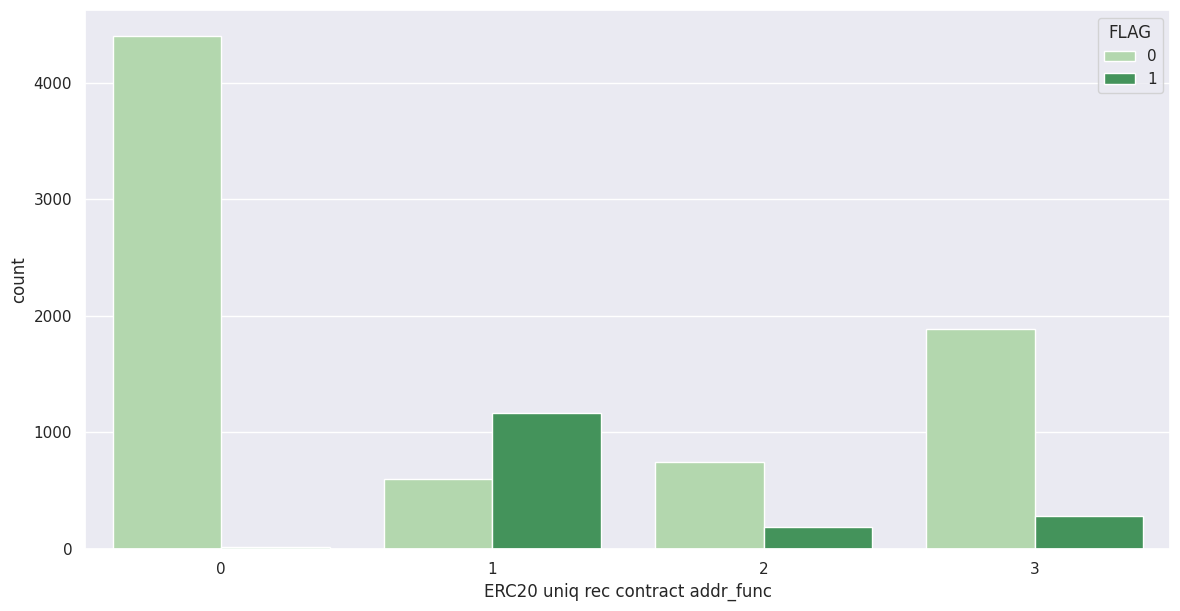

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='ERC20 uniq rec contract addr_func', hue='FLAG', palette='Greens')
plt.show()

###ERC20 max val rec

Maximum value in Ether received from ERC20 token transactions for account. We category it as below:

> [0] No ETH received

> [1] Small amount ETH received

> [2] Large amount ETH received

In [ ]:
df_EDA['ERC20 max val rec'].describe()

count    9.288000e+03
mean     1.215298e+08
std      1.037967e+10
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.551853e+01
max      1.000000e+12
Name: ERC20 max val rec, dtype: float64

In [ ]:
def ERC20_rec_max_val(row):
  if row['ERC20 max val rec'] == 0:
    return 0 #No ETH received
  elif row['ERC20 max val rec'] > 0 and row['ERC20 max val rec'] <= 0.755:
    return 1 #Small amount
  else:
    return 2 #Large amount

df_EDA['ERC20 max val rec_func'] = df_EDA.apply(ERC20_rec_max_val, axis=1)
df_EDA['ERC20 max val rec_func'].value_counts()

0    5120
2    3742
1     426
Name: ERC20 max val rec_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['ERC20 max val rec_func'], margins='True', margins_name='Total')

ERC20 max val rec_func     0    1     2  Total
FLAG                                          
0                       4497  421  2714   7632
1                        623    5  1028   1656
Total                   5120  426  3742   9288

####Comparison of FLAG based on ERC20 max val rec

In [ ]:
ERC20_MAX_REC = pd.crosstab(df_EDA.FLAG, [df_EDA['ERC20 max val rec_func']], normalize='columns')
ERC20_MAX_REC['baseline'] = baseline
ERC20_MAX_REC = ERC20_MAX_REC.iloc[:2,]
ERC20_MAX_REC.style.apply(lambda x: ['background: green' if v > x.iloc[len(ERC20_MAX_REC.columns)-1] else '' for v in x], axis=1)

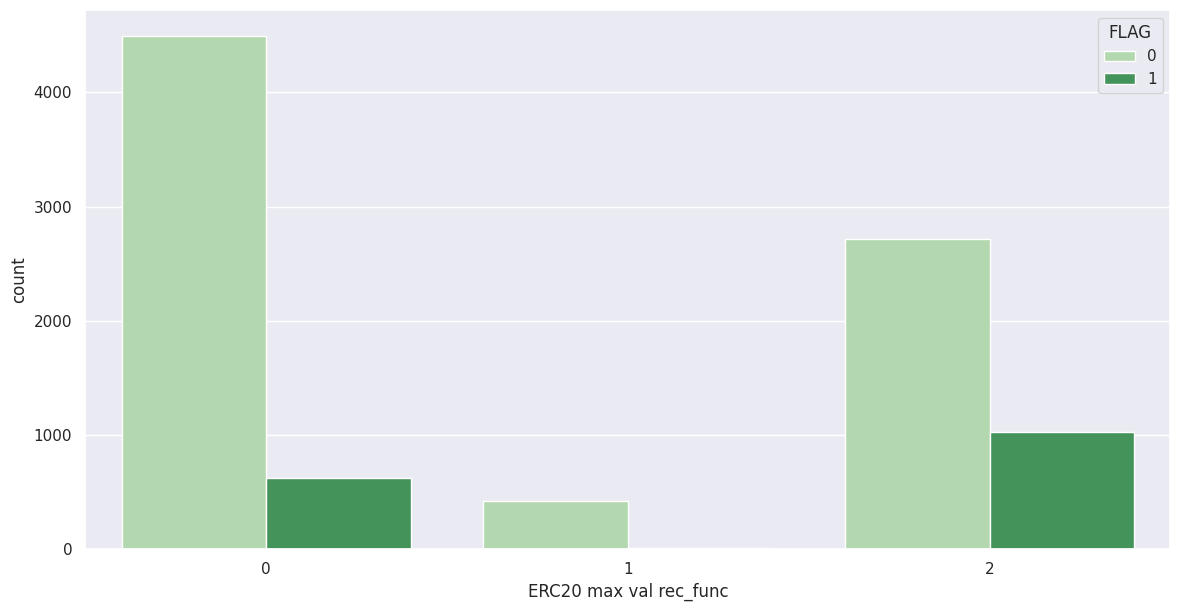

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='ERC20 max val rec_func', hue='FLAG', palette='Greens')
plt.show()

###ERC20 avg val rec

Average value in Ether received from ERC20 token transactions for account. We category it as below:

> [0] No ETH received

> [1] Small amount ETH received

> [2] Large amount ETH received

In [ ]:
df_EDA['ERC20 avg val rec'].describe()

count    9.288000e+03
mean     4.217025e+06
std      2.109148e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.027021e+01
max      1.724181e+10
Name: ERC20 avg val rec, dtype: float64

In [ ]:
def ERC20_rec_avg_val(row):
  if row['ERC20 avg val rec'] == 0:
    return 0 #No ETH received
  elif row['ERC20 avg val rec'] > 0 and row['ERC20 avg val rec'] <= 0.2027:
    return 1 #Small amount
  else:
    return 2 #Large amount

df_EDA['ERC20 avg val rec_func'] = df_EDA.apply(ERC20_rec_avg_val, axis=1)
df_EDA['ERC20 avg val rec_func'].value_counts()

0    5125
2    3989
1     174
Name: ERC20 avg val rec_func, dtype: int64

In [ ]:
pd.crosstab(df_EDA.FLAG, df_EDA['ERC20 avg val rec_func'], margins='True', margins_name='Total')

ERC20 avg val rec_func     0    1     2  Total
FLAG                                          
0                       4502  171  2959   7632
1                        623    3  1030   1656
Total                   5125  174  3989   9288

####Comparison of FLAG based on ERC20 avg val rec

In [ ]:
ERC20_AVG_REC = pd.crosstab(df_EDA.FLAG, [df_EDA['ERC20 avg val rec_func']], normalize='columns')
ERC20_AVG_REC['baseline'] = baseline
ERC20_AVG_REC = ERC20_AVG_REC.iloc[:2,]
ERC20_AVG_REC.style.apply(lambda x: ['background: green' if v > x.iloc[len(ERC20_AVG_REC.columns)-1] else '' for v in x], axis=1)

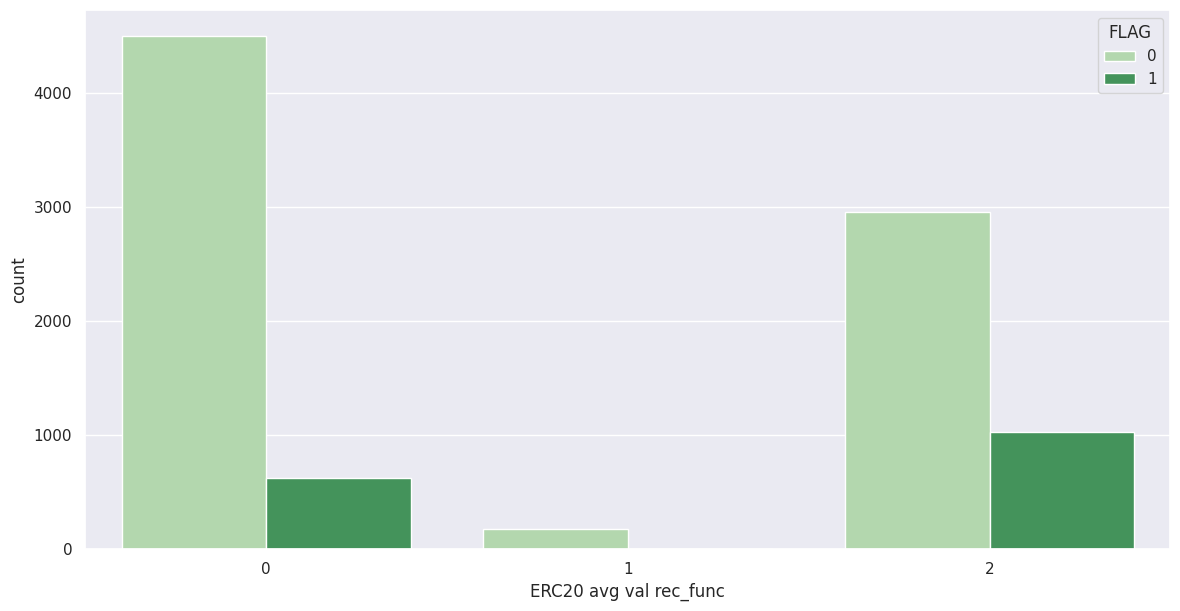

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='ERC20 avg val rec_func', hue='FLAG', palette='Greens')
plt.show()

###ERC20 uniq rec token name

Number of Unique ERC20 tokens received. We category it as below:

[0] No ERC20 token received

[1] Small amount ERC20 token received

[2] Medium amount ERC20 token received

[3] Large amount ERC20 token received

In [ ]:
df_EDA['ERC20 uniq rec token name'].describe()

count    9288.000000
mean        4.698751
std        16.417441
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max       737.000000
Name: ERC20 uniq rec token name, dtype: float64

In [ ]:
def ERC20_rec_token_name(row):
  if row['ERC20 uniq rec token name'] == 0:
    return 0 #No ERC20 token received
  elif row['ERC20 uniq rec token name'] > 0 and row['ERC20 uniq rec token name'] <= 1:
    return 1 #Small amount ERC20 token
  elif row['ERC20 uniq rec token name'] > 1 and row['ERC20 uniq rec token name'] <= 2:
    return 2 #Medium amount ERC20 token
  else:
    return 3 #Large amount ERC20 token

df_EDA['ERC20 uniq rec token name_func'] = df_EDA.apply(ERC20_rec_token_name, axis=1)
df_EDA['ERC20 uniq rec token name_func'].value_counts()

0    4423
3    2169
1    1770
2     926
Name: ERC20 uniq rec token name_func, dtype: int64

In [ ]:
pd.crosstab(df['FLAG'], df_EDA['ERC20 uniq rec token name_func'], margins='True', margins_name='Total')

ERC20 uniq rec token name_func     0     1    2     3  Total
FLAG                                                        
0                               4403   602  741  1886   7632
1                                 20  1168  185   283   1656
Total                           4423  1770  926  2169   9288

####Comparison of FLAG based on ERC20 uniq rec token name

In [ ]:
ERC20_UNIQ_NAME_REC = pd.crosstab(df_EDA.FLAG, [df_EDA['ERC20 uniq rec token name_func']], normalize='columns')
ERC20_UNIQ_NAME_REC['baseline'] = baseline
ERC20_UNIQ_NAME_REC = ERC20_UNIQ_NAME_REC.iloc[:2,]
ERC20_UNIQ_NAME_REC.style.apply(lambda x: ['background: green' if v > x.iloc[len(ERC20_UNIQ_NAME_REC.columns)-1] else '' for v in x], axis=1)

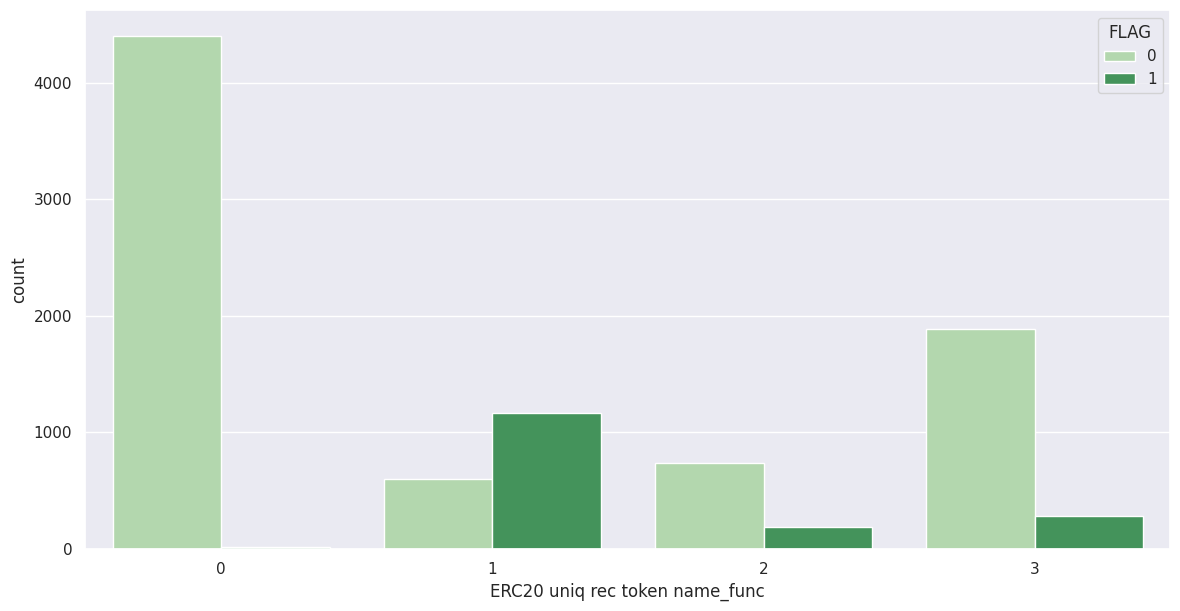

In [ ]:
# Bar chart
plt.subplots(figsize=(14, 7))
sns.countplot(data=df_EDA, x='ERC20 uniq rec token name_func', hue='FLAG', palette='Greens')
plt.show()

##Other EDAs

In [ ]:
'''What is the comparison between the average value of Ether sent by an address and the average
 value of Ether received by the particular address in a specific period of time?'''
comparison_avg_transaction = (df_EDA
            .groupby(['Time Diff between first and last (Mins)_func', 'FLAG']) 
            .agg(avg_eth_sent=('avg val sent','sum'),
                 avg_eth_received=('avg val received','sum'))
            .reset_index()
            .sort_values('FLAG',ascending=False)
            )
comparison_avg_transaction

Time Diff between first and last (Mins)_func  FLAG   avg_eth_sent  \
1                                             0     1       2.504477   
3                                             1     1   18038.034703   
5                                             2     1   16737.632230   
7                                             3     1     660.552457   
0                                             0     0       9.997800   
2                                             1     0  337767.737261   
4                                             2     0   19833.445791   
6                                             3     0   45006.798507   

   avg_eth_received  
1      40010.089630  
3      32689.664895  
5        355.779153  
7       6348.549369  
0         75.906435  
2     840453.906641  
4      22355.761356  
6      46108.809494

In [ ]:
# What is the difference between the wallet addresses that have made ETH transactions sent and received on total transactions based on fraud classification?
total_transaction = (df_EDA
            .groupby(['total transactions_func', 'FLAG']) 
            .agg(uniq_rec_add=('Unique Received From Addresses','sum'),
                 uniq_sent_add=('Unique Sent To Addresses','sum'))
            .reset_index()
            .sort_values('FLAG',ascending=False)
            )
total_transaction

total transactions_func  FLAG  uniq_rec_add  uniq_sent_add
0                        0     1             0              0
2                        1     1          2656           1123
4                        2     1          8951           2190
6                        3     1         15577           3857
1                        1     0          6299           7429
3                        2     0          8288           8868
5                        3     0        256866         230619

In [ ]:
# What is the average median (minimum, maximum, average) value sent based on the min value sent to contract?
top_min_contract_value_sent = (df_EDA
            .groupby('min value sent to contract') 
            .agg(med_MinValSent=('min val sent','median'),
                 med_MaxValSent=('max val sent','median'),
                 med_ValSents=('avg val sent','median'))
            .reset_index()
            .sort_values('med_ValSents',ascending=False)
            )
top_min_contract_value_sent

min value sent to contract  med_MinValSent  med_MaxValSent  med_ValSents
1                        0.01        0.000000      355.650079      2.373059
0                        0.00        0.082224        6.195797      1.999538
2                        0.02        0.000000       16.000000      1.130874

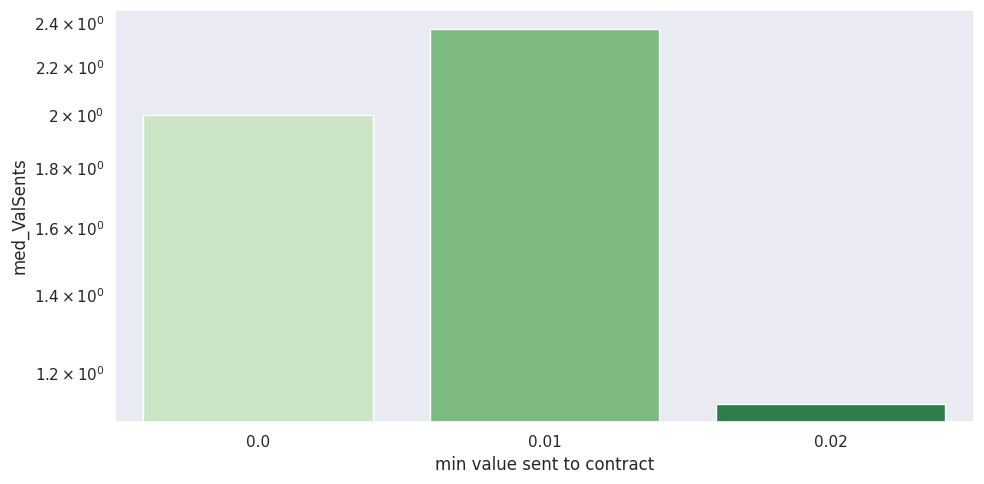

In [ ]:
# Visualize it on bar chart
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.barplot(data=top_min_contract_value_sent, x='min value sent to contract', y='med_ValSents', palette='Greens')
ax.set_yscale('log')
plt.tight_layout()
plt.show()

In [ ]:
# What is the average median (minimum, maximum, average) value sent based on each FLAG?
top_flag_value_sent = (df_EDA
            .groupby('FLAG') 
            .agg(med_MinValSent=('min val sent','median'),
                 med_MaxValSent=('max val sent','median'),
                 med_ValSents=('avg val sent','median'))
            .reset_index()
            .sort_values('med_ValSents',ascending=False)
            )
top_flag_value_sent

FLAG  med_MinValSent  med_MaxValSent  med_ValSents
0     0        0.056015        9.723280      2.311117
1     1        0.300000        2.269003      1.286757

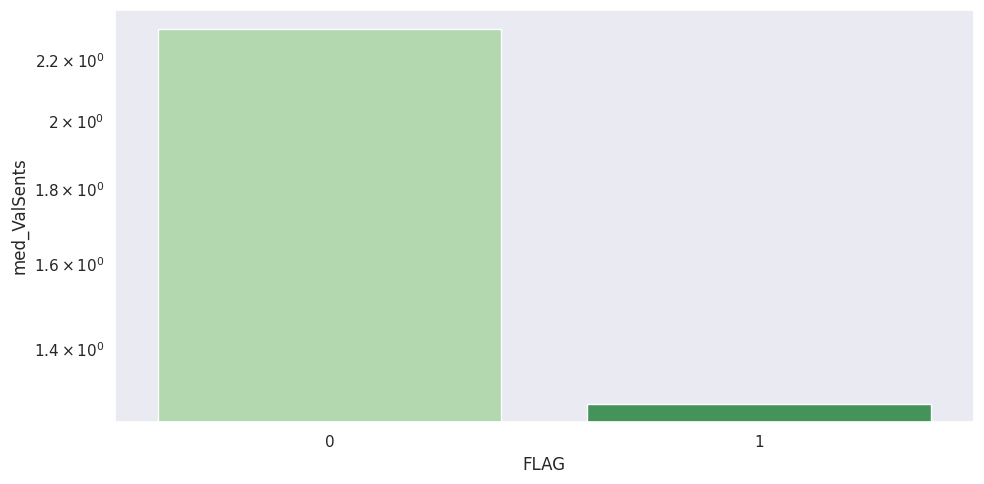

In [ ]:
# Visualize it on bar chart
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.barplot(data=top_flag_value_sent, x='FLAG', y='med_ValSents', palette='Greens')
ax.set_yscale('log')
plt.tight_layout()
plt.show()

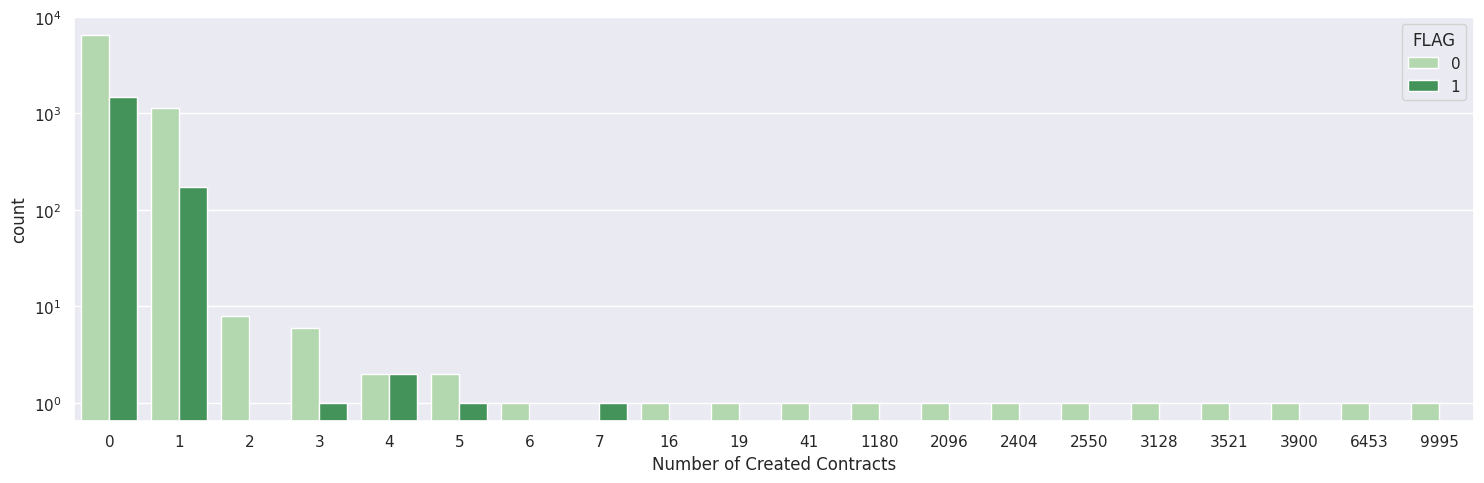

In [ ]:
#Create bin in chart to see Number of Created Contracts vs. FLAG visualization
fig, ax = plt.subplots(1,1, figsize=(15, 5))
sns.countplot(data=df_EDA, x='Number of Created Contracts', hue='FLAG', palette='Greens')

ax.set_yscale('log')
plt.tight_layout()
plt.show()

#Modelling

Here we consider using precision, recall, and F1 score due to data imbalance, but we will be more strict about using recall (the results should not be small).

In [ ]:
# Install skplt to see ROC AUC in the later
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt

We can use a cross-validation score as an evaluation method, but it is important to note that highly unbalanced datasets may produce inaccurate results using cross-validation since it does not specifically account for this imbalance.

Therefore, techniques such as **Stratified K-Fold Cross-Validation** are used to ensure that each fold has a balanced proportion of labels, thereby addressing this issue.

In [ ]:
# Cross Validation
# Set the number of folds for StratifiedKFold
n_splits = 10

# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [ ]:
# Make function to see the result
def evaluate(MODEL, X_TEST, Y_TEST, X_TRAIN, Y_TRAIN):
    y_pred_train = MODEL.predict(X_TRAIN)
    print('======= Data Train =======')
    print('Accuracy Data Train:', accuracy_score(Y_TRAIN, y_pred_train))
    print('\033[1m\033[92mAUC Data Train:\033[0m', roc_auc_score(Y_TRAIN, y_pred_train))
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(Y_TRAIN, y_pred_train))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(Y_TRAIN, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('\033[1m\033[92mPrecision Data Train:\033[0m', precision)
    print('\033[1m\033[92mRecall Data Train:\033[0m', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))
    
    y_pred = MODEL.predict(X_TEST)
    print('\n======= Data Test =======')
    print('Accuracy Data Test:', accuracy_score(Y_TEST, y_pred))
    print('\033[1m\033[92mAUC Data Test:\033[0m', roc_auc_score(Y_TEST, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(Y_TEST, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(Y_TEST, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('\033[1m\033[92mPrecision Data Test:\033[0m', precision)
    print('\033[1m\033[92mRecall Data Test:\033[0m', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

##Without GridSearchCV

###Normalization Data

In [ ]:
df_normalization.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9288 entries, 0 to 9840
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   FLAG                             9288 non-null   int64  
 1   Avg min between sent tnx         9288 non-null   float64
 2   Avg min between received tnx     9288 non-null   float64
 3   Sent tnx                         9288 non-null   float64
 4   Received Tnx                     9288 non-null   float64
 5   Number of Created Contracts      9288 non-null   float64
 6   Unique Received From Addresses   9288 non-null   float64
 7   min value received               9288 non-null   float64
 8   max value received               9288 non-null   float64
 9   min val sent                     9288 non-null   float64
 10  max val sent                     9288 non-null   float64
 11  min value sent to contract       9288 non-null   float64
 12  max val sent to cont

In [ ]:
# Split dataset from df after normalization
X_normal = df_normalization.drop('FLAG', axis=1)
y_normal = df_normalization['FLAG']

# Split the data into train and test sets using train_test_split
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normal, y_normal, test_size=0.2, random_state=42,  stratify=y_normal)

We use the stratify parameter to ensure that the distribution of data between the train and test data is carried out proportionally based on the class label on the target variable.

####Logistic Regression

In [ ]:
# Define the estimator/model (Logistic Regression) with default parameters
logreg_normal = LogisticRegression()

# Fit and train the classifier and get the training history
logreg_normal.fit(X_train_normal, y_train_normal)

# Instantiate the models
logreg_cv_scores = cross_val_score(logreg_normal, X_normal, y_normal, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('Logistic Regression cross-validation scores:', logreg_cv_scores)
print('Mean score:', np.mean(logreg_cv_scores))

# Evaluate the model on the test data
score = logreg_normal.score(X_test_normal, y_test_normal)
print(f'Score: {score:.4f}')

Logistic Regression cross-validation scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean score: 0.0
Score: 0.8219


In [ ]:
evaluate(logreg_normal, X_test_normal, y_test_normal, X_train_normal, y_train_normal)

======= Data Train =======
Accuracy Data Train: 0.8216689098250336
AUC Data Train: 0.5
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      6105
           1       0.00      0.00      0.00      1325

    accuracy                           0.82      7430
   macro avg       0.41      0.50      0.45      7430
weighted avg       0.68      0.82      0.74      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 0
True Negative: 6105
False Positive: 0
False Negative: 1325

Precision Data Train: nan
Recall Data Train: 0.0
F1-Score Data Train: nan

======= Data Test =======
Accuracy Data Test: 0.8218514531754575
AUC Data Test: 0.5
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1527
           1       0.00      0.00      0.00       331

    accuracy                           0.82      1858
   macro avg  

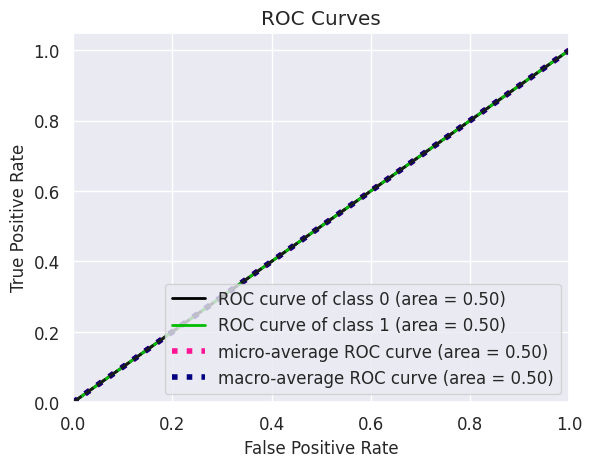

In [ ]:
#ROC AUC Curve
skplt.metrics.plot_roc(y_test_normal,logreg_normal.predict_proba(X_test_normal))
plt.show()

####K-NN

In [ ]:
# Define the estimator/model (K-NN) with default parameters
knn_clf_normal = KNeighborsClassifier()

# Fit and train the classifier and get the training history
knn_clf_normal.fit(X_train_normal, y_train_normal)

# Instantiate the models
knn_cv_scores = cross_val_score(knn_clf_normal, X_normal, y_normal, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('K-NN cross-validation scores:', knn_cv_scores)
print('Mean score:', np.mean(knn_cv_scores))

# Evaluate the model on the test data
score = knn_clf_normal.score(X_test_normal, y_test_normal)
print(f'Score: {score:.4f}')

K-NN cross-validation scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean score: 0.0
Score: 0.8219


In [ ]:
evaluate(knn_clf_normal, X_test_normal, y_test_normal, X_train_normal, y_train_normal)

======= Data Train =======
Accuracy Data Train: 0.8216689098250336
AUC Data Train: 0.5
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      6105
           1       0.00      0.00      0.00      1325

    accuracy                           0.82      7430
   macro avg       0.41      0.50      0.45      7430
weighted avg       0.68      0.82      0.74      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 0
True Negative: 6105
False Positive: 0
False Negative: 1325

Precision Data Train: nan
Recall Data Train: 0.0
F1-Score Data Train: nan

======= Data Test =======
Accuracy Data Test: 0.8218514531754575
AUC Data Test: 0.5
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1527
           1       0.00      0.00      0.00       331

    accuracy                           0.82      1858
   macro avg  

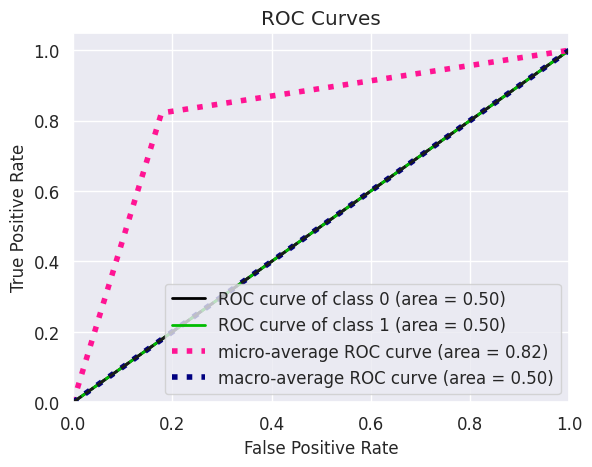

In [ ]:
#ROC AUC Curve
skplt.metrics.plot_roc(y_test_normal,knn_clf_normal.predict_proba(X_test_normal))
plt.show()

###Data without Normalization

In [ ]:
# Split dataset from df
X = df.drop('FLAG', axis=1)
y = df['FLAG']

# Split the data into train and test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

####XGBoost Classifier

In [ ]:
# Define the estimator/model (XGBoost (Extreme Gradient Boosting) Classifier) with default parameters
xgbt_model = XGBClassifier()

# Fit and train the classifier and get the training history
xgbt_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='logloss', verbose=False)

# Instantiate the models
xgb_cv_scores = cross_val_score(xgbt_model, X, y, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('XG Boost cross-validation scores:', xgb_cv_scores)
print('Mean score:', np.mean(xgb_cv_scores))

# Evaluate the model on the test data
score = xgbt_model.score(X_test, y_test)
print(f'Score: {score:.4f}')

XG Boost cross-validation scores: [0.96969697 0.96363636 0.93975904 0.95180723 0.92771084 0.97590361
 0.95783133 0.93975904 0.96363636 0.94545455]
Mean score: 0.9535195326761592
Score: 0.9822


In [ ]:
results_xgbt = xgbt_model.evals_result()
results_xgbt

{'validation_0': OrderedDict([('logloss',
               [0.4648289382257179,
                0.3373004032456859,
                0.2548985698943504,
                0.198968931749804,
                0.1571805419041844,
                0.1252455144378571,
                0.10222743058760185,
                0.08565243512071158,
                0.0714901915587194,
                0.06068492255701331,
                0.05218961819439805,
                0.04590249523510442,
                0.04137095646659467,
                0.03725774075828422,
                0.03367004989797417,
                0.03095040360774624,
                0.02914425054556298,
                0.02711463781189008,
                0.02528021061019897,
                0.0238812699934504,
                0.02252319714617427,
                0.02074611688232987,
                0.01945018209089258,
                0.01775439840264826,
                0.01696028621122429,
                0.01614269196612994,
     

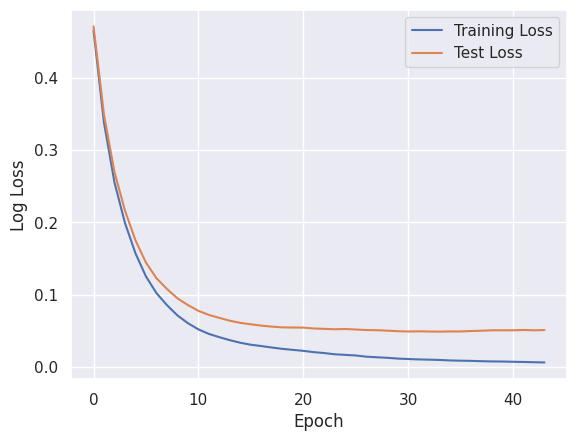

In [ ]:
# Plot the training and validation loss over time
train_loss = results_xgbt['validation_0']['logloss']
test_loss = results_xgbt['validation_1']['logloss']
epochs = len(train_loss)

plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [ ]:
evaluate(xgbt_model, X_test, y_test, X_train, y_train)

======= Data Train =======
Accuracy Data Train: 0.999057873485868
AUC Data Train: 0.9976539489747037
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6105
           1       1.00      1.00      1.00      1325

    accuracy                           1.00      7430
   macro avg       1.00      1.00      1.00      7430
weighted avg       1.00      1.00      1.00      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1319
True Negative: 6104
False Positive: 1
False Negative: 6

Precision Data Train: 0.9992424242424243
Recall Data Train: 0.9954716981132076
F1-Score Data Train: 0.9973534971644613

======= Data Test =======
Accuracy Data Test: 0.9822389666307858
AUC Data Test: 0.9607992687515953
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1527
           1       0.97      0.93      0.95      

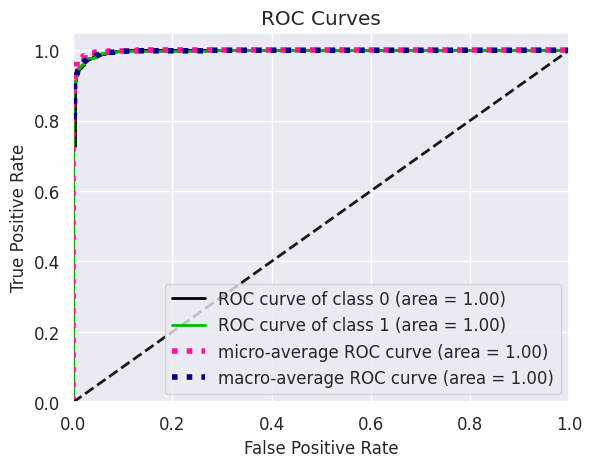

In [ ]:
#ROC AUC Curve
skplt.metrics.plot_roc(y_test,xgbt_model.predict_proba(X_test))
plt.show()

####Decision Tree Classifier

In [ ]:
# Define the estimator/model (Decision Tree Classifier) with default parameters
dt_model = DecisionTreeClassifier()

# Fit and train the classifier and get the training history
dt_model.fit(X_train, y_train)

# Instantiate the models
dt_cv_scores = cross_val_score(dt_model, X, y, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('Decision Tree cross-validation scores:', dt_cv_scores)
print('Mean score:', np.mean(dt_cv_scores))

# Evaluate the model on the test data
score = dt_model.score(X_test, y_test)
print(f'Score: {score:.4f}')

Decision Tree cross-validation scores: [0.87272727 0.90909091 0.87349398 0.90963855 0.85542169 0.89759036
 0.93373494 0.85542169 0.93939394 0.91515152]
Mean score: 0.8961664841182915
Score: 0.9612


In [ ]:
evaluate(dt_model, X_test, y_test, X_train, y_train)

======= Data Train =======
Accuracy Data Train: 1.0
AUC Data Train: 1.0
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6105
           1       1.00      1.00      1.00      1325

    accuracy                           1.00      7430
   macro avg       1.00      1.00      1.00      7430
weighted avg       1.00      1.00      1.00      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1325
True Negative: 6105
False Positive: 0
False Negative: 0

Precision Data Train: 1.0
Recall Data Train: 1.0
F1-Score Data Train: 1.0

======= Data Test =======
Accuracy Data Test: 0.961248654467169
AUC Data Test: 0.9255495739330519
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1527
           1       0.91      0.87      0.89       331

    accuracy                           0.96      1858
   macro avg   

####Random Forest Classifier

In [ ]:
# Define the estimator/model (Random Forest Classifier) with default parameters
rf_model = RandomForestClassifier(random_state=42)

# Fit and train the classifier and get the training history
rf_model.fit(X_train, y_train)

# Instantiate the models
rf_cv_scores = cross_val_score(rf_model, X, y, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('Random Forest cross-validation scores:', rf_cv_scores)
print('Mean score:', np.mean(rf_cv_scores))

# Evaluate the model on the test data
score = rf_model.score(X_test, y_test)
print(f'Score: {score:.4f}')

Random Forest cross-validation scores: [0.95151515 0.96363636 0.89156627 0.91566265 0.87951807 0.94578313
 0.93373494 0.87349398 0.94545455 0.93333333]
Mean score: 0.9233698430083972
Score: 0.9795


In [ ]:
evaluate(rf_model, X_test, y_test, X_train, y_train)

======= Data Train =======
Accuracy Data Train: 1.0
AUC Data Train: 1.0
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6105
           1       1.00      1.00      1.00      1325

    accuracy                           1.00      7430
   macro avg       1.00      1.00      1.00      7430
weighted avg       1.00      1.00      1.00      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1325
True Negative: 6105
False Positive: 0
False Negative: 0

Precision Data Train: 1.0
Recall Data Train: 1.0
F1-Score Data Train: 1.0

======= Data Test =======
Accuracy Data Test: 0.9795479009687836
AUC Data Test: 0.9508801294721201
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1527
           1       0.98      0.91      0.94       331

    accuracy                           0.98      1858
   macro avg  

####Gradient Boosting Classifier

In [ ]:
# Define the estimator/model (Gradient Boosting Classifier) with default parameters
gbt_model = GradientBoostingClassifier()

# Fit and train the classifier and get the training history
gbt_model.fit(X_train, y_train)

# Instantiate the models
gb_cv_scores = cross_val_score(gbt_model, X, y, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('Gradient Boosting cross-validation scores:', xgb_cv_scores)
print('Mean score:', np.mean(xgb_cv_scores))

# Evaluate the model on the test data
score = gbt_model.score(X_test, y_test)
print(f'Score: {score:.4f}')

Gradient Boosting cross-validation scores: [0.96969697 0.96363636 0.93975904 0.95180723 0.92771084 0.97590361
 0.95783133 0.93975904 0.96363636 0.94545455]
Mean score: 0.9535195326761592
Score: 0.9785


In [ ]:
evaluate(gbt_model, X_test, y_test, X_train, y_train)

======= Data Train =======
Accuracy Data Train: 0.9895020188425303
AUC Data Train: 0.977952497952498
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6105
           1       0.98      0.96      0.97      1325

    accuracy                           0.99      7430
   macro avg       0.99      0.98      0.98      7430
weighted avg       0.99      0.99      0.99      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1272
True Negative: 6080
False Positive: 25
False Negative: 53

Precision Data Train: 0.9807247494217425
Recall Data Train: 0.96
F1-Score Data Train: 0.9702517162471396

======= Data Test =======
Accuracy Data Test: 0.9784714747039828
AUC Data Test: 0.9502252506247069
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1527
           1       0.97      0.91      0.94       331

    ac

####LightGBM Classifier

In [ ]:
# Define the estimator/model (LightGBM (Light Gradient Boosting Machine) Classifier) with default parameters
lgbm_clf_model = LGBMClassifier()

# Fit and train the classifier and get the training history
lgbm_clf_model.fit(X_train, y_train,early_stopping_rounds=10, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='logloss', verbose=False)

# Instantiate the models
lgbm_cv_scores = cross_val_score(lgbm_clf_model, X, y, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('Light GBM cross-validation scores:', lgbm_cv_scores)
print('Mean score:', np.mean(lgbm_cv_scores))

# Evaluate the model on the test data
score = lgbm_clf_model.score(X_test, y_test)
print(f'Score: {score:.4f}')

Light GBM cross-validation scores: [0.97575758 0.97575758 0.94578313 0.94578313 0.92771084 0.96987952
 0.95783133 0.94578313 0.96363636 0.94545455]
Mean score: 0.9553377144943409
Score: 0.9822


In [ ]:
results_lgbm = lgbm_clf_model.evals_result_
results_lgbm

{'training': OrderedDict([('binary_logloss',
               [0.3883359382279128,
                0.3356409962165825,
                0.2960327692121144,
                0.2636496546586035,
                0.23690181658899834,
                0.21475170457186624,
                0.1947257846346809,
                0.17678153535464655,
                0.16100669846079893,
                0.14758331807514263,
                0.13520545170573917,
                0.12479296588626203,
                0.11517720868347507,
                0.10659686804216977,
                0.09873612964741943,
                0.09177406322310348,
                0.08532683920735715,
                0.07933679063512598,
                0.07408022137155224,
                0.06914395769047567,
                0.06489726523628445,
                0.06041171736366593,
                0.05643421946963841,
                0.053123541113833134,
                0.049771755613867735,
                0.046743896761146

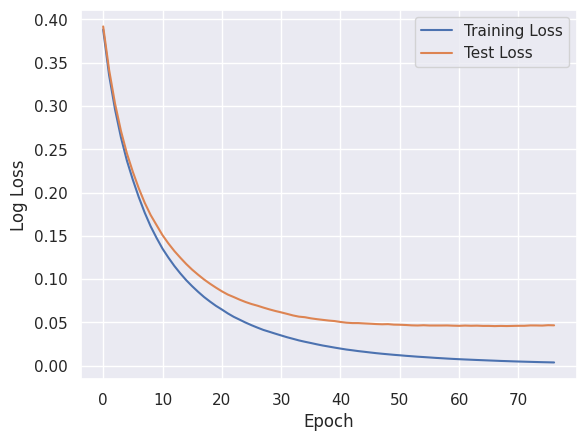

In [ ]:
# Plot the training and validation loss over time
train_loss = results_lgbm['training']['binary_logloss']
test_loss = results_lgbm['valid_1']['binary_logloss']
epochs = len(train_loss)

plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [ ]:
evaluate(lgbm_clf_model, X_test, y_test, X_train, y_train)

======= Data Train =======
Accuracy Data Train: 1.0
AUC Data Train: 1.0
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6105
           1       1.00      1.00      1.00      1325

    accuracy                           1.00      7430
   macro avg       1.00      1.00      1.00      7430
weighted avg       1.00      1.00      1.00      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1325
True Negative: 6105
False Positive: 0
False Negative: 0

Precision Data Train: 1.0
Recall Data Train: 1.0
F1-Score Data Train: 1.0

======= Data Test =======
Accuracy Data Test: 0.9822389666307858
AUC Data Test: 0.9631655379404357
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1527
           1       0.97      0.93      0.95       331

    accuracy                           0.98      1858
   macro avg  

####Cat Boost Classifier

In [ ]:
# Install catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# Create a CatBoostClassifier with logloss as the loss function
cat_clf_model = CatBoostClassifier(loss_function='Logloss', random_seed=42, verbose=False)

# Fit and train the classifier and get the training history
cat_clf_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10)

# Instantiate the models
cb_cv_scores = cross_val_score(cat_clf_model, X, y, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('Cat Boost cross-validation scores:', cb_cv_scores)
print('Mean score:', np.mean(cb_cv_scores))

# Evaluate the model on the test data
score = cat_clf_model.score(X_test, y_test)
print(f'Score: {score:.4f}')

Cat Boost cross-validation scores: [0.96969697 0.95151515 0.93373494 0.95180723 0.92168675 0.95180723
 0.95180723 0.93373494 0.96969697 0.93939394]
Mean score: 0.9474881343556042
Score: 0.9833


In [ ]:
results_cat = cat_clf_model.evals_result_
results_cat

{'learn': {'Logloss': [0.5797354542716716,
   0.49142469423616236,
   0.42386260368581735,
   0.37629695670481167,
   0.3305985283121607,
   0.29958189910586075,
   0.2684812072579264,
   0.24304119567430676,
   0.21962765243711654,
   0.2064809186637281,
   0.19373609748584986,
   0.1800962541114494,
   0.16887570760572582,
   0.16092999793970167,
   0.15212702196251857,
   0.1447090242817637,
   0.13681435755016547,
   0.1297361207039197,
   0.12515781463824543,
   0.12033757151143368,
   0.11544871254476893,
   0.1110891013299046,
   0.10780438537518888,
   0.10487433430609641,
   0.10198255426552483,
   0.09933099484141329,
   0.09638293050799875,
   0.09387275999578651,
   0.09117566176782918,
   0.08938601079426986,
   0.08749529453900719,
   0.08523177183208132,
   0.08370482378663097,
   0.08176300453791749,
   0.0805661865550784,
   0.0786282908099968,
   0.07736232016200494,
   0.07607811454377697,
   0.07468985948043538,
   0.07383485452277012,
   0.07273997455411672,
   0.0

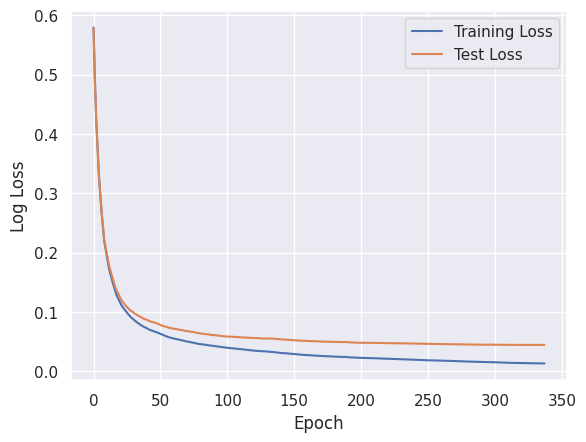

In [ ]:
# Plot the training and validation loss over time
train_loss = results_cat['learn']['Logloss']
test_loss = results_cat['validation']['Logloss']
epochs = len(train_loss)

plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [ ]:
evaluate(cat_clf_model, X_test, y_test, X_train, y_train)

======= Data Train =======
Accuracy Data Train: 0.9987886944818304
AUC Data Train: 0.9974901488109035
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6105
           1       1.00      1.00      1.00      1325

    accuracy                           1.00      7430
   macro avg       1.00      1.00      1.00      7430
weighted avg       1.00      1.00      1.00      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1319
True Negative: 6102
False Positive: 3
False Negative: 6

Precision Data Train: 0.9977307110438729
Recall Data Train: 0.9954716981132076
F1-Score Data Train: 0.9965999244427655

======= Data Test =======
Accuracy Data Test: 0.9833153928955867
AUC Data Test: 0.9614541475990084
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1527
           1       0.98      0.93      0.95     

##With GridSearchCV

In [ ]:
# Use GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV

###Logistic Regression

In [ ]:
# Define the estimator/model (Logistic Regression) with parameters tuning
log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=skf, scoring='recall')

# Fit and train the classifier and get the training history
grid_log_reg.fit(X_train_normal, y_train_normal)

# We automatically get the logistic regression with the best parameters
log_reg = grid_log_reg.best_estimator_

# Instantiate the models
log_reg_score = cross_val_score(log_reg, X_normal, y_normal, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('Logistic Regression cross-validation scores:', log_reg_score)
print('Mean score:', np.mean(log_reg_score))

# Evaluate the model on the test data
score = log_reg.score(X_test_normal, y_test_normal)
print(f'Score: {score:.4f}')

Logistic Regression cross-validation scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean score: 0.0
Score: 0.8219


In [ ]:
# The compact results
cv_result = pd.DataFrame(grid_log_reg.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

params  mean_test_score  rank_test_score
0   {'C': 0.001, 'penalty': 'l1'}              NaN                8
1   {'C': 0.001, 'penalty': 'l2'}              0.0                1
2    {'C': 0.01, 'penalty': 'l1'}              NaN                8
3    {'C': 0.01, 'penalty': 'l2'}              0.0                1
4     {'C': 0.1, 'penalty': 'l1'}              NaN                8
5     {'C': 0.1, 'penalty': 'l2'}              0.0                1
6       {'C': 1, 'penalty': 'l1'}              NaN                8
7       {'C': 1, 'penalty': 'l2'}              0.0                1
8      {'C': 10, 'penalty': 'l1'}              NaN                8
9      {'C': 10, 'penalty': 'l2'}              0.0                1
10    {'C': 100, 'penalty': 'l1'}              NaN                8
11    {'C': 100, 'penalty': 'l2'}              0.0                1
12   {'C': 1000, 'penalty': 'l1'}              NaN                8
13   {'C': 1000, 'penalty': 'l2'}              0.0                1

In [ ]:
evaluate(log_reg, X_test_normal, y_test_normal, X_train_normal, y_train_normal)

======= Data Train =======
Accuracy Data Train: 0.8216689098250336
AUC Data Train: 0.5
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      6105
           1       0.00      0.00      0.00      1325

    accuracy                           0.82      7430
   macro avg       0.41      0.50      0.45      7430
weighted avg       0.68      0.82      0.74      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 0
True Negative: 6105
False Positive: 0
False Negative: 1325

Precision Data Train: nan
Recall Data Train: 0.0
F1-Score Data Train: nan

======= Data Test =======
Accuracy Data Test: 0.8218514531754575
AUC Data Test: 0.5
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1527
           1       0.00      0.00      0.00       331

    accuracy                           0.82      1858
   macro avg  

###K-NN

In [ ]:
# Define the estimator/model (K-NN) with parameters tuning
knears_params = {'n_neighbors': list(range(2,8,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, cv=skf, scoring='recall')

# Fit and train the classifier and get the training history
grid_knears.fit(X_train_normal, y_train_normal)

# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Instantiate the models
knn_score = cross_val_score(knears_neighbors, X_normal, y_normal, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('K-NN cross-validation scores:', knn_score)
print('Mean score:', np.mean(knn_score))

# Evaluate the model on the test data
score = knears_neighbors.score(X_test_normal, y_test_normal)
print(f'Score: {score:.4f}')

K-NN cross-validation scores: [0.88484848 0.91515152 0.87951807 0.89759036 0.89759036 0.89156627
 0.90361446 0.85542169 0.88484848 0.9030303 ]
Mean score: 0.8913179992698064
Score: 0.9682


In [ ]:
# The compact results
cv_result = pd.DataFrame(grid_knears.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

params  mean_test_score  \
0        {'algorithm': 'auto', 'n_neighbors': 2}         0.000000   
1        {'algorithm': 'auto', 'n_neighbors': 3}         0.000000   
2        {'algorithm': 'auto', 'n_neighbors': 4}         0.000000   
3        {'algorithm': 'auto', 'n_neighbors': 5}         0.000000   
4        {'algorithm': 'auto', 'n_neighbors': 6}         0.000000   
5        {'algorithm': 'auto', 'n_neighbors': 7}         0.000000   
6   {'algorithm': 'ball_tree', 'n_neighbors': 2}         0.845301   
7   {'algorithm': 'ball_tree', 'n_neighbors': 3}         0.887537   
8   {'algorithm': 'ball_tree', 'n_neighbors': 4}         0.855833   
9   {'algorithm': 'ball_tree', 'n_neighbors': 5}         0.876208   
10  {'algorithm': 'ball_tree', 'n_neighbors': 6}         0.856568   
11  {'algorithm': 'ball_tree', 'n_neighbors': 7}         0.867903   
12    {'algorithm': 'kd_tree', 'n_neighbors': 2}         0.845301   
13    {'algorithm': 'kd_tree', 'n_neighbors': 3}         0.887537   
14    {'algorithm': 'kd_tree', 'n_neighbors': 4}         0.855833   
15    {'algorithm': 'kd_tree', 'n_neighbors': 5}         0.876208   
16    {'algorithm': 'kd_tree', 'n_neighbors': 6}         0.856568   
17    {'algorithm': 'kd_tree', 'n_neighbors': 7}         0.867903   
18      {'algorithm': 'brute', 'n_neighbors': 2}         0.000000   
19      {'algorithm': 'brute', 'n_neighbors': 3}         0.000000   
20      {'algorithm': 'brute', 'n_neighbors': 4}         0.000000   
21      {'algorithm': 'brute', 'n_neighbors': 5}         0.000000   
22      {'algorithm': 'brute', 'n_neighbors': 6}         0.000000   
23      {'algorithm': 'brute', 'n_neighbors': 7}         0.000000   

    rank_test_score  
0                13  
1                13  
2                13  
3                13  
4                13  
5                13  
6                11  
7                 1  
8                 9  
9                 3  
10                7  
11                5  
12               11  
13                1  
14                9  
15                3  
16                7  
17                5  
18               13  
19               13  
20               13  
21               13  
22               13  
23               13

In [ ]:
evaluate(knears_neighbors, X_test_normal, y_test_normal, X_train_normal, y_train_normal)

======= Data Train =======
Accuracy Data Train: 0.9784656796769852
AUC Data Train: 0.9546910203513975
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6105
           1       0.96      0.92      0.94      1325

    accuracy                           0.98      7430
   macro avg       0.97      0.95      0.96      7430
weighted avg       0.98      0.98      0.98      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1216
True Negative: 6054
False Positive: 51
False Negative: 109

Precision Data Train: 0.9597474348855565
Recall Data Train: 0.9177358490566038
F1-Score Data Train: 0.9382716049382716

======= Data Test =======
Accuracy Data Test: 0.9682454251883746
AUC Data Test: 0.9321725556300785
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1527
           1       0.94      0.88      0.91  

###XGBoost Classifier

In [ ]:
# Define the estimator/model (XGBoost (Extreme Gradient Boosting) Classifier) with parameters tuning
xgb_params = {'objective': ['binary:logistic'], 'max_depth': list(range(2,4,1))}
grid_xgb = GridSearchCV(XGBClassifier(), xgb_params, cv=skf, scoring='recall')

# Fit and train the classifier and get the training history
grid_xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='logloss', verbose=False)

# XGBoost best estimator
xgb_clf = grid_xgb.best_estimator_

# Instantiate the models
xgb_score = cross_val_score(xgb_clf, X, y, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('XGBoost Classifier cross-validation scores:', xgb_score)
print('Mean score:', np.mean(xgb_score))

# Evaluate the model on the test data
score = xgb_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

XGBoost Classifier cross-validation scores: [0.95757576 0.96363636 0.94578313 0.93975904 0.93373494 0.96385542
 0.94578313 0.92771084 0.95757576 0.94545455]
Mean score: 0.9480868930266521
Score: 0.9855


In [ ]:
# The compact results
cv_result = pd.DataFrame(grid_xgb.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

params  mean_test_score  \
0  {'max_depth': 2, 'objective': 'binary:logistic'}         0.941154   
1  {'max_depth': 3, 'objective': 'binary:logistic'}         0.944931   

   rank_test_score  
0                2  
1                1

In [ ]:
results_xgb_clf = xgb_clf.evals_result()
results_xgb_clf

{'validation_0': OrderedDict([('logloss',
               [0.48886508303888715,
                0.3734468995281376,
                0.29713642189472234,
                0.24732063847066255,
                0.21132562896123966,
                0.18578922222011182,
                0.15998651861121646,
                0.14268997858302268,
                0.1297290791139448,
                0.11812526502898452,
                0.10791338477935516,
                0.10041470182207218,
                0.09480571699658381,
                0.08899404913272263,
                0.08368944431790483,
                0.07907118015273312,
                0.07491053108976399,
                0.0703750219190754,
                0.06760441407875921,
                0.06389835312905186,
                0.06085166102601153,
                0.0587180471435079,
                0.05685587976949508,
                0.05496983483993394,
                0.05298443857021379,
                0.05080462280831417,


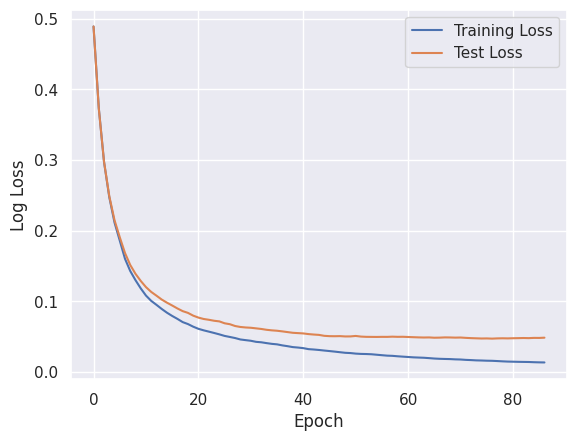

In [ ]:
# Plot the training and validation loss over time
train_loss_clf = results_xgb_clf['validation_0']['logloss']
test_loss_clf = results_xgb_clf['validation_1']['logloss']

epochs_train = len(train_loss_clf)
epochs_test = len(test_loss_clf)

plt.plot(range(epochs_train), train_loss_clf, label='Training Loss')
plt.plot(range(epochs_test), test_loss_clf, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [ ]:
evaluate(xgb_clf, X_test, y_test, X_train, y_train)

======= Data Train =======
Accuracy Data Train: 0.9971736204576043
AUC Data Train: 0.9935527637414431
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6105
           1       1.00      0.99      0.99      1325

    accuracy                           1.00      7430
   macro avg       1.00      0.99      1.00      7430
weighted avg       1.00      1.00      1.00      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1309
True Negative: 6100
False Positive: 5
False Negative: 16

Precision Data Train: 0.9961948249619482
Recall Data Train: 0.9879245283018868
F1-Score Data Train: 0.9920424403183024

======= Data Test =======
Accuracy Data Test: 0.9854682454251884
AUC Data Test: 0.9627639052938349
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1527
           1       0.99      0.93      0.96    

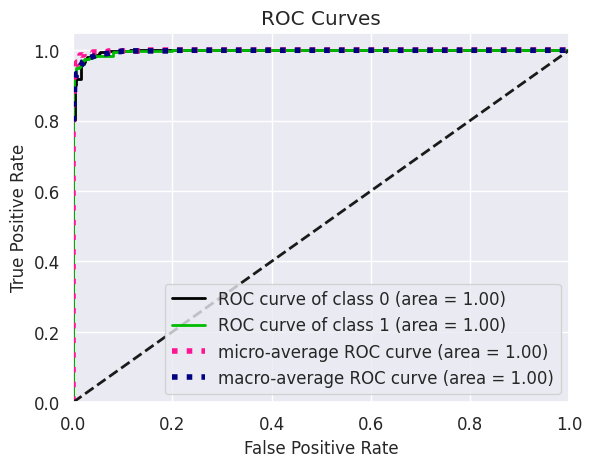

In [ ]:
# ROC AUC Curve
skplt.metrics.plot_roc(y_test,xgb_clf.predict_proba(X_test))
plt.show()

###Decision Tree Classifier

In [ ]:
# Define the estimator/model (Decision Tree Classifier) with parameters tuning
tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(2,4,1)), 
              'min_samples_leaf': list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=skf, scoring='recall')

# Fit and train the classifier and get the training history
grid_tree.fit(X_train, y_train)

# Decision Tree best estimator
dt_clf = grid_tree.best_estimator_

# Instantiate the models
dt_score = cross_val_score(dt_clf, X, y, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('Decision Tree Classifier cross-validation scores:', dt_score)
print('Mean score:', np.mean(dt_score))

# Evaluate the model on the test data
score = dt_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Decision Tree Classifier cross-validation scores: [0.7030303  0.77575758 0.73493976 0.74698795 0.71686747 0.74096386
 0.81325301 0.73493976 0.78181818 0.73939394]
Mean score: 0.7487951807228915
Score: 0.9230


In [ ]:
# The compact results
cv_result = pd.DataFrame(grid_tree.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

params  mean_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.747158   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.747158   
2  {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.738887   
3  {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.738887   
4  {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.747158   
5  {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.747158   
6  {'criterion': 'entropy', 'max_depth': 3, 'min_...         0.681494   
7  {'criterion': 'entropy', 'max_depth': 3, 'min_...         0.681494   

   rank_test_score  
0                1  
1                1  
2                5  
3                5  
4                1  
5                1  
6                7  
7                7

In [ ]:
evaluate(dt_clf, X_test, y_test, X_train, y_train)

======= Data Train =======
Accuracy Data Train: 0.9271870794078062
AUC Data Train: 0.8578953224236244
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6105
           1       0.83      0.75      0.79      1325

    accuracy                           0.93      7430
   macro avg       0.89      0.86      0.87      7430
weighted avg       0.93      0.93      0.93      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 994
True Negative: 5895
False Positive: 210
False Negative: 331

Precision Data Train: 0.8255813953488372
Recall Data Train: 0.750188679245283
F1-Score Data Train: 0.786081455120601

======= Data Test =======
Accuracy Data Test: 0.9230355220667384
AUC Data Test: 0.8537928564786511
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1527
           1       0.81      0.75      0.78    

###Random Forest Classifier

In [ ]:
# Define the estimator/model (Decision Tree Classifier) with parameters tuning
rf_params = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(2,4,1)), 
              'min_samples_leaf': list(range(5,7,1))}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=skf, scoring='recall')

# Fit and train the classifier and get the training history
grid_rf.fit(X_train, y_train)

# RandomForest best estimator
rf_clf = grid_rf.best_estimator_

# Instantiate the models
rf_score = cross_val_score(rf_clf, X, y, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('Random Forest cross-validation scores:', rf_score)
print('Mean score:', np.mean(rf_score))

# Evaluate the model on the test data
score = rf_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Random Forest cross-validation scores: [0.70909091 0.72727273 0.72891566 0.77108434 0.72289157 0.71084337
 0.75903614 0.65662651 0.73333333 0.71515152]
Mean score: 0.723424607520993
Score: 0.9343


In [ ]:
# The compact results
cv_result = pd.DataFrame(grid_rf.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

params  mean_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.289827   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.282280   
2  {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.710207   
3  {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.706419   
4  {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.280662   
5  {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.272408   
6  {'criterion': 'entropy', 'max_depth': 3, 'min_...         0.701145   
7  {'criterion': 'entropy', 'max_depth': 3, 'min_...         0.683772   

   rank_test_score  
0                5  
1                6  
2                1  
3                2  
4                7  
5                8  
6                3  
7                4

In [ ]:
evaluate(rf_clf, X_test, y_test, X_train, y_train)

======= Data Train =======
Accuracy Data Train: 0.9362045760430686
AUC Data Train: 0.8400414136263193
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6105
           1       0.93      0.69      0.79      1325

    accuracy                           0.94      7430
   macro avg       0.94      0.84      0.88      7430
weighted avg       0.94      0.94      0.93      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 915
True Negative: 6041
False Positive: 64
False Negative: 410

Precision Data Train: 0.9346271705822268
Recall Data Train: 0.690566037735849
F1-Score Data Train: 0.7942708333333334

======= Data Test =======
Accuracy Data Test: 0.9343379978471474
AUC Data Test: 0.8299075849215628
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1527
           1       0.95      0.67      0.78    

###Gradient Boosting Classifier

In [ ]:
# Define the estimator/model (Gradient Boosting Classifier) with parameters tuning
gbt_params = {'loss': ['deviance', 'exponential'], 'max_depth': list(range(2,4,1)), 
              'min_samples_leaf': list(range(5,7,1))}
grid_gbt = GridSearchCV(GradientBoostingClassifier(), gbt_params, cv=skf, scoring='recall')

# Fit and train the classifier and get the training history
grid_gbt.fit(X_train, y_train)

# GBT best estimator
gbt_clf = grid_gbt.best_estimator_

# Instantiate the models
gbt_score = cross_val_score(gbt_clf, X, y, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('Gradient Boosting cross-validation scores:', gbt_score)
print('Mean score:', np.mean(gbt_score))

# Evaluate the model on the test data
score = gbt_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Gradient Boosting cross-validation scores: [0.96969697 0.93939394 0.93373494 0.93975904 0.90963855 0.95180723
 0.93975904 0.90963855 0.94545455 0.92121212]
Mean score: 0.9360094925155167
Score: 0.9790


In [ ]:
# The compact results
cv_result = pd.DataFrame(grid_gbt.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

params  mean_test_score  \
0  {'loss': 'deviance', 'max_depth': 2, 'min_samp...         0.913198   
1  {'loss': 'deviance', 'max_depth': 2, 'min_samp...         0.910185   
2  {'loss': 'deviance', 'max_depth': 3, 'min_samp...         0.929067   
3  {'loss': 'deviance', 'max_depth': 3, 'min_samp...         0.931334   
4  {'loss': 'exponential', 'max_depth': 2, 'min_s...         0.909433   
5  {'loss': 'exponential', 'max_depth': 2, 'min_s...         0.907166   
6  {'loss': 'exponential', 'max_depth': 3, 'min_s...         0.930571   
7  {'loss': 'exponential', 'max_depth': 3, 'min_s...         0.926800   

   rank_test_score  
0                5  
1                6  
2                3  
3                1  
4                7  
5                8  
6                2  
7                4

In [ ]:
evaluate(gbt_clf, X_test, y_test, X_train, y_train)

======= Data Train =======
Accuracy Data Train: 0.9903095558546433
AUC Data Train: 0.9790348152612305
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6105
           1       0.98      0.96      0.97      1325

    accuracy                           0.99      7430
   macro avg       0.99      0.98      0.98      7430
weighted avg       0.99      0.99      0.99      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1274
True Negative: 6084
False Positive: 21
False Negative: 51

Precision Data Train: 0.9837837837837838
Recall Data Train: 0.9615094339622642
F1-Score Data Train: 0.9725190839694656

======= Data Test =======
Accuracy Data Test: 0.9790096878363832
AUC Data Test: 0.9505526900484135
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1527
           1       0.97      0.91      0.94   

###LightGBM Classifier

In [ ]:
%%time
# Define the estimator/model (LightGBM (Light Gradient Boosting Machine) Classifier) with parameters tuning
lgbm_params = {'num_leaves': list(range(20, 50, 5)), 'learning_rate': [0.01, 0.1, 1.0], 
               'max_depth': [-1, 5, 10], 'n_estimators': [100, 500, 1000]}
grid_lgbm = GridSearchCV(LGBMClassifier(), lgbm_params, cv=skf, scoring='recall')

# Fit and train the classifier and get the training history
grid_lgbm.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='logloss', verbose=False)

# LGBM best estimator
lgbm_clf = grid_lgbm.best_estimator_

# Instantiate the models
lgbm_score = cross_val_score(lgbm_clf, X, y, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('Light GBM cross-validation scores:', lgbm_score)
print('Mean score:', np.mean(lgbm_score))

# Evaluate the model on the test data
score = lgbm_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Light GBM cross-validation scores: [0.95757576 0.96969697 0.94578313 0.94578313 0.92168675 0.96987952
 0.95783133 0.93975904 0.96363636 0.93333333]
Mean score: 0.950496531580869
Score: 0.9839
CPU times: user 24min 8s, sys: 24.2 s, total: 24min 32s
Wall time: 13min 34s


In [ ]:
# The compact results
cv_result = pd.DataFrame(grid_lgbm.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values(by='rank_test_score')

params  mean_test_score  \
54  {'learning_rate': 0.1, 'max_depth': -1, 'n_est...         0.944184   
66  {'learning_rate': 0.1, 'max_depth': -1, 'n_est...         0.944184   
60  {'learning_rate': 0.1, 'max_depth': -1, 'n_est...         0.944184   
14  {'learning_rate': 0.01, 'max_depth': -1, 'n_es...         0.944162   
99  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...         0.944162   
..                                                ...              ...   
19  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.806015   
20  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.806015   
21  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.806015   
22  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.806015   
23  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...         0.806015   

    rank_test_score  
54                1  
66                1  
60                1  
14                4  
99                5  
..              ...  
19              157  
20              157  
21              157  
22              157  
23              157  

[162 rows x 3 columns]

In [ ]:
results_lgbm = lgbm_clf.evals_result_
results_lgbm

{'training': OrderedDict([('binary_logloss',
               [0.39069546342394623,
                0.33920584183337077,
                0.3007887148146332,
                0.27008068525165796,
                0.2429911011252456,
                0.22117212095096897,
                0.2010891870365379,
                0.18375132566407665,
                0.16891879893855988,
                0.15586694281537716,
                0.14381753793022367,
                0.13361080471866071,
                0.12421568844248997,
                0.11587084068806348,
                0.10814795710800176,
                0.10109770984155819,
                0.09495421699319123,
                0.08965054503857223,
                0.08435138151359359,
                0.0799208221373784,
                0.07515091948529758,
                0.07102925487120931,
                0.06710015319699655,
                0.06370596271453202,
                0.06039877322268151,
                0.0567888832208925

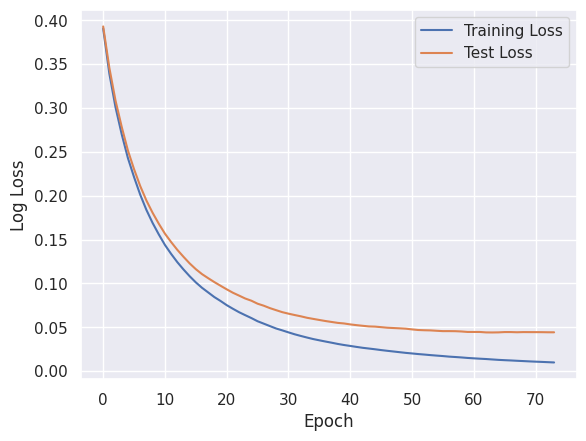

In [ ]:
# Plot the training and validation loss over time
train_loss = results_lgbm['training']['binary_logloss']
test_loss = results_lgbm['valid_1']['binary_logloss']
epochs = len(train_loss)

plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [ ]:
evaluate(lgbm_clf, X_test, y_test, X_train, y_train)

======= Data Train =======
Accuracy Data Train: 0.9986541049798116
AUC Data Train: 0.9971127903203375
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6105
           1       1.00      0.99      1.00      1325

    accuracy                           1.00      7430
   macro avg       1.00      1.00      1.00      7430
weighted avg       1.00      1.00      1.00      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1318
True Negative: 6102
False Positive: 3
False Negative: 7

Precision Data Train: 0.9977289931869796
Recall Data Train: 0.9947169811320755
F1-Score Data Train: 0.9962207105064248

======= Data Test =======
Accuracy Data Test: 0.9838536060279871
AUC Data Test: 0.9641478562115554
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1527
           1       0.97      0.93      0.95     

###Cat Boost Classifier

In [ ]:
%%time
# Define the estimator/model (Cat Boosting Classifier) with parameters tuning
catboost_params = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 8], 'iterations': [500, 1000]}
catboost_grid = GridSearchCV(CatBoostClassifier(verbose=False), catboost_params, cv=skf, scoring='recall')

# Fit and train the classifier and get the training history
catboost_grid.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10)

# Catboost best estimator
cat_clf = catboost_grid.best_estimator_

# Print best parameters and score
print('Best parameters:', catboost_grid.best_params_)
print('Best score:', catboost_grid.best_score_)

# Instantiate the models
cb_score = cross_val_score(cat_clf, X, y, cv=skf, scoring='recall')

# Print the cross-validation scores (overfitting case)
print('Cat Boost cross-validation scores:', cb_score)
print('Mean score:', np.mean(cb_score))

# Evaluate the model on the test data
score = cat_clf.score(X_test, y_test)
print(f'Score: {score:.4f}')

Best parameters: {'depth': 4, 'iterations': 500, 'learning_rate': 0.1}
Best score: 0.940390749601276
Cat Boost cross-validation scores: [0.96969697 0.95151515 0.93975904 0.95180723 0.92168675 0.96987952
 0.95180723 0.93373494 0.96969697 0.93939394]
Mean score: 0.9498977729098211
Score: 0.9849
CPU times: user 9min 9s, sys: 34.9 s, total: 9min 44s
Wall time: 5min 43s


In [ ]:
# The compact results
cv_result = pd.DataFrame(catboost_grid.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

params  mean_test_score  \
0   {'depth': 4, 'iterations': 500, 'learning_rate...         0.935105   
1   {'depth': 4, 'iterations': 500, 'learning_rate...         0.940391   
2   {'depth': 4, 'iterations': 1000, 'learning_rat...         0.937360   
3   {'depth': 4, 'iterations': 1000, 'learning_rat...         0.940391   
4   {'depth': 6, 'iterations': 500, 'learning_rate...         0.938124   
5   {'depth': 6, 'iterations': 500, 'learning_rate...         0.938124   
6   {'depth': 6, 'iterations': 1000, 'learning_rat...         0.938876   
7   {'depth': 6, 'iterations': 1000, 'learning_rat...         0.938124   
8   {'depth': 8, 'iterations': 500, 'learning_rate...         0.937360   
9   {'depth': 8, 'iterations': 500, 'learning_rate...         0.938904   
10  {'depth': 8, 'iterations': 1000, 'learning_rat...         0.937360   
11  {'depth': 8, 'iterations': 1000, 'learning_rat...         0.938904   

    rank_test_score  
0                12  
1                 1  
2                11  
3                 1  
4                 6  
5                 6  
6                 5  
7                 6  
8                 9  
9                 3  
10                9  
11                3

In [ ]:
results_cat = cat_clf.evals_result_
results_cat

{'learn': {'Logloss': [0.5349850125360136,
   0.4266228871582976,
   0.35183963221934195,
   0.298979331986931,
   0.264320466631314,
   0.23024428144678935,
   0.20132893478375025,
   0.18452253996082463,
   0.17153022001832122,
   0.15961404582648506,
   0.14805128857327943,
   0.1412586122909172,
   0.1353266450385958,
   0.12960448654576595,
   0.12474283349316713,
   0.11922543697130601,
   0.11645573901606682,
   0.1138382987814929,
   0.11082975142726281,
   0.10735874375529603,
   0.10351715820545675,
   0.1013076255444881,
   0.09829888439121183,
   0.09584951979988085,
   0.09480724993204474,
   0.09358170796608775,
   0.08907522043118613,
   0.08587681878668985,
   0.08433888063347406,
   0.08183765023276786,
   0.08018996857747832,
   0.07894173553179007,
   0.07794384099508625,
   0.07627801353119384,
   0.07522137044433223,
   0.07421096941797141,
   0.0736612955021796,
   0.0724369672326682,
   0.07150716301696788,
   0.07058270827473503,
   0.06886207360616342,
   0.067

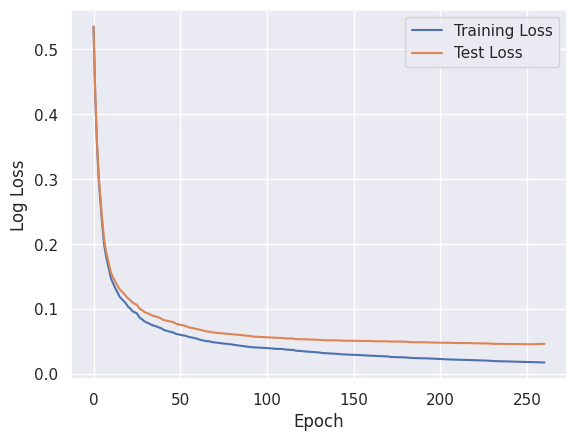

In [ ]:
# Plot the training and validation loss over time
train_loss = results_cat['learn']['Logloss']
test_loss = results_cat['validation']['Logloss']
epochs = len(train_loss)

plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [ ]:
evaluate(cat_clf, X_test, y_test, X_train, y_train)

======= Data Train =======
Accuracy Data Train: 0.9966352624495289
AUC Data Train: 0.9929297050051767
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6105
           1       0.99      0.99      0.99      1325

    accuracy                           1.00      7430
   macro avg       1.00      0.99      0.99      7430
weighted avg       1.00      1.00      1.00      7430

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1308
True Negative: 6097
False Positive: 8
False Negative: 17

Precision Data Train: 0.993920972644377
Recall Data Train: 0.9871698113207548
F1-Score Data Train: 0.9905338886785309

======= Data Test =======
Accuracy Data Test: 0.984930032292788
AUC Data Test: 0.9624364658701283
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1527
           1       0.99      0.93      0.96      

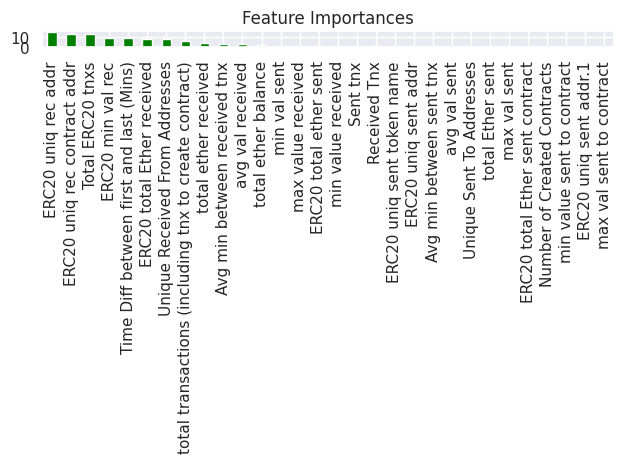

In [ ]:
from sklearn.inspection import permutation_importance

importances = catboost_grid.best_estimator_.feature_importances_

fig, ax = plt.subplots()

list_independent_variables = X.columns
cat_importances = pd.Series(importances, index=list_independent_variables).sort_values(ascending=False)

cat_importances.plot.bar(ax=ax, color='green')
ax.set_title('Feature Importances')
fig.tight_layout()
plt.show()

##Training Learning Cure

In [ ]:
# Import libraries
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [ ]:
# Plot Learning Curve For Logistic Regression and K-NN
def plot_learning_curve1(estimator1, estimator2, X_normal, y_normal, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20,5), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X_normal, y_normal, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='#ff9124')
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='#008000')
    ax1.plot(train_sizes, train_scores_mean, 'o-', color='#ff9124',
             label='Training score')
    ax1.plot(train_sizes, test_scores_mean, 'o-', color='#008000',
             label='Cross-validation score')
    ax1.set_title('Logistic Regression Learning Curve', fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc='best')
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X_normal, y_normal, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='#ff9124')
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='#008000')
    ax2.plot(train_sizes, train_scores_mean, 'o-', color='#ff9124',
             label='Training score')
    ax2.plot(train_sizes, test_scores_mean, 'o-', color='#008000',
             label='Cross-validation score')
    ax2.set_title('Knears Neighbors Learning Curve', fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc='best')
   
    return plt

In [ ]:
# Plot Learning Curve For Tree Based Model
def plot_learning_curve2(estimator1, estimator2, estimator3, estimator4, estimator5, estimator6, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20,19), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='#ff9124')
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='#008000')
    ax1.plot(train_sizes, train_scores_mean, 'o-', color='#ff9124',
             label='Training score')
    ax1.plot(train_sizes, test_scores_mean, 'o-', color='#008000',
             label='Cross-validation score')
    ax1.set_title('XG Boosting Learning Curve', fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc='best')
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='#ff9124')
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='#008000')
    ax2.plot(train_sizes, train_scores_mean, 'o-', color='#ff9124',
             label='Training score')
    ax2.plot(train_sizes, test_scores_mean, 'o-', color='#008000',
             label='Cross-validation score')
    ax2.set_title('Decision Tree Learning Curve', fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc='best')
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='#ff9124')
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='#008000')
    ax3.plot(train_sizes, train_scores_mean, 'o-', color='#ff9124',
             label='Training score')
    ax3.plot(train_sizes, test_scores_mean, 'o-', color='#008000',
             label='Cross-validation score')
    ax3.set_title('Random Forest Learning Curve', fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc='best')
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='#ff9124')
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='#008000')
    ax4.plot(train_sizes, train_scores_mean, 'o-', color='#ff9124',
             label='Training score')
    ax4.plot(train_sizes, test_scores_mean, 'o-', color='#008000',
             label='Cross-validation score')
    ax4.set_title('Gradient Boosting Classifier Learning Curve', fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc='best')

    # Fifth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator5, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax5.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='#ff9124')
    ax5.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='#008000')
    ax5.plot(train_sizes, train_scores_mean, 'o-', color='#ff9124',
             label='Training score')
    ax5.plot(train_sizes, test_scores_mean, 'o-', color='#008000',
             label='Cross-validation score')
    ax5.set_title('LightGBM Learning Curve', fontsize=14)
    ax5.set_xlabel('Training size (m)')
    ax5.set_ylabel('Score')
    ax5.grid(True)
    ax5.legend(loc='best')
    
    # Sixth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator6, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax6.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='#ff9124')
    ax6.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='#008000')
    ax6.plot(train_sizes, train_scores_mean, 'o-', color='#ff9124',
             label='Training score')
    ax6.plot(train_sizes, test_scores_mean, 'o-', color='#008000',
             label='Cross-validation score')
    ax6.set_title('Catboost Classifier Learning Curve', fontsize=14)
    ax6.set_xlabel('Training size (m)')
    ax6.set_ylabel('Score')
    ax6.grid(True)
    ax6.legend(loc='best')
    
    return plt

CPU times: user 476 ms, sys: 113 ms, total: 589 ms
Wall time: 28.4 s


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

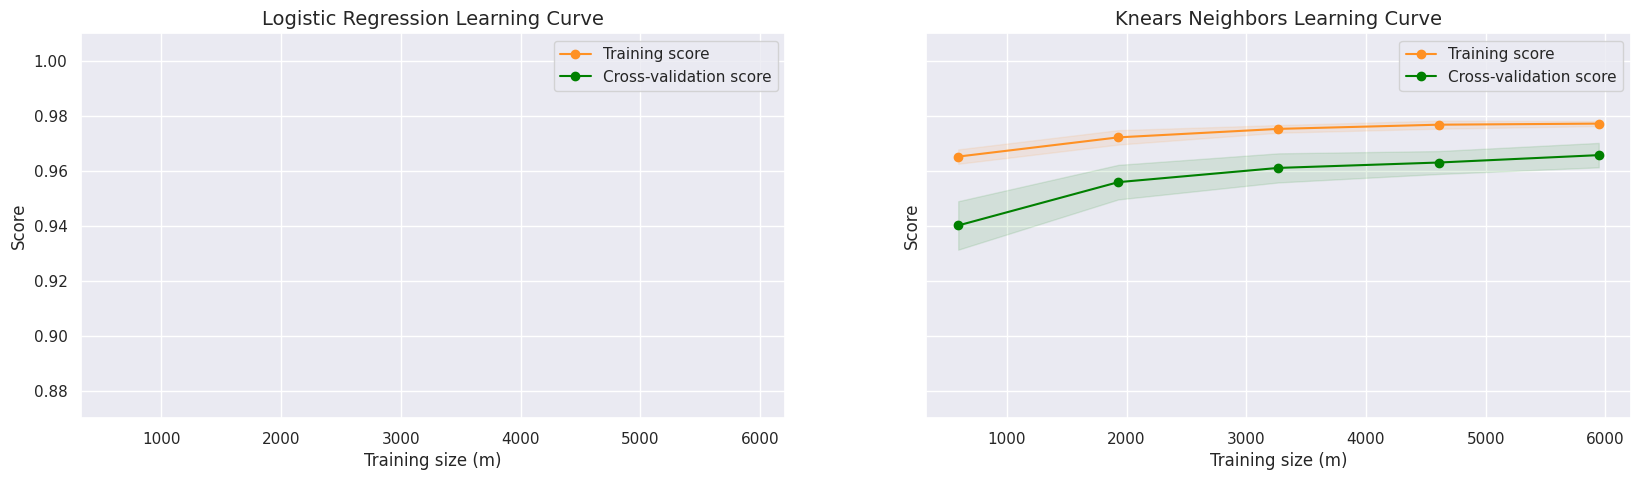

In [ ]:
%%time
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
plot_learning_curve1(log_reg, knears_neighbors, X_train_normal, y_train_normal, (0.87, 1.01), cv=cv, n_jobs=4)

CPU times: user 1.79 s, sys: 161 ms, total: 1.95 s
Wall time: 2min 48s


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

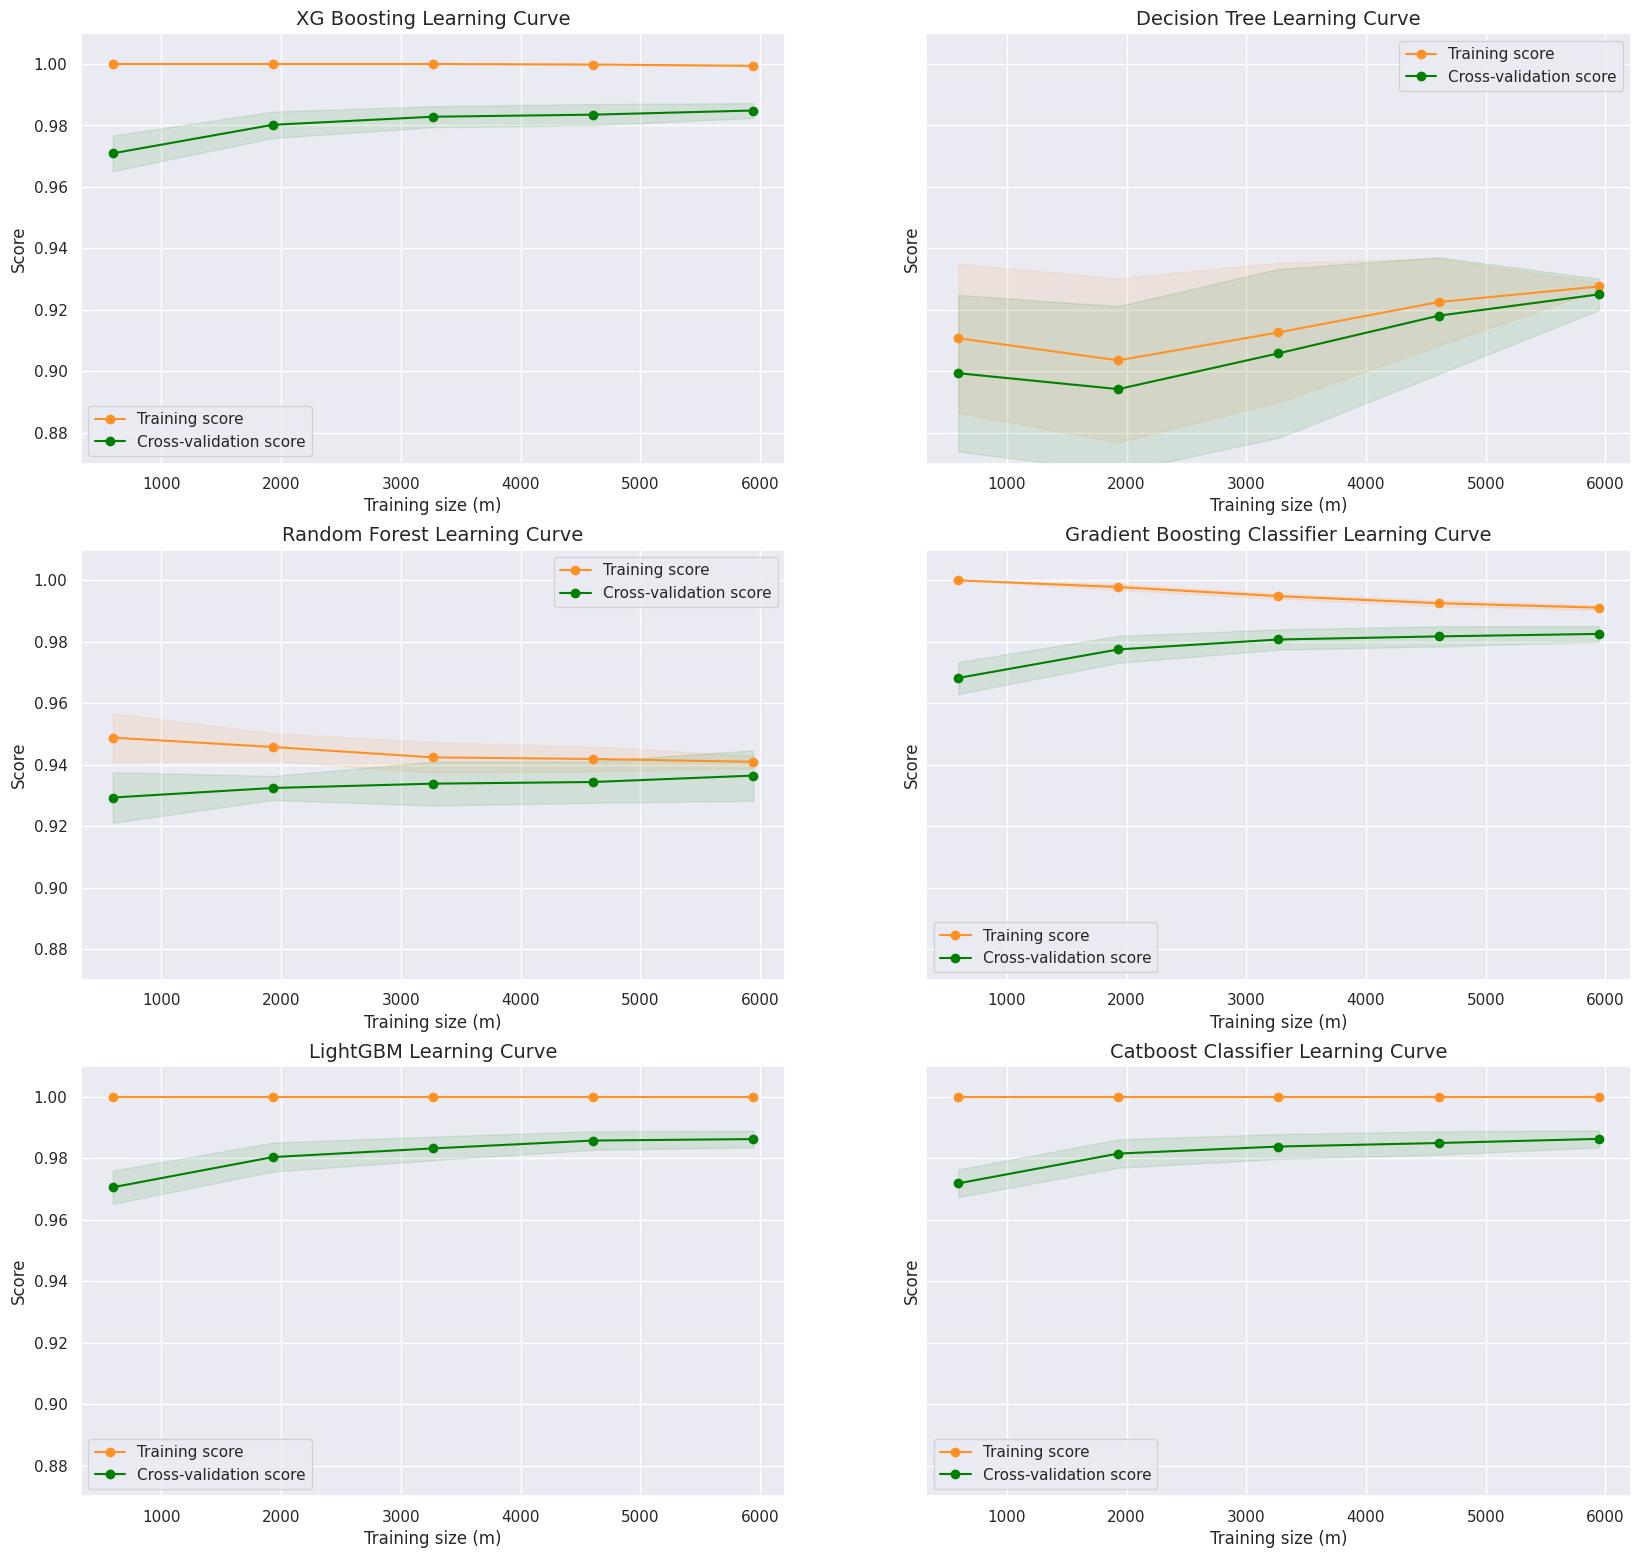

In [ ]:
%%time
cv2 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
plot_learning_curve2(xgb_clf, dt_clf, rf_clf, gbt_clf,lgbm_clf, cat_clf,  X_train, y_train, (0.87, 1.01), cv=cv2, n_jobs=4)

#How If We Handle the Imbalance Data?

Let's see the python code here for more details: https://colab.research.google.com/drive/1l_LZnvdgxOF4DfpVP2yK9dwAwopYZVOC#scrollTo=HSvXMRxz0Dn6&uniqifier=1